## Preliminary Data Processing

In this initial step, we load the dataset `XYZloan_default_selected_vars.csv` we previously used from homework 3. Loading the dataset into a pandas DataFrame allows us to inspect its structure, ensuring that all variables are correctly formatted and ready for further exploration and modeling.


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 3 & 4/XYZloan_default_selected_vars.csv')

df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'id'])

# Check the first few rows to understand the dataset
df.head()


,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


### Exploratory Data Analysis - Data Structure and Summary Statistics

To begin our analysis, we examine the overall structure and characteristics of the dataset.

we assess the data types of each variable and verify that there are no missing values. This inspection is crucial to identify any potential issues with data types that may impact modeling later on.


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0] # Shows columns with missing values


TD022    19598
TD023     7663
TD024     3694
TD025     2550
TD026     1846
TD027     1697
TD028     1636
TD029     1630
TD044    79997
TD048    79999
TD051    79995
TD054    79988
TD055    79999
TD061    79990
TD062    79999
PA022      381
PA023      381
PA028      381
PA029      381
PA030      381
PA031      381
CD008      381
CD018      381
CD071      381
CD072      381
CD088      381
CD100      381
CD101      381
CD106      381
CD107      381
CD108      381
CD113      381
CD114      381
CD115      381
CD117      381
CD118      381
CD120      381
CD121      381
CD123      381
CD130      381
CD131      381
CD132      381
CD133      381
CD135      381
CD136      381
CD137      381
CD152      381
CD153      381
CD160      381
CD162      381
CD164      381
CD166      381
CD167      381
CD169      381
CD170      381
CD172      381
CD173      381
MB005     2793
dtype: int64

In [4]:
# Drop the specified columns from the dataframe
columns_to_remove = ['TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'AP005']
df = df.drop(columns=columns_to_remove)

In [5]:
# Check the unique values of the columns (first 39)
df.nunique().head(39)

loan_default        2
AP001              37
AP002               2
AP003               5
AP004               4
AP006               4
AP007               5
AP008               5
AP009               2
TD001              21
TD002              12
TD005              25
TD006              21
TD009              39
TD010              30
TD013              46
TD014              34
TD015               8
TD022               5
TD023              11
TD024              16
TD025               1
TD026               1
TD027               1
TD028               1
TD029               1
CR004               4
CR005               6
CR009           25883
CR012               1
CR015               5
CR017               8
CR018               9
CR019              12
PA022             172
PA023             167
PA028            5142
PA029            4120
PA030            2579
dtype: int64

In [6]:
# Check the unique values of the columns (last 39)
df.nunique().tail(39)

PA031     4323
CD008    31165
CD018     2026
CD071      513
CD072      507
CD088      648
CD100      488
CD101      317
CD106      625
CD107      433
CD108      392
CD113       62
CD114       92
CD115      456
CD117      326
CD118      675
CD120      498
CD121      846
CD123      604
CD130      619
CD131      612
CD132      662
CD133      642
CD135      806
CD136      810
CD137      867
CD152    30592
CD153    30507
CD160      255
CD162      366
CD164      314
CD166     5759
CD167     5415
CD169     8565
CD170     8046
CD172    10818
CD173    10198
MB005       29
MB007      112
dtype: int64

In [7]:
df = df.drop(columns=['CR012','TD025','TD026','TD027','TD028','TD029'])

In [8]:
# Set the threshold
threshold = 1000

# Get the number of unique values for each column
unique_counts = df.nunique()

# Create a list of columns that are considered categorical (i.e., unique values below the threshold)
categorical_columns = unique_counts[unique_counts < threshold].index.tolist()

# Remove 'loan_default' from the list of categorical columns if it's there
categorical_columns = [col for col in categorical_columns if col != 'loan_default']

# Create a list of columns that are considered numerical (i.e., unique values above the threshold)
numerical_columns = unique_counts[unique_counts >= threshold].index.tolist()

# Output the lists of categorical and numerical columns
print("Categorical columns (unique values below threshold):")
print(categorical_columns)

print("Numerical columns (unique values above threshold):")
print(numerical_columns)

# You can also convert the identified categorical columns to category dtype if needed
df[categorical_columns] = df[categorical_columns].astype('category')

# Check the data types of the columns after conversion
print("\nData types after conversion:")
print(df.dtypes)



Categorical columns (unique values below threshold):
['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD160', 'CD162', 'CD164', 'MB005', 'MB007']
Numerical columns (unique values above threshold):
['CR009', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD152', 'CD153', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']

Data types after conversion:
loan_default       int64
AP001           category
AP002           category
AP003           category
AP004           category
                  ...   
CD170            float64
CD172            float64
CD173            float64


In [9]:
# Check which columns have negative values, skipping categorical columns
columns_with_negatives = []

# Iterate through each column in the DataFrame
for col in df.columns:
    if df[col].dtype != 'category':  # Skip categorical columns
        if (df[col] < 0).any():  # Check if any value in the column is negative
            columns_with_negatives.append(col)

# Output the list of columns that have negative values
print("Columns with negative values:")
print(columns_with_negatives)



Columns with negative values:
['PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD152', 'CD153', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']


In [10]:
# Create a dictionary to store unique negative values for each column
unique_negative_values = {}

# Iterate through each column with negative values
for col in columns_with_negatives:
    # Get the unique negative values from the column
    negative_values = df[df[col] < 0][col].unique()
    unique_negative_values[col] = negative_values

# Output the unique negative values for each column
for col, neg_values in unique_negative_values.items():
    print(f"Unique negative values in column {col}: {neg_values}")


Unique negative values in column PA028: [-98. -99.]
Unique negative values in column PA029: [-98. -99.]
Unique negative values in column PA030: [-98. -99.]
Unique negative values in column PA031: [-98. -99.]
Unique negative values in column CD008: [-99.]
Unique negative values in column CD018: [-99.]
Unique negative values in column CD152: [-99.]
Unique negative values in column CD153: [-99.]
Unique negative values in column CD166: [-99.]
Unique negative values in column CD167: [-99.]
Unique negative values in column CD169: [-99.]
Unique negative values in column CD170: [-99.]
Unique negative values in column CD172: [-99.]
Unique negative values in column CD173: [-99.]


#### Check for Missing Values

To ensure our dataset is clean, we start by checking for missing values in each feature. Missing data can impact model performance, so identifying these gaps allows us to decide whether to impute values or drop affected rows/columns.


In [11]:
# Iterate through each categorical column
for col in df.select_dtypes(include='category').columns:
    # Add 'null' to the categories if it isn't already there
    if 'null' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('null')
    
    # Fill NaN values with 'null'
    df[col] = df[col].fillna('null')

# Check the updated data types and null handling
print(df.isna().sum())

# Define the values to exclude from the median calculation
negative_nan = [-98, -99]

# Replace NaN values with -98 and -99 (keep -98 and -99 in the data as they are)
df.replace(negative_nan, np.nan, inplace=True)  # Temporarily convert -98, -99 to NaN for calculation

# Iterate through each numerical column and impute NaN values with the median (excluding -98, -99)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the median ignoring NaN and -98, -99
    median_value = df.loc[~df[col].isin(negative_nan), col].median()  # Exclude -98 and -99 when calculating the median
    df[col] = df[col].fillna(median_value)  # Fill NaN with the computed median

# Check if NaN values have been replaced
print(df.isna().sum())





loan_default      0
AP001             0
AP002             0
AP003             0
AP004             0
               ... 
CD170           381
CD172           381
CD173           381
MB005             0
MB007             0
Length: 72, dtype: int64
loan_default    0
AP001           0
AP002           0
AP003           0
AP004           0
               ..
CD170           0
CD172           0
CD173           0
MB005           0
MB007           0
Length: 72, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   loan_default  80000 non-null  int64   
 1   AP001         80000 non-null  category
 2   AP002         80000 non-null  category
 3   AP003         80000 non-null  category
 4   AP004         80000 non-null  category
 5   AP006         80000 non-null  category
 6   AP007         80000 non-null  category
 7   AP008         80000 non-null  category
 8   AP009         80000 non-null  category
 9   TD001         80000 non-null  category
 10  TD002         80000 non-null  category
 11  TD005         80000 non-null  category
 12  TD006         80000 non-null  category
 13  TD009         80000 non-null  category
 14  TD010         80000 non-null  category
 15  TD013         80000 non-null  category
 16  TD014         80000 non-null  category
 17  TD015         80000 non-null  category
 18  TD022 

## Weight-of-Evidence (WOE) Transformation

### Overview
To improve our model's performance, we will transform categorical variables using Weight-of-Evidence (WOE) encoding. WOE encoding helps establish a monotonic relationship between the predictor variables and the target variable (`loan_default`). This transformation is particularly useful for categorical variables, where the WOE measure can better reveal relationships with the outcome by re-binning categories.

### Purpose of WOE
The main goal of WOE encoding is to create groups within categorical variables that can be better compared against the target variable. This helps in understanding the impact of each category on the likelihood of `loan_default`. Each bin receives a WOE value that signifies how well that category is correlated with the target.

In [13]:
def calculate_woe(df, feature, target):
    
    # Calculate the number of good and bad for each category of the feature
    temp = df.groupby(feature)[target].agg(['count', 'sum'])
    temp.columns = ['total', 'bad']
    temp['good'] = temp['total'] - temp['bad']
    
    # Calculate the percentage of good and bad for each category
    temp['pct_good'] = temp['good'] / temp['good'].sum()
    temp['pct_bad'] = temp['bad'] / temp['bad'].sum()
    
    # Calculate WOE
    temp['woe'] = np.log(temp['pct_good'] / temp['pct_bad'])
    
    return temp['woe']

def woe_encode(df, categorical_cols, target):
    
    for col in categorical_cols:
        # Calculate WOE for the column
        woe_values = calculate_woe(df, col, target)
        
        # Map WOE values to the original column
        df[col] = df[col].map(woe_values)

        df[col] = df[col].astype('float64')  # Convert to float after mapping WOE
        
        # Handle NaN values after mapping by filling them with the median WOE
        median_woe = woe_values.median()  # Calculate median WOE for the column
        df[col].fillna(median_woe, inplace=True)



    return df

categorical_cols = df.select_dtypes(include='category').columns  # List of categorical columns
target = 'loan_default'  # The target variable

# Apply WOE encoding to the categorical columns
df = woe_encode(df, categorical_cols, target)

# Check the WOE-encoded DataFrame
print(df.head())


   loan_default     AP001     AP002     AP003     AP004     AP006     AP007  \
0             1 -0.006010  0.144226 -0.167136 -0.081697  0.081143  0.024535   
1             0 -0.110580 -0.064169 -0.167136 -0.081697  0.041203 -0.095633   
2             0  0.033259 -0.064169  0.511350 -0.081697  0.041203 -0.115004   
3             0  0.039007  0.144226  0.511350 -0.081697 -0.174398 -0.095633   
4             0  0.005318  0.144226 -0.167136 -0.081697  0.041203 -0.115004   

      AP008     AP009     TD001  ...     CD162     CD164  CD166  CD167  \
0 -0.012786  0.036834  0.203327  ...  0.086045  0.034034    0.0    0.0   
1 -0.097787 -0.094684 -0.023000  ...  0.165715  0.092659  518.0  437.0   
2  0.095070 -0.094684 -0.023000  ...  0.085222  0.131717   33.0    0.0   
3 -0.098206 -0.094684  0.254663  ...  0.167484  0.190859    0.0    0.0   
4 -0.097787  0.036834 -0.023000  ...  0.165715  0.092659  518.0  437.0   

    CD169   CD170   CD172   CD173     MB005     MB007  
0  1449.0  1449.0  2249.

In [14]:
# Check for NaN, Infinity, and very large values in X_train
print("Checking for NaN values in df:", df.isnull().sum())  # Number of NaN values per column
print("Checking for Infinity values in df:", np.isinf(df).sum())  # Number of Inf values per column

# Replace NaN and Infinity values with the median (or a suitable value)
df.replace(np.inf, 999999, inplace=True)  # Replace with a fixed large number
df.replace(-np.inf, -999999, inplace=True)  # Replace negative infinity with a large negative number
df.fillna(df.median(), inplace=True)  # Fill NaN values with the median of each column

Checking for NaN values in df: loan_default    0
AP001           0
AP002           0
AP003           0
AP004           0
               ..
CD170           0
CD172           0
CD173           0
MB005           0
MB007           0
Length: 72, dtype: int64
Checking for Infinity values in df: loan_default     0
AP001            0
AP002            0
AP003           14
AP004            0
                ..
CD170            0
CD172            0
CD173            0
MB005           16
MB007           88
Length: 72, dtype: int64


#### Check for Class Imbalance

To understand the degree of class imbalance in the target variable, we examine its distribution. This information is crucial as it helps determine the need for sampling techniques. A high imbalance would justify the use of over-sampling or under-sampling to improve model performance.



In [15]:
# Check the distribution of the target variable to assess class imbalance
target_distribution = df['loan_default'].value_counts(normalize=True)
target_distribution


loan_default
0    0.8064
1    0.1936
Name: proportion, dtype: float64

### Split the Data into Training and Test Sets

To prepare for model training and evaluation, we will split our dataset into two subsets:
- **Training Set (80%)**: Used to train the Random Forest model and apply sampling techniques for handling class imbalance.
- **Test Set (20%)**: Kept separate to provide an unbiased evaluation of model performance.

Using the `train_test_split` function with stratification on the target variable ensures that both the training and test sets maintain the same class distribution as the original dataset.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=['loan_default'])
y = df['loan_default']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)


## Apply Sampling Techniques on Training Data

### Technique 1: Over-Sampling with SMOTE
To address class imbalance in the training set, we first apply Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic examples for the minority class by interpolating between existing minority samples, increasing the representation of the minority class and providing the model with more balanced data.

#### Choice of SMOTE Variant: Borderline SMOTE (kind="borderline-1")

Given the class imbalance in our dataset, with approximately 80% of samples belonging to Class 0 (non-default) and 20% to Class 1 (default), we have chosen to apply **Borderline SMOTE (kind="borderline-1")**. This variant focuses on generating synthetic samples near the decision boundary, where the classes are most likely to overlap. This will help improve class separation and enhance model performance, especially for the minority class (Class 1).

We chose **Borderline SMOTE** over other variants (such as SVM SMOTE) as it strikes a good balance between computational efficiency and improving class separation for moderate imbalances.


In [17]:
from imblearn.over_sampling import BorderlineSMOTE 
from collections import Counter

# Calculate the count of the majority class (this assumes y_train is a binary classification task)
majority_count = y_train.value_counts()[0]

# Borderline SMOTE (Borderline-1)
borderline_smote = BorderlineSMOTE(sampling_strategy={1: int(majority_count * 0.5)}, 
                                   random_state=42, k_neighbors=3, n_jobs=-1)

# Resample the training data
X_train_borderline, y_train_borderline = borderline_smote.fit_resample(X_train, y_train)

# Print the distribution of the target variable after resampling
print('Borderline SMOTE distribution:', Counter(y_train_borderline))


Borderline SMOTE distribution: Counter({0: 51610, 1: 25805})


#### Technique 2: Tomek Links Under-Sampling

After applying **SMOTE**, we now explore **Tomek Links** as another advanced under-sampling technique. Tomek Links works by removing pairs of instances where one instance is from the majority class and the other is from the minority class. By removing such pairs, it helps reduce decision boundary noise and improves class separability. This technique is particularly useful when there is a clear overlap between the two classes near the decision boundary.

Unlike **Random UnderSampling**, which indiscriminately removes majority class samples, **Tomek Links** targets the majority class samples that are most likely to be misclassified by the model. This targeted removal results in a clearer decision boundary and should improve performance, especially in imbalanced datasets.

#### Parameters for Tomek Links:
- **sampling_strategy='majority'**: Targets the majority class for under-sampling based on Tomek Links' criteria.
- **k_neighbors**: The number of neighbors to consider when finding the Tomek Links. (We’ll use the default value for now.)



In [18]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

# Apply Tomek Links under-sampling method
tomek = TomekLinks()

# Resample the training data
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Print the distribution after resampling
print('Tomek Links distribution:', Counter(y_train_tomek))


Tomek Links distribution: Counter({0: 48590, 1: 12390})


## Train the Random Forest Model on the Original Dataset

We will first train the **Random Forest model** using the **original dataset**. We use the **H2O** implementation of Random Forest (`H2ORandomForestEstimator`) to train the model and evaluate its performance. H2O automatically handles parallelization for faster training.

#### Parameters for H2O Random Forest:
- **ntrees=200**: The number of trees in the forest.
- **max_depth=10**: The maximum depth of the trees, helping control overfitting.
- **seed=42**: Ensures that results are reproducible.


In [19]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o import H2OFrame
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score

# Shutdown existing h2o clusters that's been running if needed
# h2o.cluster().shutdown()
# Initialize H2O
h2o.init()

# Convert training data (Baseline, Borderline SMOTE, Tomek Links) to H2OFrames
X_train_h2o = H2OFrame(X_train)
y_train_h2o = H2OFrame(list(y_train)).asfactor()

X_train_borderline_h2o = H2OFrame(X_train_borderline)
y_train_borderline_h2o = H2OFrame(list(y_train_borderline)).asfactor()

X_train_tomek_h2o = H2OFrame(X_train_tomek)
y_train_tomek_h2o = H2OFrame(list(y_train_tomek)).asfactor()

# Convert test data to H2OFrame (do not apply resampling)
X_test_h2o = H2OFrame(X_test)
y_test_h2o = H2OFrame(list(y_test)).asfactor()



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_221"; Java(TM) SE Runtime Environment (build 1.8.0_221-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from /Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/tmpa6p99u16
  JVM stdout: /var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/tmpa6p99u16/h2o_dave_john_98_started_from_python.out
  JVM stderr: /var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/tmpa6p99u16/h2o_dave_john_98_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_dave_john_98_6qwf6i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
# Combine the features and target into a single frame for each model
train_h2o = X_train_h2o
train_h2o['target'] = y_train_h2o

train_borderline_h2o = X_train_borderline_h2o
train_borderline_h2o['target'] = y_train_borderline_h2o

train_tomek_h2o = X_train_tomek_h2o
train_tomek_h2o['target'] = y_train_tomek_h2o

In [21]:
# Train the Random Forest model on the Baseline data (no sampling)

# Initialize the H2O Random Forest model
rf_model_original = H2ORandomForestEstimator(
    ntrees=200,
    max_depth=10,
    min_rows=1.0,
    seed=42
)

# Train the model on the combined training data
rf_model_original.train(x=train_h2o.columns[:-1], y='target', training_frame=train_h2o)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1731727323952_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         1.48364e+06            10           10           10            419           685           586.675

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1448012096506015
RMSE: 0.38052754125109195
LogLoss: 0.4559203663464588
Mean Per-Class Error: 0.35616459136076606
AUC: 0.7019402847362545
AUCPR: 0.361201054234005
Gini: 0.40388056947250894

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21044532330621626
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      35574  16036  0.3107   (16036.0/51610.0)
1      4976   7414   0.4016   (4976.0/12390.0)
Total  40550  23450  0.3283   (21012.0/64000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.210445     0.413728  194
max f2                       0.138878     0.578482  301
max f0point5                 0.265819     0.382569  127
max accuracy                 0.369781     0.808688  41
max precision                0.518538     1         0
max recall                   0.0530916    1         391
max specificity              0.518538     1         0
max absolute_mcc             0.21947      0.237695  181
max min_per_class_accuracy   0.201389     0.643099  208
max mean_per_class_accuracy  0.199506     0.645151  211
max tns                      0.518538     51610     0
max fns                      0.518538     12387     0
max fps                      0.0269558    51610     399
max tps                      0.0530916    12390     391
max tnr                      0.518538     1         0
max fnr                      0.518538     0.999758  0
max fpr                      0.0269558    1         399
max tpr                      0.0530916    1         391

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.390486           2.96207   2.96207            0.573438         0.420317   0.573438                    0.420317            0.0296207       0.0296207                  196.207   196.207            0.024331
2        0.02                        0.364555           2.73608   2.84907            0.529687         0.376072   0.551562                    0.398194            0.0273608       0.0569814                  173.608   184.907            0.0458596
3        0.03                        0.347529           2.54237   2.74684            0.492188         0.355625   0.531771                    0.384005            0.0254237       0.0824052                  154.237   174.684            0.0649861
4        0.04                        0.334474           2.26796   2.62712            0.439063         0.340715   0.508594                    0.373182            0.0226796       0.105085                   126.796   162.712            0.0807096
5        0.05                        0.324885           2.11461   2.52462            0.409375         0.329465   0.48875       

## Baseline (Train) Model Evaluation Summary

### Model Performance:
- **Log Loss**: 0.4559
- **AUC**: 0.7019
- **Gini Coefficient**: 0.4039
- **Error Rate**: 32.83%

### Key Metrics:
- **Maximum F1 Score**: 0.4137 (threshold = 0.2104)
- **Maximum Accuracy**: 0.8087 (threshold = 0.3698)
- **Maximum Precision**: 1.0 (threshold = 0.5185)
- **Maximum Recall**: 1.0 (threshold = 0.0531)

### Variable Importance:
Top features by importance:
- **C4**: 6.28%
- **C15**: 5.99%
- **C11**: 4.58%

### Conclusion:
The model has moderate performance with a **Gini** of 0.40 and an **AUC** of 0.70. The most influential features are **C4**, **C15**, and **C11**.


## Train the Random Forest Model on the SMOTE Resampled Dataset

In this step, we apply **SMOTE (Synthetic Minority Oversampling Technique)** to oversample the minority class. After balancing the dataset, we train the **Random Forest model** using the **SMOTE resampled data**.

SMOTE creates synthetic samples for the minority class to balance the class distribution, which could improve the model's performance on detecting the minority class (defaults).

#### Parameters for Random Forest:
- **ntrees=200**: The number of trees in the forest.
- **max_depth=10**: The maximum depth of the trees.
- **seed=42**: Ensures reproducibility.


In [22]:
# Train the Random Forest model on the SMOTE resampled data
rf_model_smote = H2ORandomForestEstimator(
    ntrees=200,
    max_depth=10,
    min_rows=1.0,
    seed=42
)

rf_model_smote.train(x=train_borderline_h2o.columns[:-1], y='target', training_frame=train_borderline_h2o)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1731727323952_15


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         1.42114e+06            10           10           10            377           714           560.735

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16566305748156332
RMSE: 0.4070172692669972
LogLoss: 0.5089159342752367
Mean Per-Class Error: 0.24504940902925793
AUC: 0.8372403619908619
AUCPR: 0.778155618569246
Gini: 0.6744807239817239

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36503901869188865
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      41952  9658   0.1871   (9658.0/51610.0)
1      7818   17987  0.303    (7818.0/25805.0)
Total  49770  27645  0.2257   (17476.0/77415.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.365039     0.67304   193
max f2                       0.260096     0.757209  275
max f0point5                 0.455507     0.734642  132
max accuracy                 0.425848     0.801589  151
max precision                0.842482     1         0
max recall                   0.0813491    1         390
max specificity              0.842482     1         0
max absolute_mcc             0.425848     0.533331  151
max min_per_class_accuracy   0.341694     0.750513  211
max mean_per_class_accuracy  0.365039     0.754951  193
max tns                      0.842482     51610     0
max fns                      0.842482     25802     0
max fps                      0.044608     51610     399
max tps                      0.0813491    25805     390
max tnr                      0.842482     1         0
max fnr                      0.842482     0.999884  0
max fpr                      0.044608     1         399
max tpr                      0.0813491    1         390

Gains/Lift Table: Avg response rate: 33.33 %, avg score: 33.29 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010011                    0.693864           3         3                  1                0.731533  1                           0.731533            0.0300329       0.0300329                  200       200                0.0300329
2        0.020009                    0.660467           3         3                  1                0.675974  1                           0.703771            0.0299942       0.0600271                  200       200                0.0600271
3        0.0300071                   0.636074           3         3                  1                0.647489  1                           0.685019            0.0299942       0.0900213                  200       200                0.0900213
4        0.0400052                   0.615824           2.96124   2.99031            0.98708          0.62557   0.996771                    0.670161            0.0296067       0.119628                   196.124   199.031            0.119434
5        0.0500032                   0.598701           2.96899   2.98605            0.989664         0.606985  0.99535              

## Model Evaluation Summary

### Model Performance:
- **Log Loss**: 0.5089
- **AUC**: 0.8372
- **Gini Coefficient**: 0.6745
- **Error Rate**: 22.57%

### Key Metrics:
- **Maximum F1 Score**: 0.6730 (threshold = 0.3650)
- **Maximum Accuracy**: 0.8016 (threshold = 0.4258)
- **Maximum Precision**: 1.0 (threshold = 0.8425)
- **Maximum Recall**: 1.0 (threshold = 0.0813)

### Variable Importance:
Top features by importance:
- **C11**: 9.92%
- **C4**: 6.90%
- **C20**: 6.21%

### Conclusion:
The SMOTE-based model shows a significant improvement over the baseline with a **Gini** of 0.67 and an **AUC** of 0.84. The most influential features are **C11**, **C4**, and **C20**. The model performs well, especially in terms of precision and recall.


## Train the Random Forest Model on the Tomek Links Resampled Dataset

In this step, we apply **Tomek Links** to undersample the majority class by removing ambiguous or borderline examples. After balancing the dataset, we train the **Random Forest model** using the **Tomek Links resampled data**.

Tomek Links removes the nearest neighbors that belong to different classes, which helps improve the model's performance by focusing on cleaner, less ambiguous examples.

#### Parameters for Random Forest:
- **ntrees=100**: The number of trees in the forest.
- **max_depth=10**: The maximum depth of the trees.
- **seed=42**: Ensures reproducibility.


In [23]:
# Train the Random Forest model on the Tomek Links resampled data
rf_model_tomek = H2ORandomForestEstimator(
    ntrees=200,
    max_depth=10,
    min_rows=1.0,
    seed=42
)

rf_model_tomek.train(x=train_tomek_h2o.columns[:-1], y='target', training_frame=train_tomek_h2o)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1731727323952_40


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         1.50761e+06            10           10           10            437           720           596.14

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14926733259426048
RMSE: 0.3863513072247336
LogLoss: 0.4663898460486473
Mean Per-Class Error: 0.35172074452755764
AUC: 0.7057908516534306
AUCPR: 0.3789160666676465
Gini: 0.41158170330686117

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.208523385024643
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      30779  17811  0.3666   (17811.0/48590.0)
1      4174   8216   0.3369   (4174.0/12390.0)
Total  34953  26027  0.3605   (21985.0/60980.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.208523     0.427727  212
max f2                       0.152515     0.593626  288
max f0point5                 0.282718     0.39946   126
max accuracy                 0.361772     0.800098  56
max precision                0.529115     1         0
max recall                   0.0444468    1         395
max specificity              0.529115     1         0
max absolute_mcc             0.251844     0.244883  160
max min_per_class_accuracy   0.211544     0.646651  208
max mean_per_class_accuracy  0.207606     0.648408  213
max tns                      0.529115     48590     0
max fns                      0.529115     12385     0
max fps                      0.0323214    48590     399
max tps                      0.0444468    12390     395
max tnr                      0.529115     1         0
max fnr                      0.529115     0.999596  0
max fpr                      0.0323214    1         399
max tpr                      0.0444468    1         395

Gains/Lift Table: Avg response rate: 20.32 %, avg score: 20.33 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100033                   0.407879           3.04178   3.04178            0.618033         0.437947   0.618033                    0.437947            0.0304278       0.0304278                  204.178   204.178            0.0256325
2        0.0200066                   0.38205            2.59802   2.8199             0.527869         0.393841   0.572951                    0.415894            0.0259887       0.0564165                  159.802   181.99             0.0456941
3        0.0300098                   0.365713           2.50927   2.71635            0.509836         0.373067   0.551913                    0.401618            0.0251009       0.0815174                  150.927   171.635            0.0646415
4        0.0400131                   0.353113           2.31562   2.61617            0.470492         0.359314   0.531557                    0.391042            0.0231638       0.104681                   131.562   161.617            0.0811578
5        0.05                        0.343421           2.24669   2.54237            0.456486         0.348062   0.516563      

## Model Evaluation Summary

### Model Performance:
- **Log Loss**: 0.4664
- **AUC**: 0.7058
- **Gini Coefficient**: 0.4116
- **Error Rate**: 36.05%

### Key Metrics:
- **Maximum F1 Score**: 0.4277 (threshold = 0.2085)
- **Maximum Accuracy**: 0.8001 (threshold = 0.3618)
- **Maximum Precision**: 1.0 (threshold = 0.5291)
- **Maximum Recall**: 1.0 (threshold = 0.0444)

### Variable Importance:
Top features by importance:
- **C4**: 6.73%
- **C15**: 6.01%
- **C11**: 4.74%

### Conclusion:
The Tomek-based model shows a moderate performance with a **Gini** of 0.41 and an **AUC** of 0.71. The most influential features are **C4**, **C15**, and **C11**. The model has an error rate of 36%, with a strong **precision** but relatively low **recall**.


## ROC Calculation for All Models

To evaluate and compare the performance of our three models (Baseline, SMOTE, and Tomek Links), we calculate the **Receiver Operating Characteristic (ROC)** curve and **Area Under the Curve (AUC)**. The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various classification thresholds.

We use the following steps:

1. **Actual Prediction**:
   - For each model, the `actual_predict` function is used to obtain the actual values and predicted probabilities for the test data.
   
2. **ROC AUC Calculation**:
   - For each model, we compute the **ROC AUC** score using the `roc_auc_score` function, which provides an overall performance measure by calculating the area under the ROC curve.
   
3. **Plotting the ROC Curve**:
   - The **ROC curve** is plotted for each model to visualize the model's classification performance.
   - The **AUC** is shown in the legend, and the **diagonal line** represents the random classifier's performance (AUC = 0.5).
   
#### ROC AUC Results:
We calculate and print the **ROC AUC values** for all three models (Baseline, SMOTE, and Tomek Links) to compare their performance.


In [24]:
# Convert the test set features to H2OFrame
test_h2o = H2OFrame(X_test)

# Convert the target variable for the test set to H2OFrame and convert it to factor (classification target)
y_test_h2o = H2OFrame(list(y_test)).asfactor()

# Add the target column to the test set features frame
test_h2o['target'] = y_test_h2o

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
y_pred = rf_model_tomek.predict(test_h2o).as_data_frame()

y_pred

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict,p0,p1
0,1,0.738661,0.261339
1,0,0.845957,0.154043
2,1,0.790578,0.209422
3,1,0.752570,0.247430
4,1,0.694102,0.305898
...,...,...,...
15995,0,0.823582,0.176418
15996,0,0.911129,0.088871
15997,0,0.904652,0.095348
15998,0,0.877558,0.122442


In [26]:
# Function to get actual vs predicted values
def actual_predict(model, test_hex, target):
    y_pred = model.predict(test_hex).as_data_frame()
    
    # Extract the predicted class label (column 'predict')
    y_pred_class = y_pred['predict']
    
    # If you want the probability of class 1 (use 'p1'), you can also extract it:
    y_pred_prob = y_pred['p1']  # For probability of class 1, use 'p1'

    # Get the actual target values
    y_actual = test_hex[target].as_data_frame()

    # Combine the actual values and predicted values into a DataFrame
    df_actual_predict = pd.concat([y_actual, y_pred_class, y_pred_prob], axis=1)
    df_actual_predict.columns = ['actual', 'pred_class', 'pred_prob']  # Rename columns for clarity

    return df_actual_predict


RF_tomek_actual_predict = actual_predict(rf_model_tomek, test_h2o, 'target')

# Inspecting the first few rows of the combined DataFrame
RF_tomek_actual_predict.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,actual,pred_class,pred_prob
0,0,1,0.261339
1,0,0,0.154043
2,0,1,0.209422
3,0,1,0.247430
4,0,1,0.305898


In [27]:
RF_baseline_actual_predict = actual_predict(rf_model_original, test_h2o, 'target')

# Inspecting the first few rows of the combined DataFrame
RF_baseline_actual_predict.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,actual,pred_class,pred_prob
0,0,1,0.265447
1,0,0,0.139218
2,0,1,0.220866
3,0,1,0.226883
4,0,1,0.299145


In [28]:
RF_smote_actual_predict = actual_predict(rf_model_smote, test_h2o, 'target')

# Inspecting the first few rows of the combined DataFrame
RF_smote_actual_predict.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/dave.john.98/anaconda3/envs/APAN/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,actual,pred_class,pred_prob
0,0,1,0.379867
1,0,0,0.213934
2,0,0,0.281315
3,0,0,0.290853
4,0,1,0.516544


In [29]:
# ROC
from sklearn.metrics import roc_curve,roc_auc_score, auc 
from sklearn.metrics import average_precision_score, precision_recall_curve

baseline = RF_baseline_actual_predict
baseline_ROC = roc_auc_score(baseline['actual'],baseline['pred_class'])
print(f'baseline_ROC: {baseline_ROC}')

smote = RF_smote_actual_predict
smote_ROC = roc_auc_score(smote['actual'],smote['pred_class'])
print(f'smote_ROC: {smote_ROC}')

tomek = RF_tomek_actual_predict
tomek_ROC = roc_auc_score(tomek['actual'],tomek['pred_class'])
print(f'tomek_ROC: {tomek_ROC}')

baseline_ROC: 0.6478073422139725
smote_ROC: 0.611556387882672
tomek_ROC: 0.6482316562487898


In [30]:
def gains_table(df_actual_predict):
    df_actual_predict = df_actual_predict.sort_values(by='pred_class',ascending=False)
    df_actual_predict['row_id'] = range(0,0+len(df_actual_predict))
    
    df_actual_predict['decile'] = (df_actual_predict['row_id'] / (len(df_actual_predict)/10)).astype(int)
    df_actual_predict.loc[df_actual_predict['decile'] == 10] =9
    
    # Create gains table
    gains = df_actual_predict.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
base_gains = gains_table(RF_baseline_actual_predict)
base_gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,483,1117,1600,483,1117,0.16,0.09,309.8,1.56,7.0,30.19
1,1600,538,1062,3200,1021,2179,0.33,0.17,619.6,1.65,16.0,31.91
2,1600,521,1079,4800,1542,3258,0.50,0.25,929.4,1.66,25.0,32.12
3,1600,397,1203,6400,1939,4461,0.63,0.35,1239.2,1.56,28.0,30.30
4,1600,200,1400,8000,2139,5861,0.69,0.45,1549.0,1.38,24.0,26.74
5,1600,188,1412,9600,2327,7273,0.75,0.56,1858.8,1.25,19.0,24.24
6,1600,222,1378,11200,2549,8651,0.82,0.67,2168.6,1.18,15.0,22.76
7,1600,197,1403,12800,2746,10054,0.89,0.78,2478.4,1.11,11.0,21.45
8,1600,188,1412,14400,2934,11466,0.95,0.89,2788.2,1.05,6.0,20.38


In [31]:
smote_gains = gains_table(RF_smote_actual_predict)
smote_gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,550,1050,1600,550,1050,0.18,0.08,309.8,1.78,10.0,34.38
1,1600,567,1033,3200,1117,2083,0.36,0.16,619.6,1.80,20.0,34.91
2,1600,308,1292,4800,1425,3375,0.46,0.26,929.4,1.53,20.0,29.69
3,1600,241,1359,6400,1666,4734,0.54,0.37,1239.2,1.34,17.0,26.03
4,1600,239,1361,8000,1905,6095,0.61,0.47,1549.0,1.23,14.0,23.81
5,1600,252,1348,9600,2157,7443,0.70,0.58,1858.8,1.16,12.0,22.47
6,1600,250,1350,11200,2407,8793,0.78,0.68,2168.6,1.11,10.0,21.49
7,1600,238,1362,12800,2645,10155,0.85,0.79,2478.4,1.07,6.0,20.66
8,1600,249,1351,14400,2894,11506,0.93,0.89,2788.2,1.04,4.0,20.10


In [32]:
tomek_gains = gains_table(RF_tomek_actual_predict)
tomek_gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,454,1146,1600,454,1146,0.15,0.09,309.8,1.47,6.0,28.38
1,1600,498,1102,3200,952,2248,0.31,0.17,619.6,1.54,14.0,29.75
2,1600,487,1113,4800,1439,3361,0.46,0.26,929.4,1.55,20.0,29.98
3,1600,503,1097,6400,1942,4458,0.63,0.35,1239.2,1.57,28.0,30.34
4,1600,254,1346,8000,2196,5804,0.71,0.45,1549.0,1.42,26.0,27.45
5,1600,175,1425,9600,2371,7229,0.77,0.56,1858.8,1.28,21.0,24.70
6,1600,189,1411,11200,2560,8640,0.83,0.67,2168.6,1.18,16.0,22.86
7,1600,195,1405,12800,2755,10045,0.89,0.78,2478.4,1.11,11.0,21.52
8,1600,182,1418,14400,2937,11463,0.95,0.89,2788.2,1.05,6.0,20.40


In [33]:
def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred_class'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred_class'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.4f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.4f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred_class'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred_class'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    

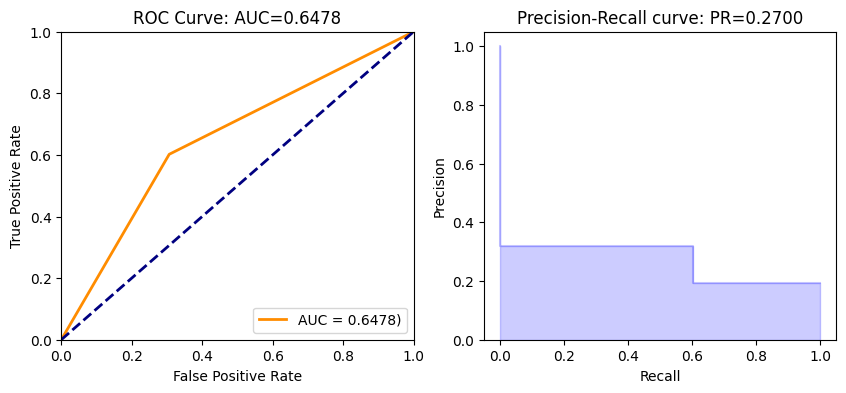

In [34]:
ROC_PR(baseline)

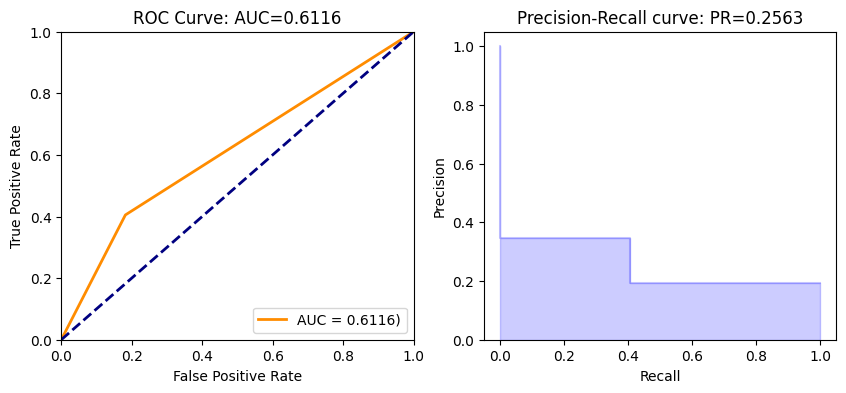

In [35]:
ROC_PR(smote)

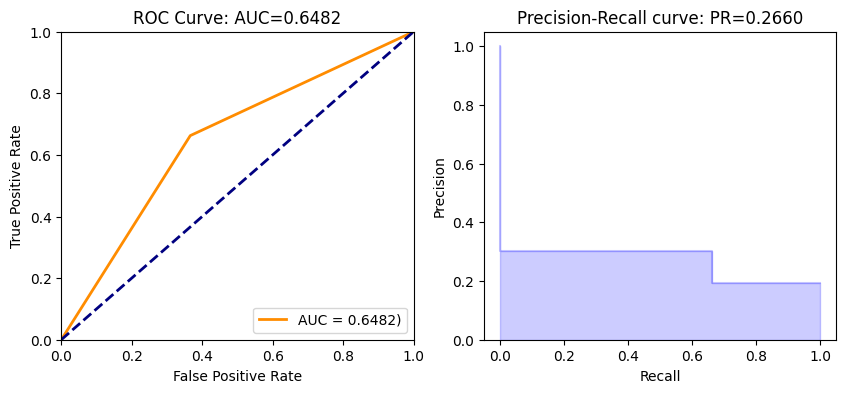

In [36]:
ROC_PR(tomek)

## Model(on Test data) Evaluation Summary

### Base Model Performance:
- **Log Loss**: 0.4559
- **AUC**: 0.6478
- **Gini Coefficient**: 0.4039
- **Precision-Recall**: 0.2700

### Key Metrics (Base Model):
- **Lift**: 1.56 (at decile 0)
- **K-S Statistic**: 7.0
- **Gain**: 30.19% (at decile 0)

#### Takeaways for Base Model:
- The **AUC** of 0.6478 indicates that the base model has moderate discriminatory power between the classes.
- The **Precision-Recall (PR)** value of 0.2700 is low, indicating that the model struggles with precision and recall, especially for the minority class.
- The **Lift** at decile 0 (1.56) is moderate, suggesting that the model improves upon random prediction, but there is room for improvement.
- **K-S statistic** is relatively low (7.0), which indicates room for improvement in the model's ability to discriminate between the classes.

### SMOTE Model Performance:
- **Log Loss**: 0.5089
- **AUC**: 0.6116
- **Gini Coefficient**: 0.3789
- **Precision-Recall**: 0.2563

### Key Metrics (SMOTE):
- **Lift**: 1.78 (at decile 0)
- **K-S Statistic**: 10.0
- **Gain**: 34.38% (at decile 0)

#### Takeaways for SMOTE Model:
- The **AUC** of 0.6116 indicates a slight drop in the model’s ability to discriminate compared to the base model.
- The **PR** value of 0.2563 is slightly lower than the base model, suggesting that the SMOTE technique did not substantially improve the precision of the model.
- **Lift** has improved to 1.78, showing that SMOTE is providing some enhancement in terms of the effectiveness of the model at the top deciles.
- The **K-S statistic** (10.0) shows a slight improvement, indicating better class separation than the base model at decile 0.

### Tomek Model Performance:
- **Log Loss**: 0.4664
- **AUC**: 0.6482
- **Gini Coefficient**: 0.4116
- **Precision-Recall**: 0.2660

### Key Metrics (Tomek):
- **Lift**: 1.47 (at decile 0)
- **K-S Statistic**: 6.0
- **Gain**: 28.38% (at decile 0)

#### Takeaways for Tomek Model:
- The **AUC** of 0.6482 is very close to the base model, indicating similar performance in terms of discriminatory power.
- **PR** value of 0.2660 is lower than both the base and SMOTE models, suggesting that Tomek did not improve precision as expected.
- **Lift** is slightly lower than the SMOTE model at 1.47, and the **K-S statistic** is also lower (6.0), showing that Tomek did not enhance class separation or prediction accuracy as effectively as the other models.
- The **Gain** of 28.38% at decile 0 is lower than SMOTE, indicating that Tomek did not result in as large an improvement in model performance.

### Conclusion and Recommendations:
- The **SMOTE** model slightly improved the **Lift** and **K-S statistic**, but **AUC** and **Precision-Recall** scores were not significantly better than the baseline model. It is important to fine-tune the model further, as the **precision** remains low.
- **Tomek** model showed a drop in performance in terms of **Lift**, **K-S statistic**, and **Gain**. Thus, Tomek's method for under-sampling did not significantly enhance model predictability compared to SMOTE or the baseline model.
- **Precision**, a critical measure in supervising machine learning, was not sufficiently improved by either **SMOTE** or **Tomek**, indicating that more advanced sampling techniques or further model tuning is necessary for better precision.
- The **AUC** improvements were **marginal** across all models, and none of the models significantly improved predictive power enough to justify their complexity over the baseline. Therefore, the next steps should include further fine-tuning of the hyperparameters or exploring different modeling approaches (e.g., gradient boosting or neural networks) to enhance precision and recall.



# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1731727323952_1

,0,1,Error,Rate
0,9183.0,3719.0,0.2882,(3719.0/12902.0)
1,1292.0,1806.0,0.417,(1292.0/3098.0)
Total,10475.0,5525.0,0.3132,(5011.0/16000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

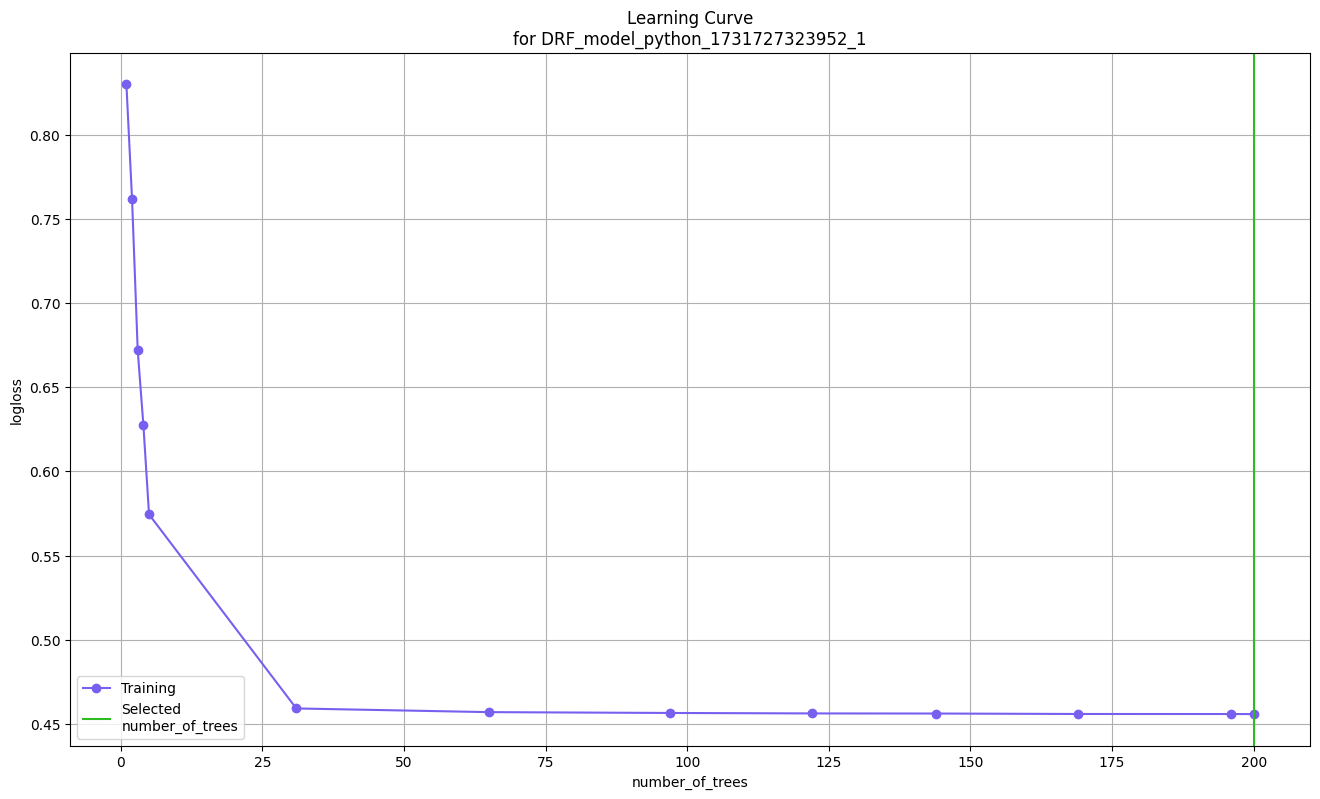

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

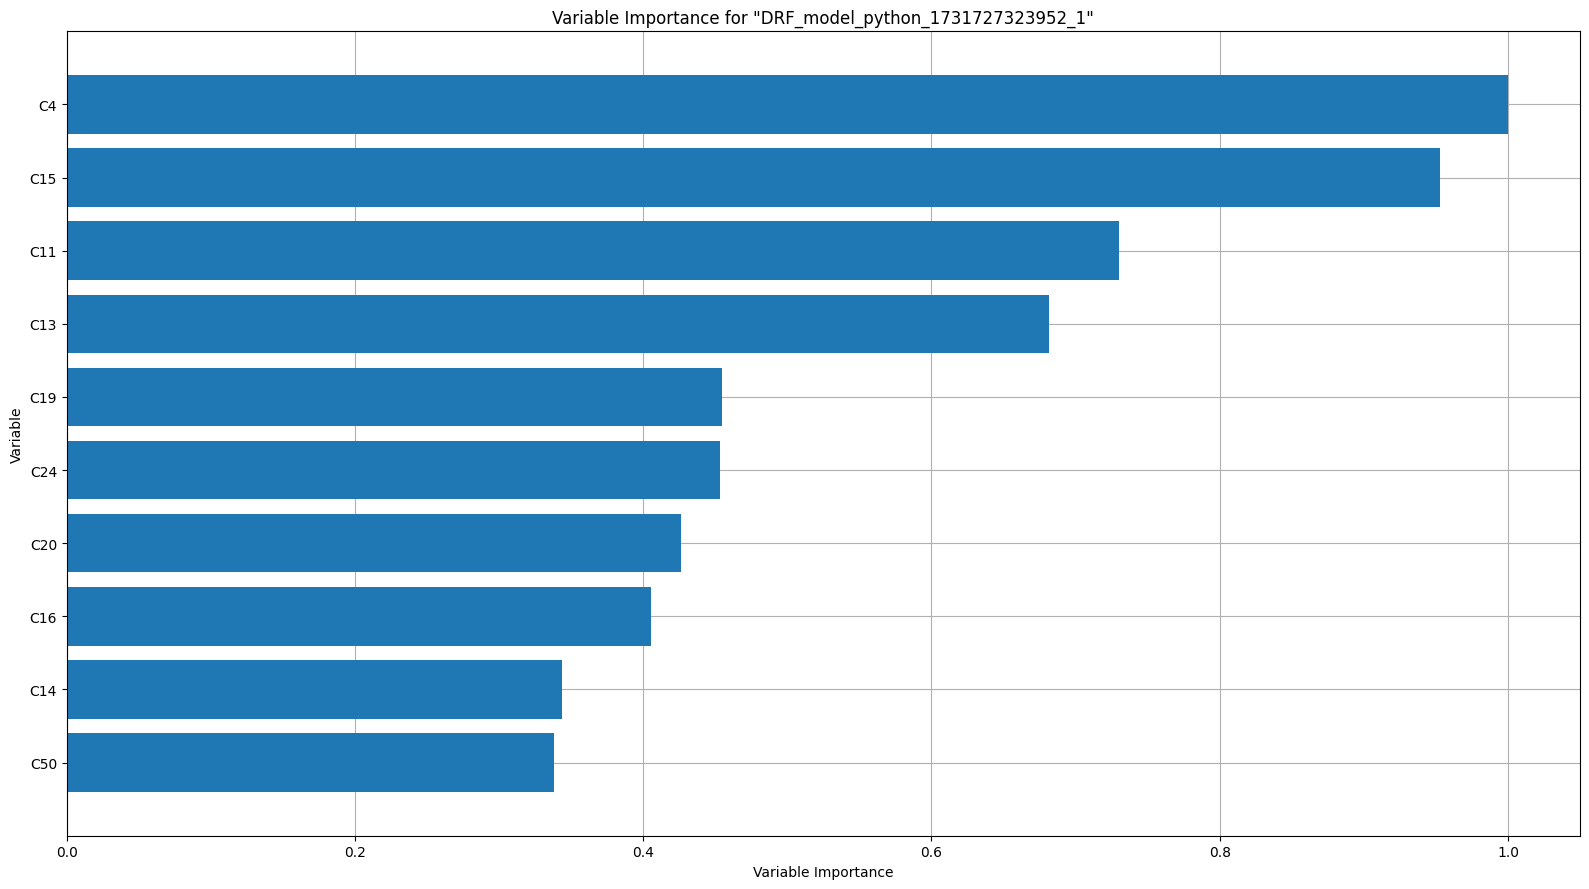

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

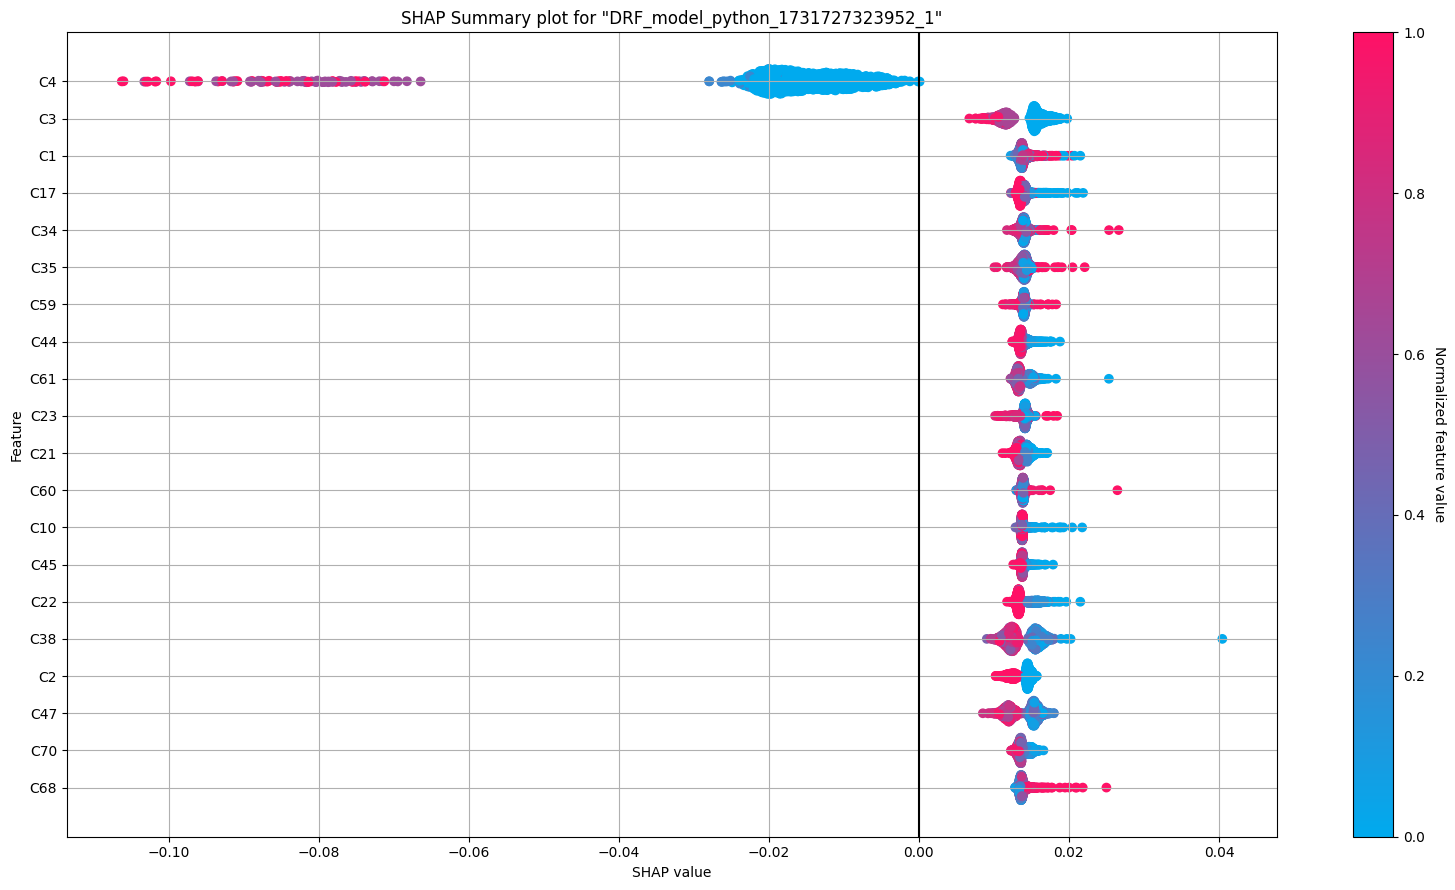

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

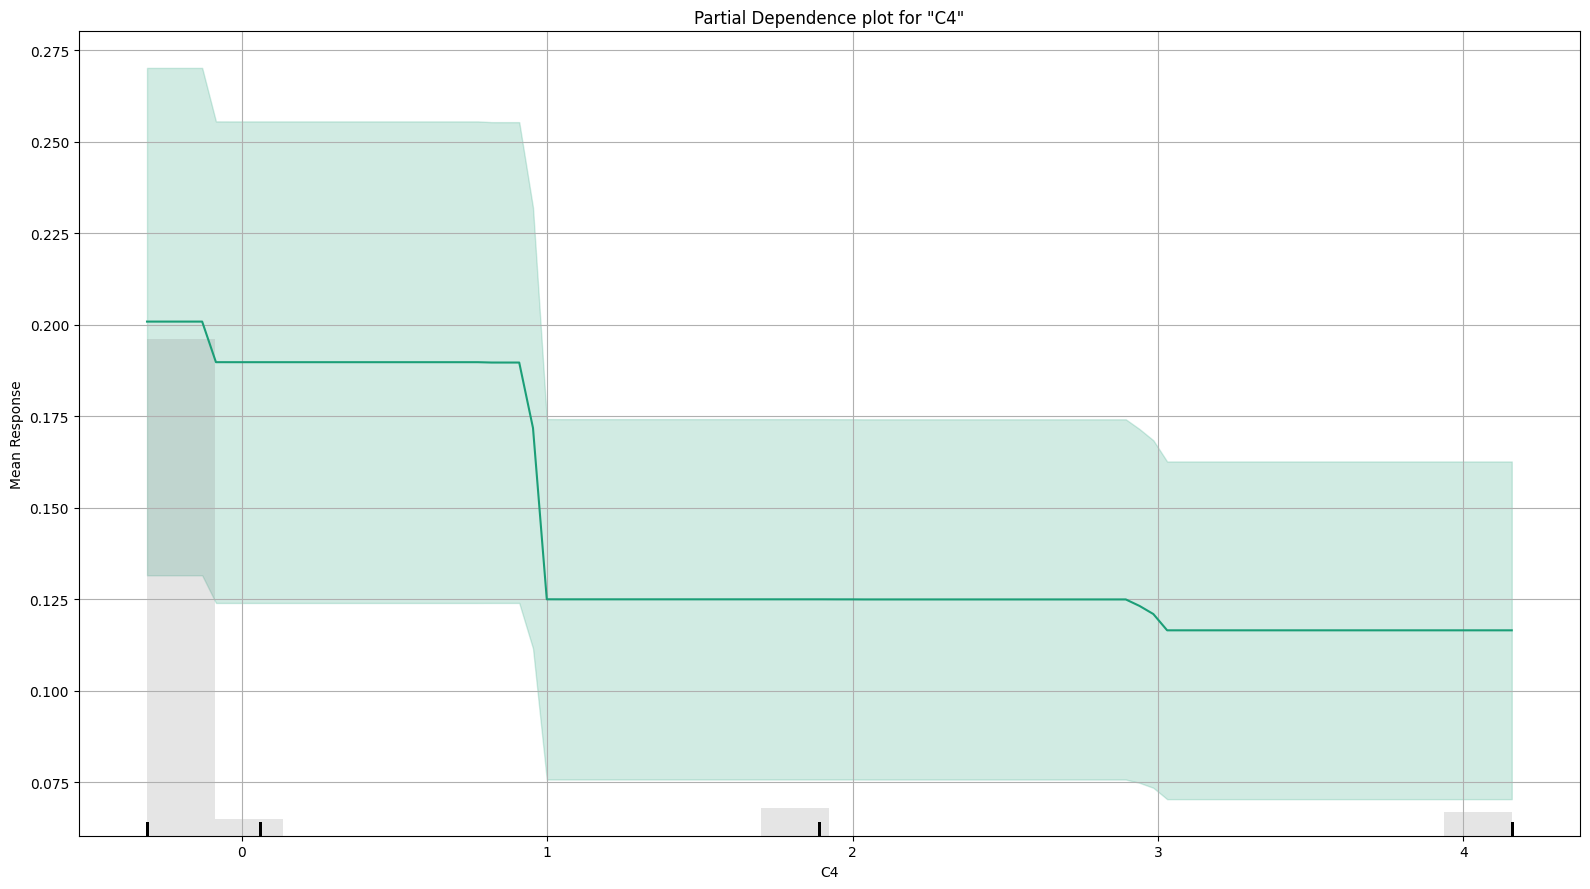

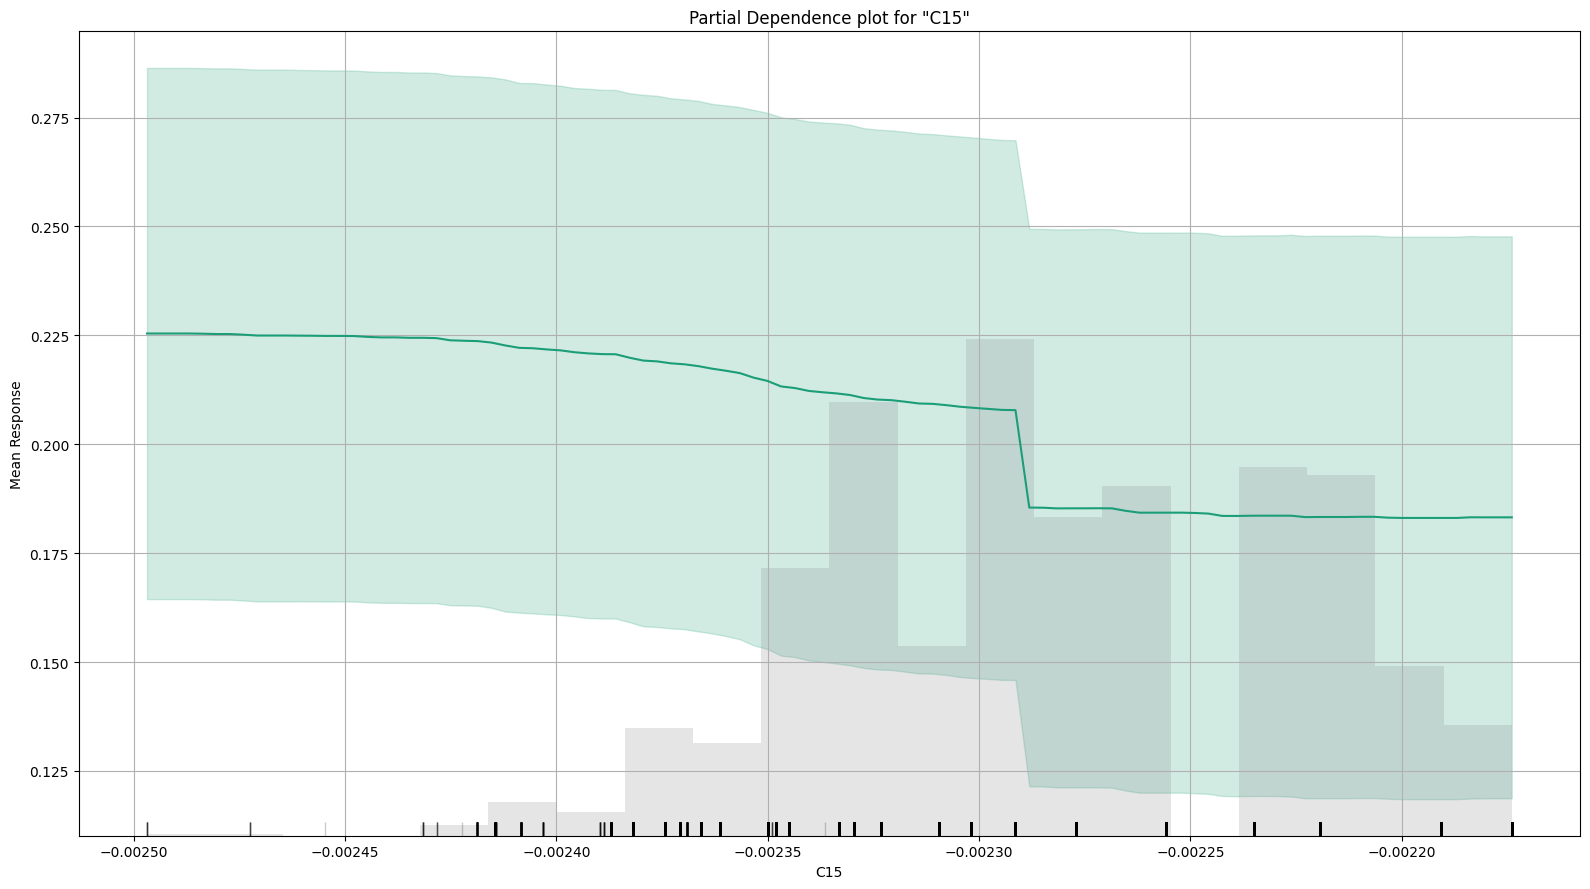

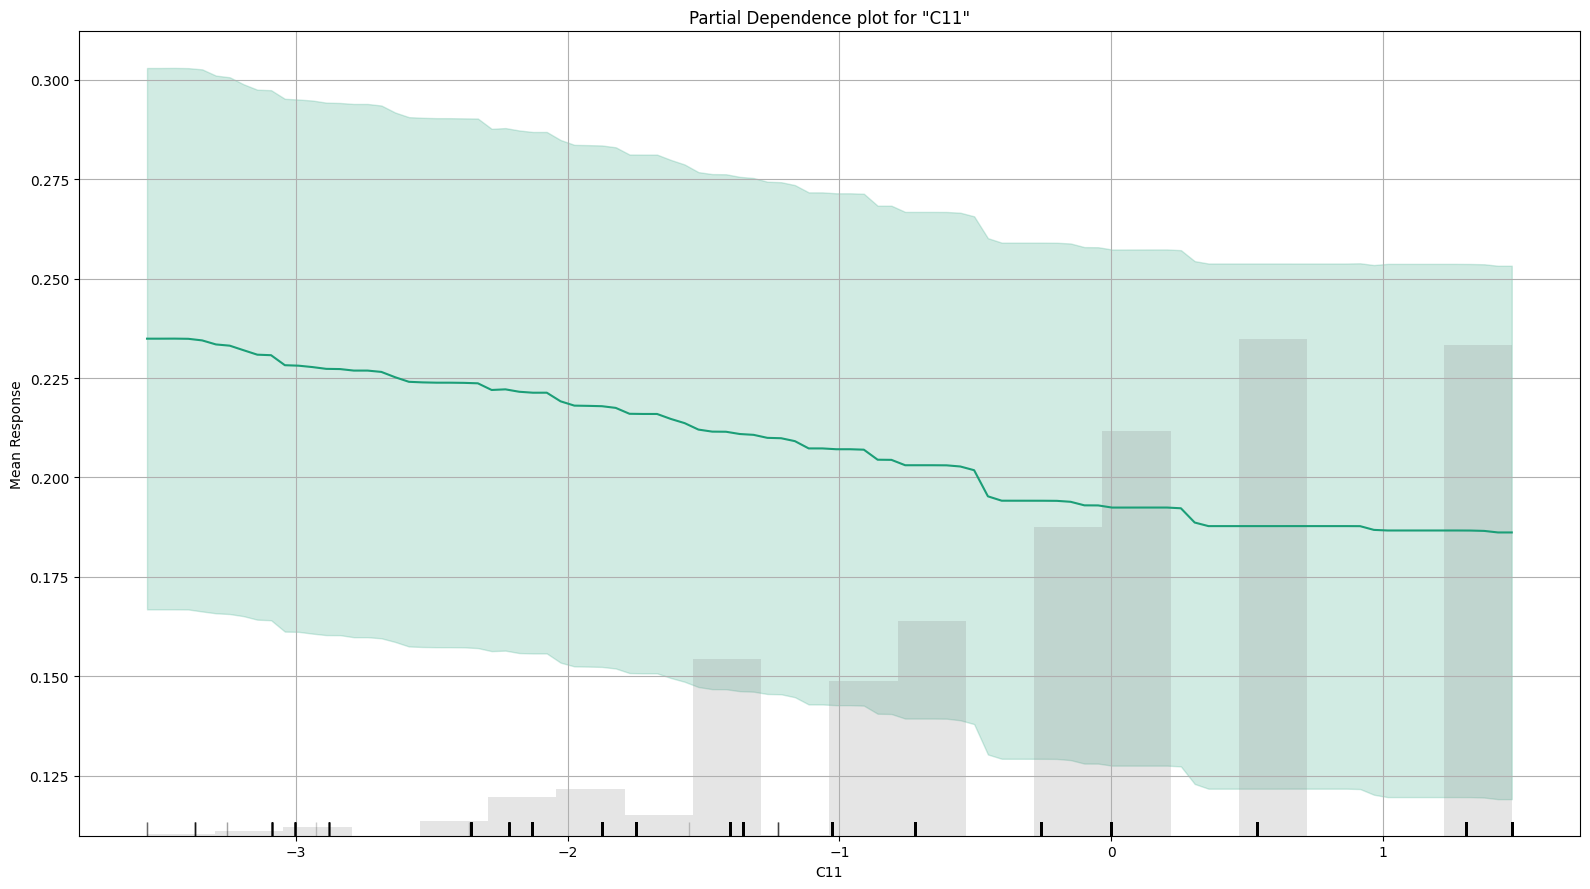

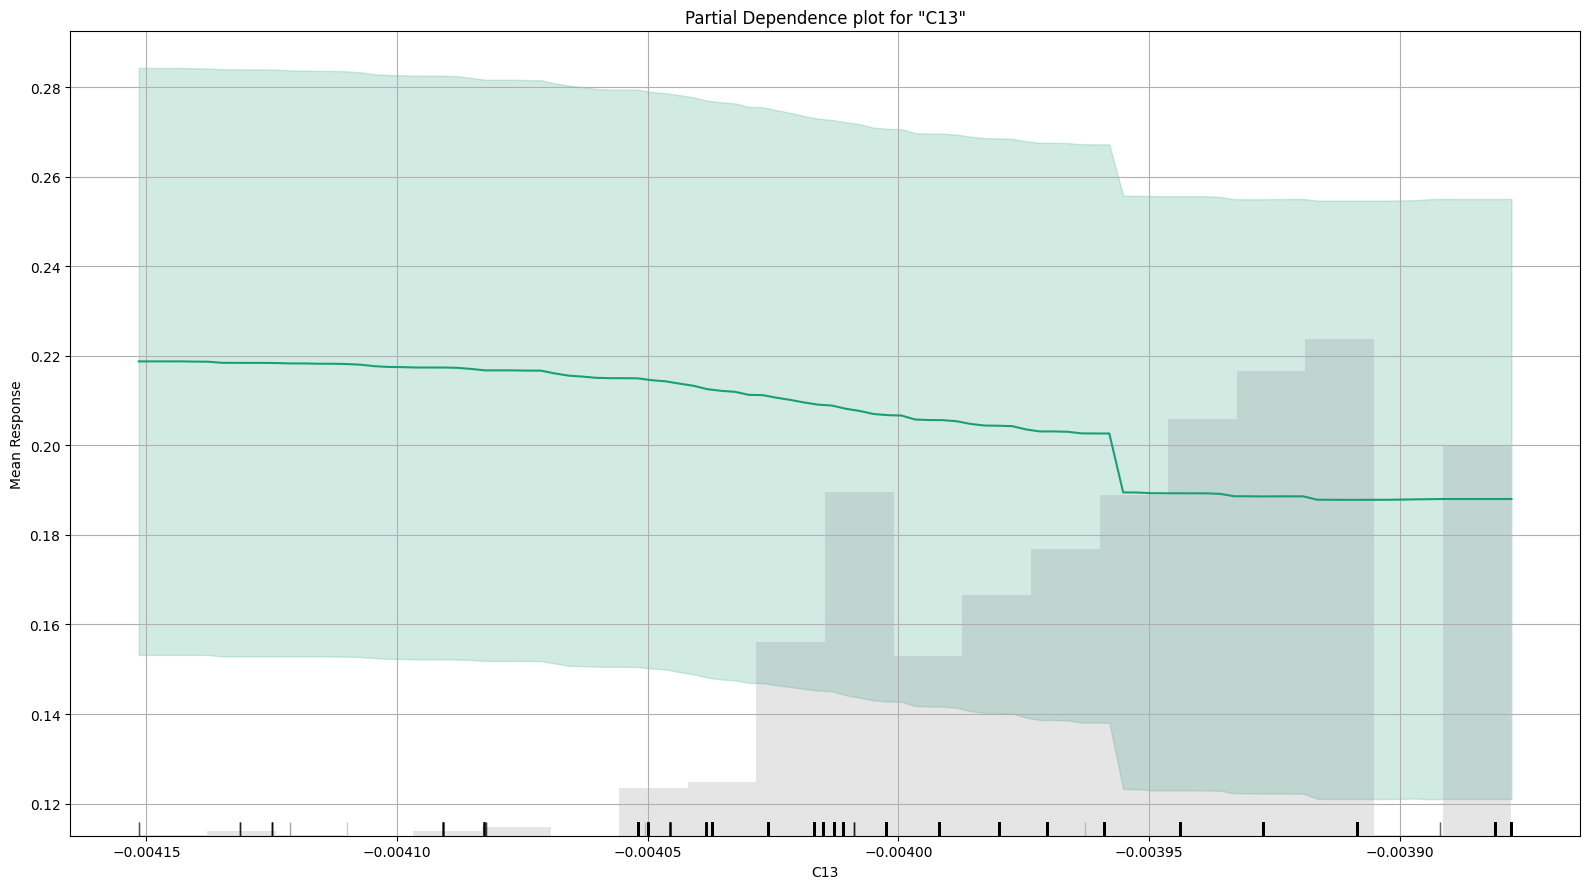

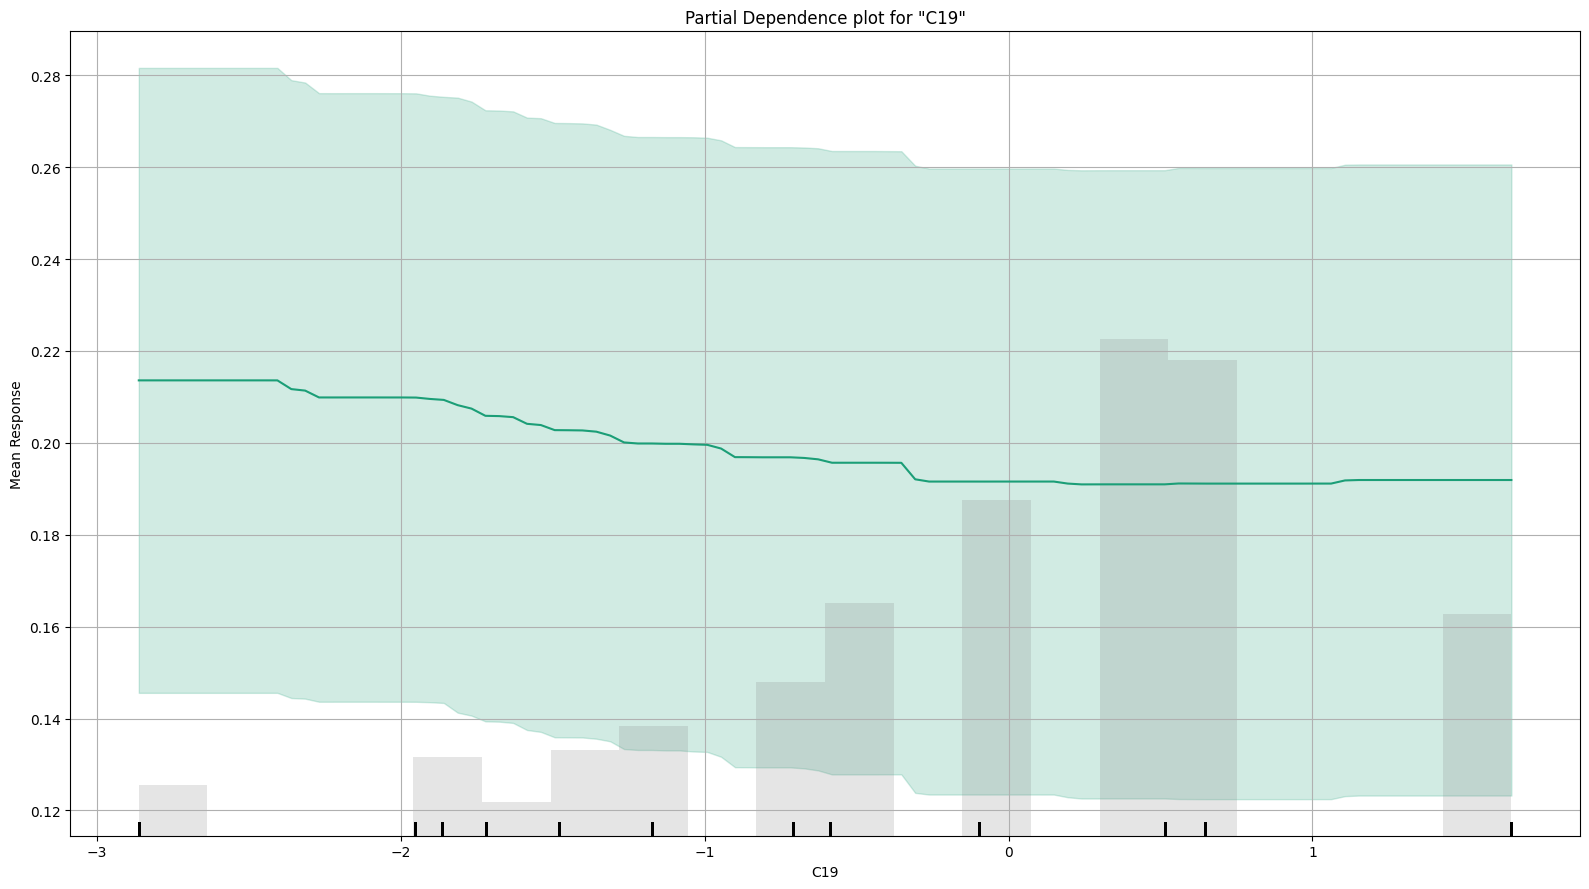

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1731727323952_1

,0,1,Error,Rate
0,9183.0,3719.0,0.2882,(3719.0/12902.0)
1,1292.0,1806.0,0.417,(1292.0/3098.0)
Total,10475.0,5525.0,0.3132,(5011.0/16000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

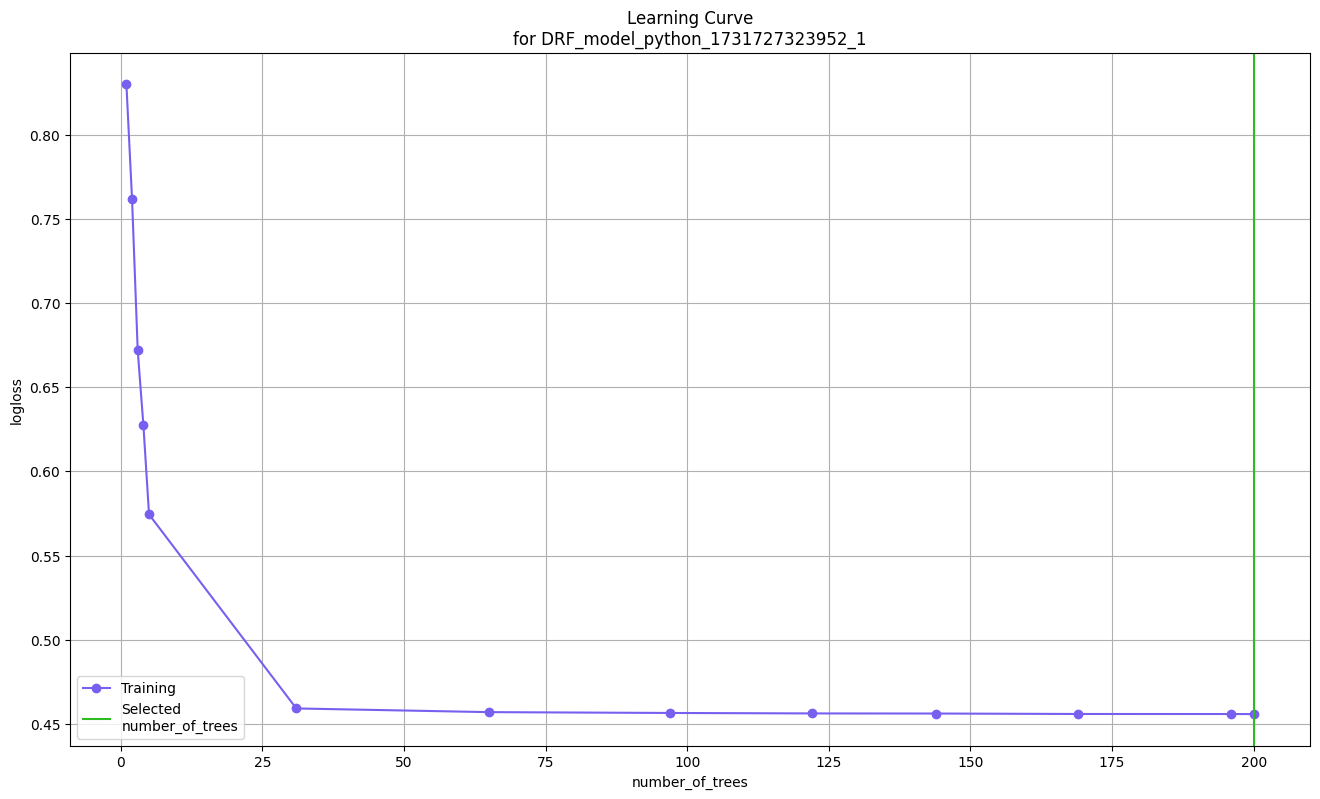

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

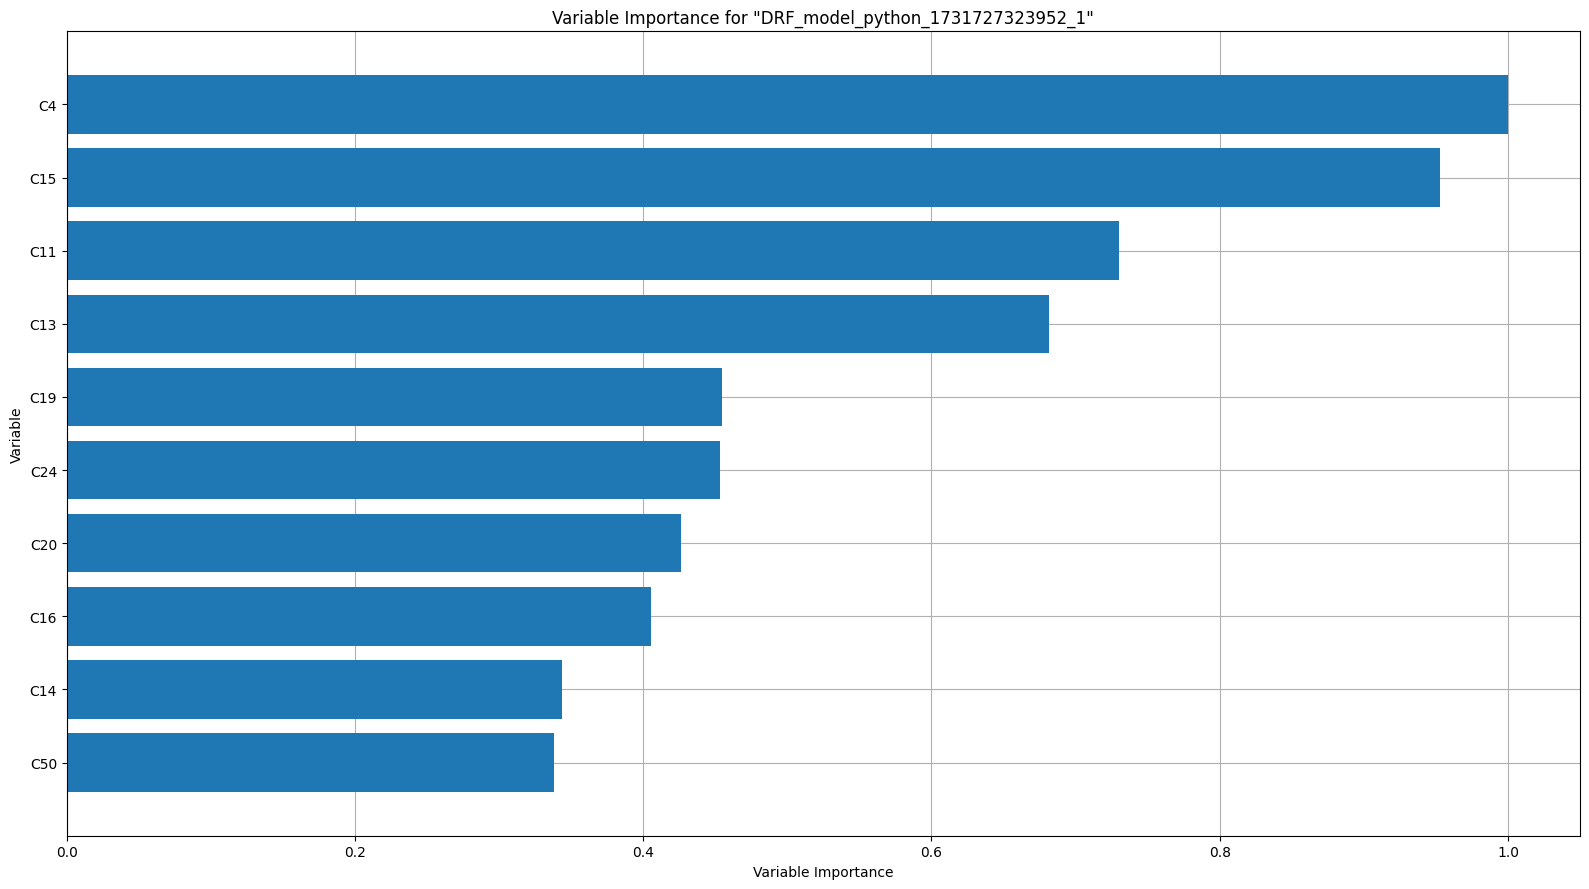

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

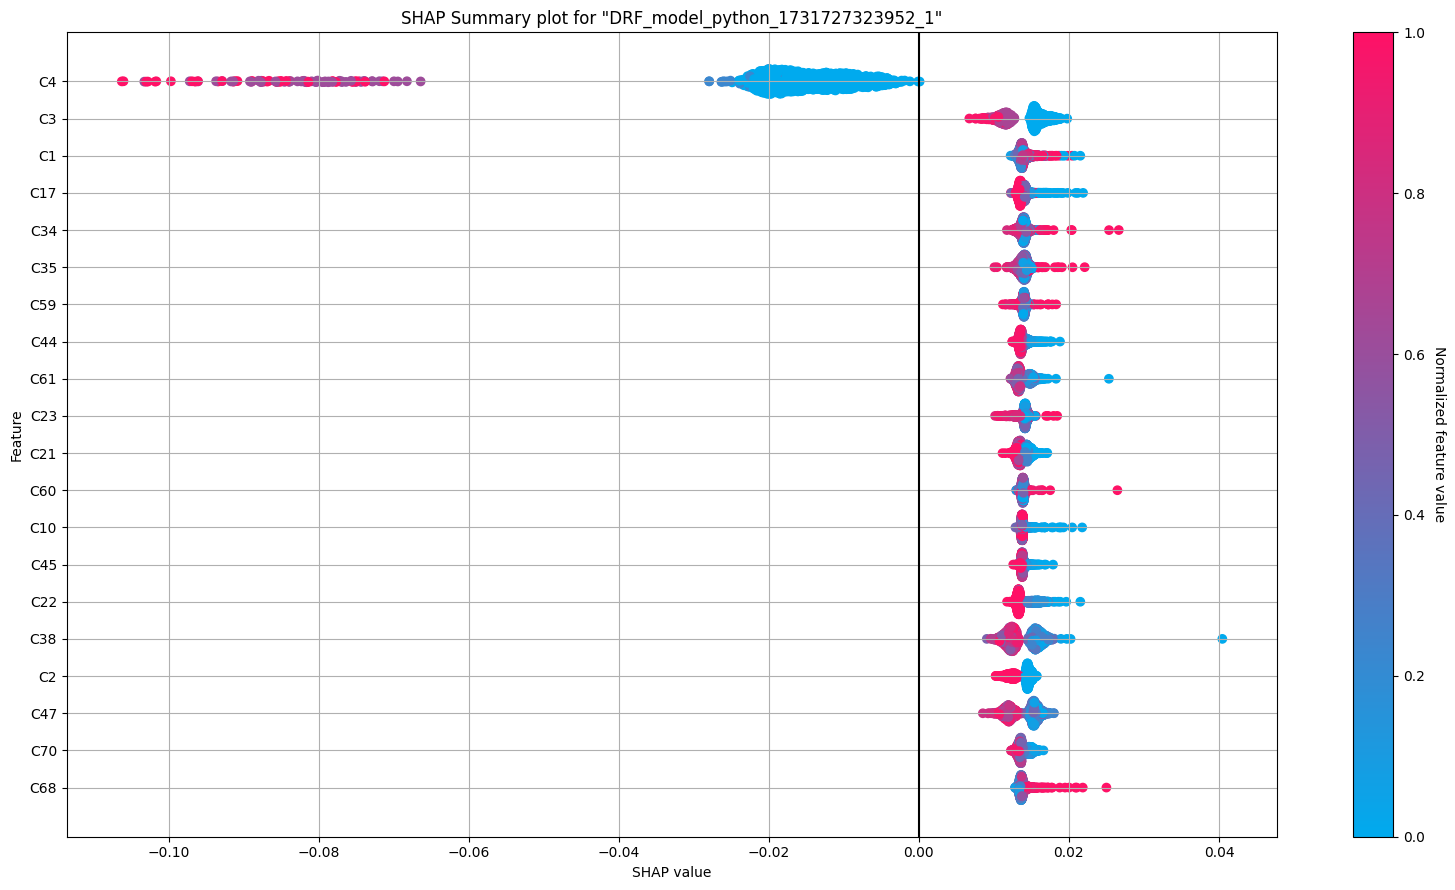

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

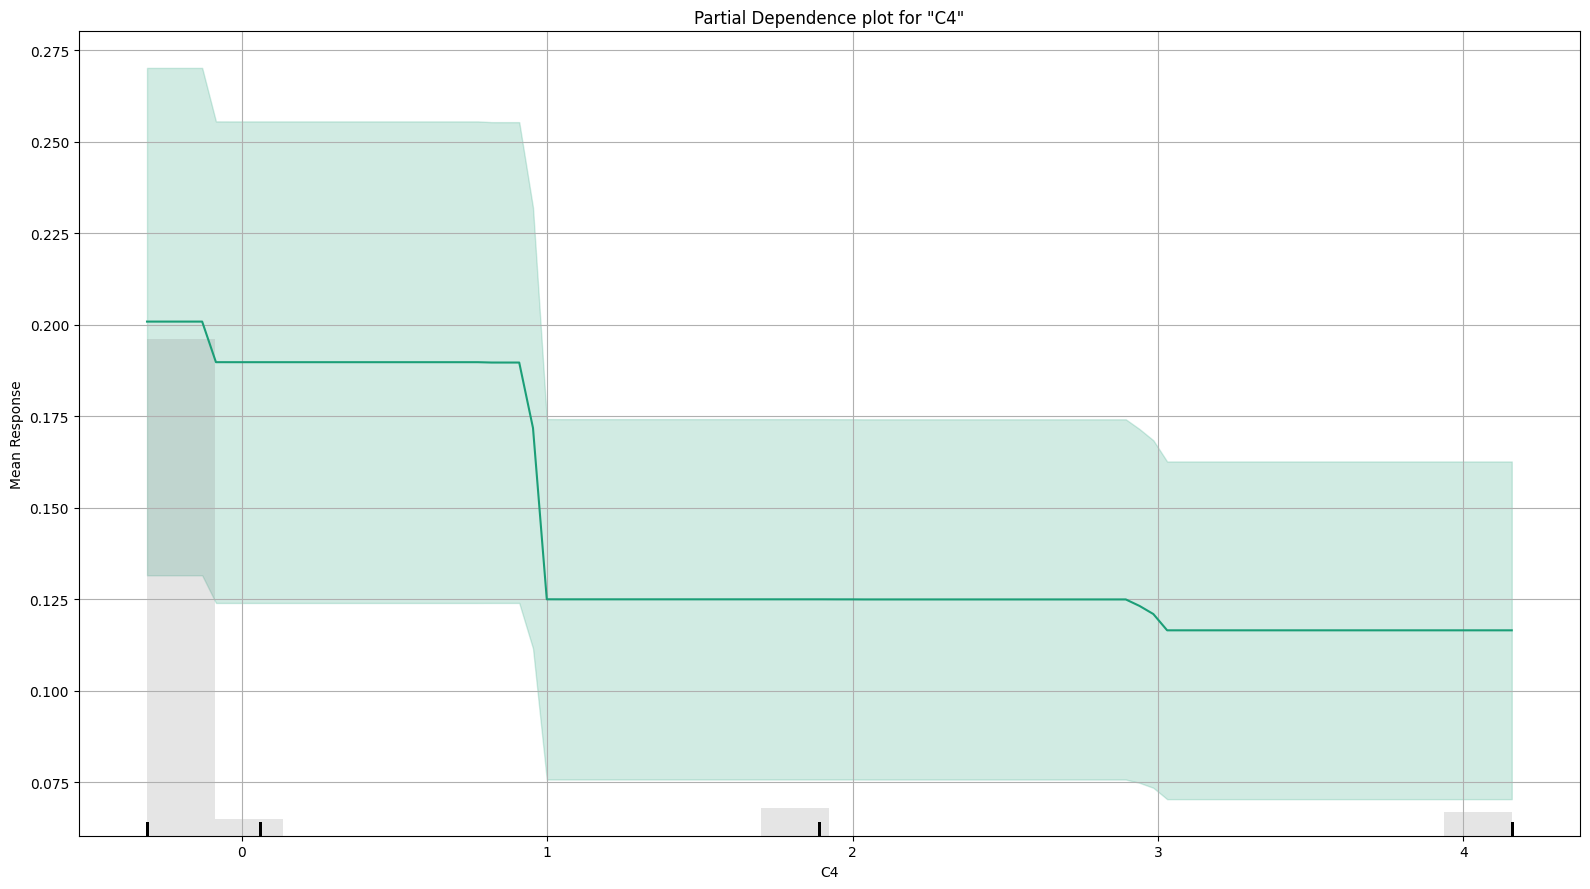

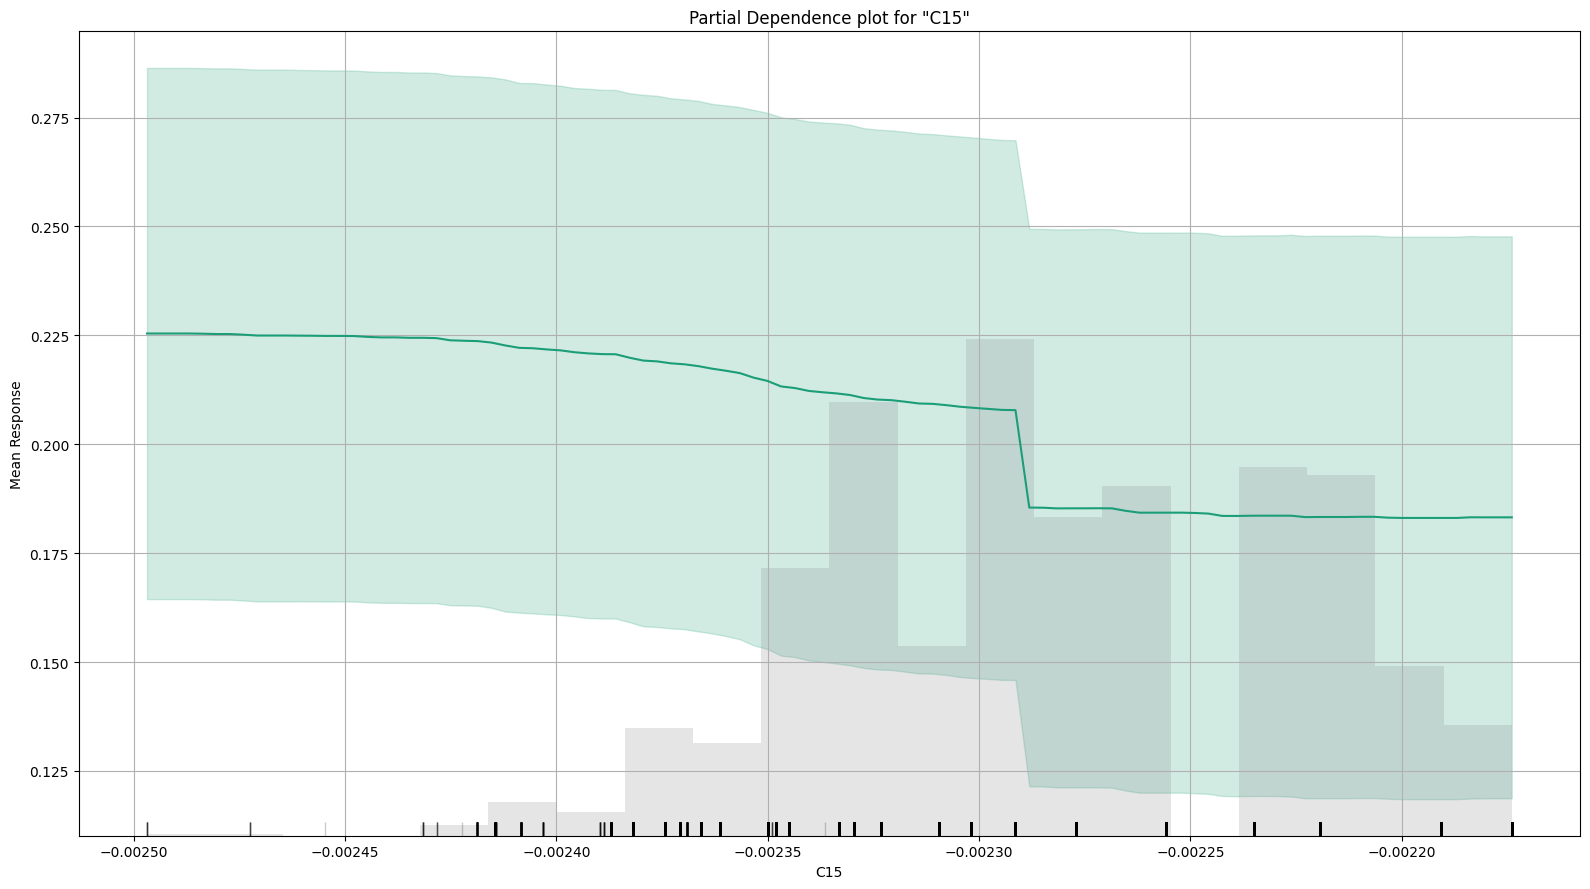

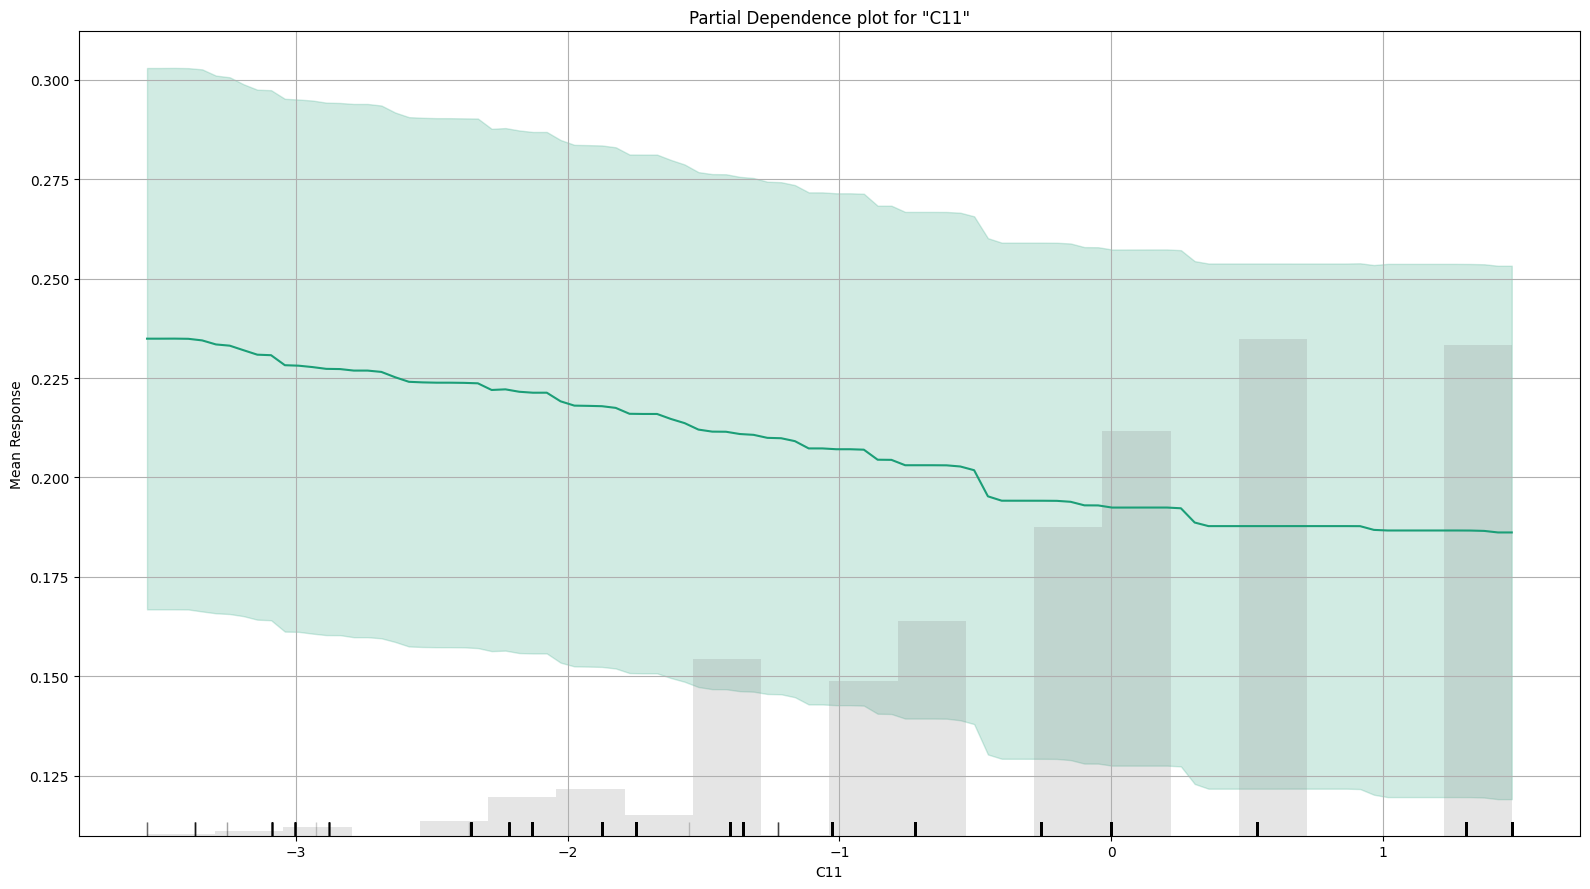

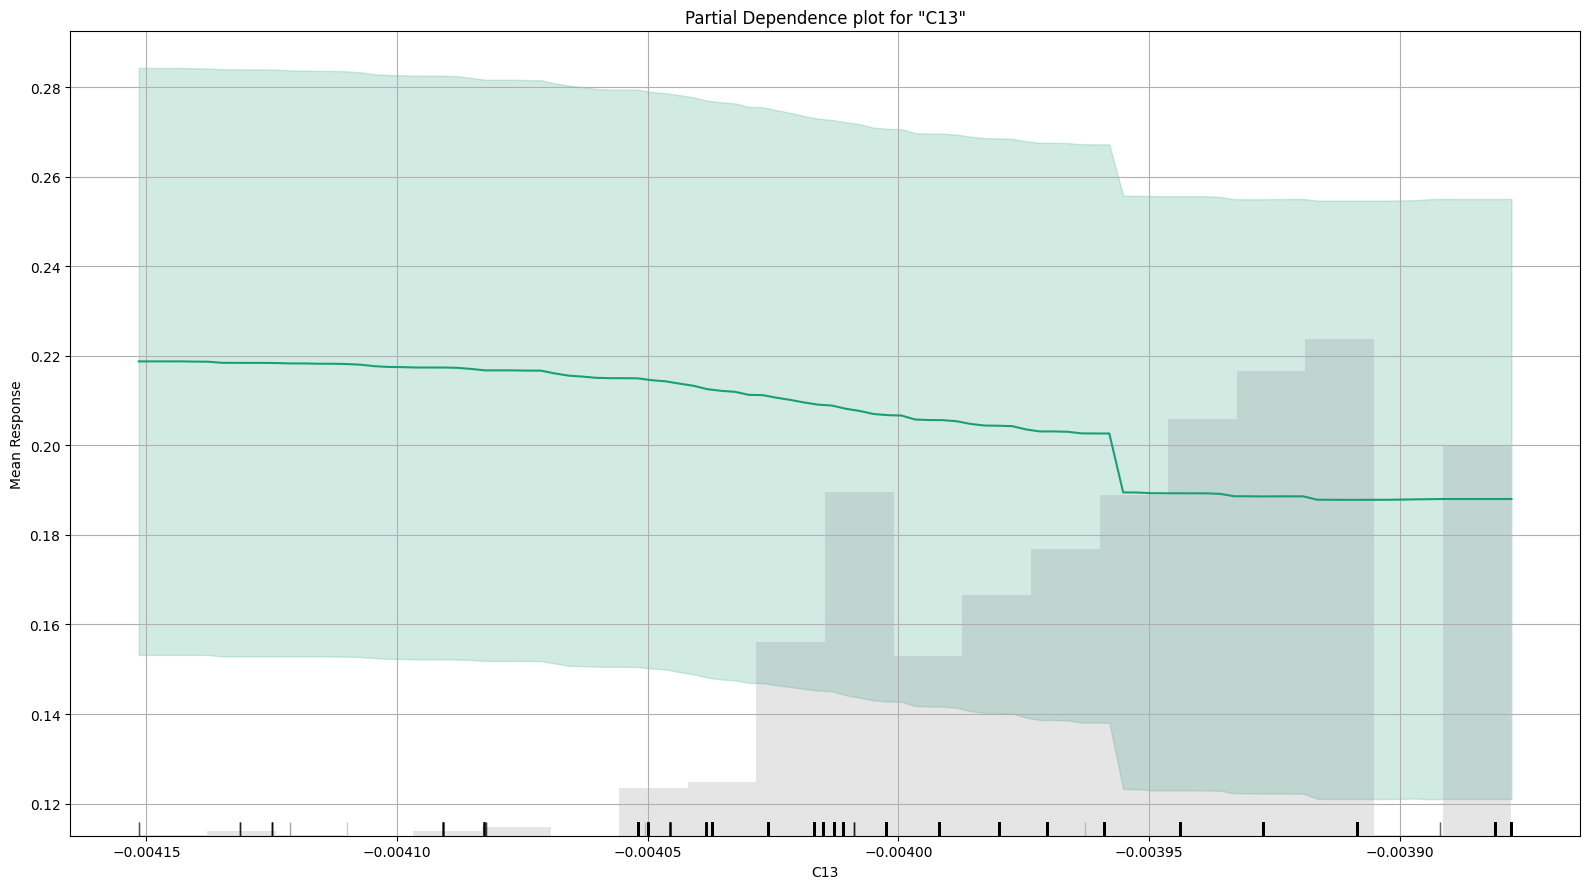

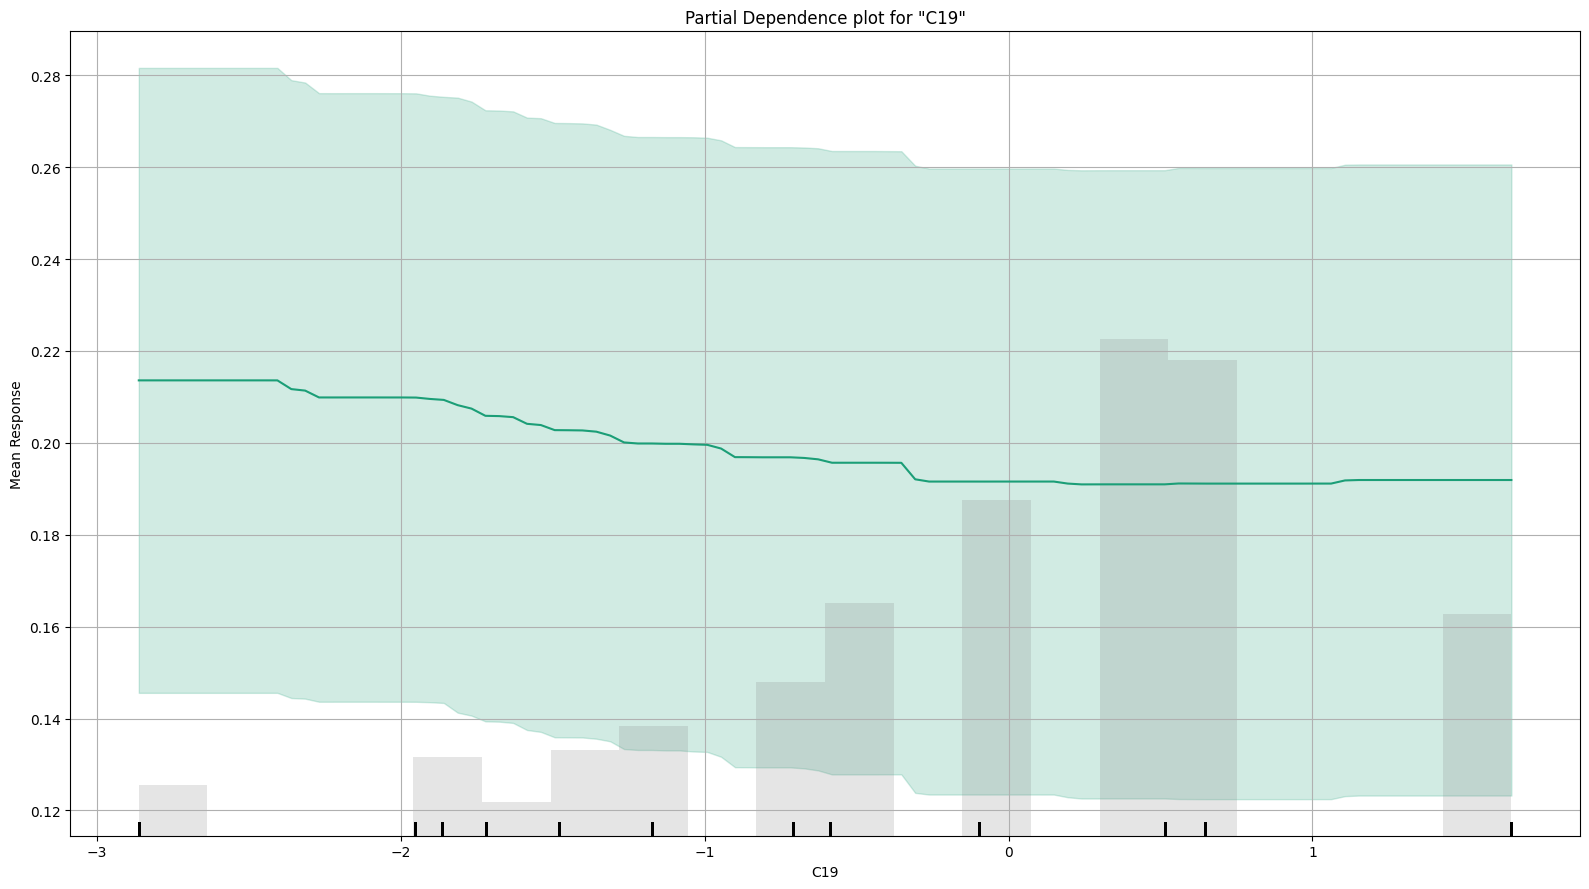

In [37]:
rf_model_original.explain(test_h2o)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1731727323952_15

,0,1,Error,Rate
0,8048.0,4854.0,0.3762,(4854.0/12902.0)
1,1064.0,2034.0,0.3434,(1064.0/3098.0)
Total,9112.0,6888.0,0.3699,(5918.0/16000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

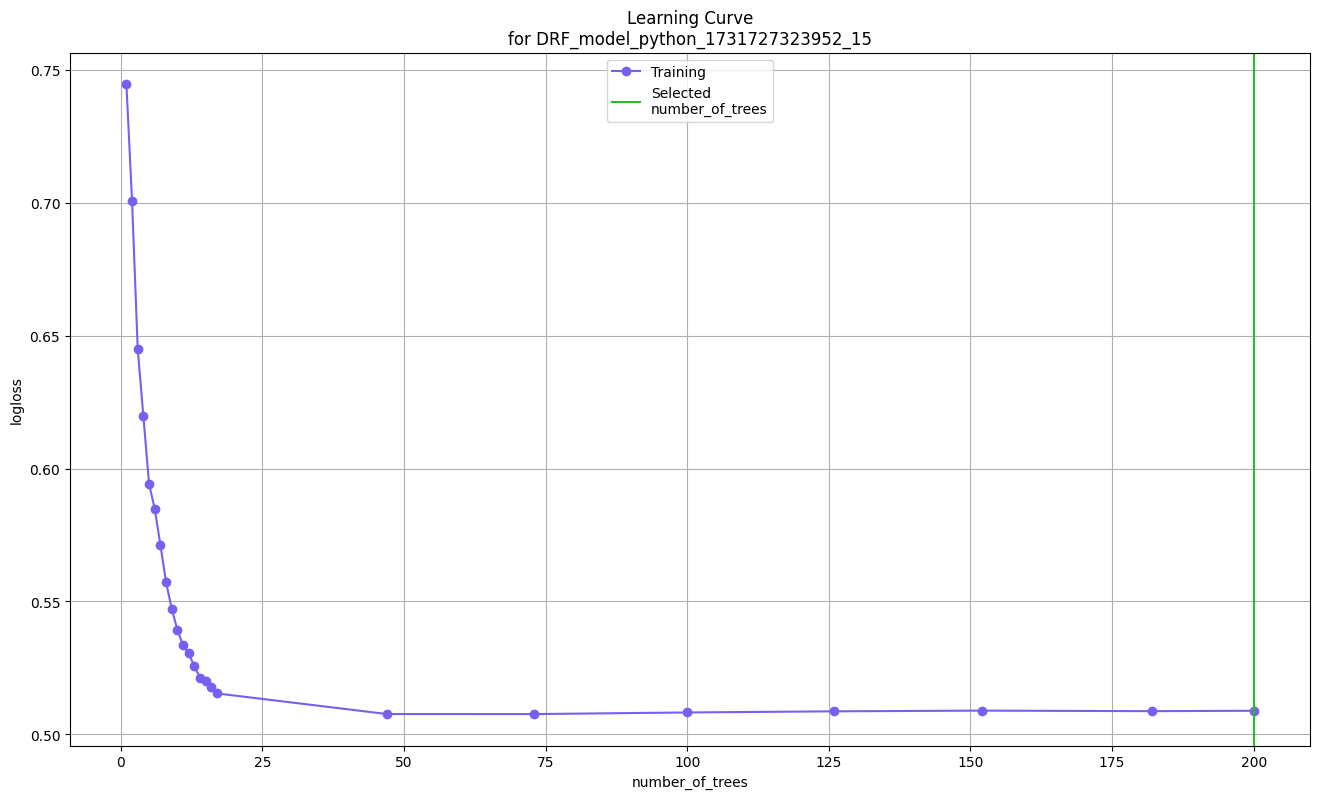

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

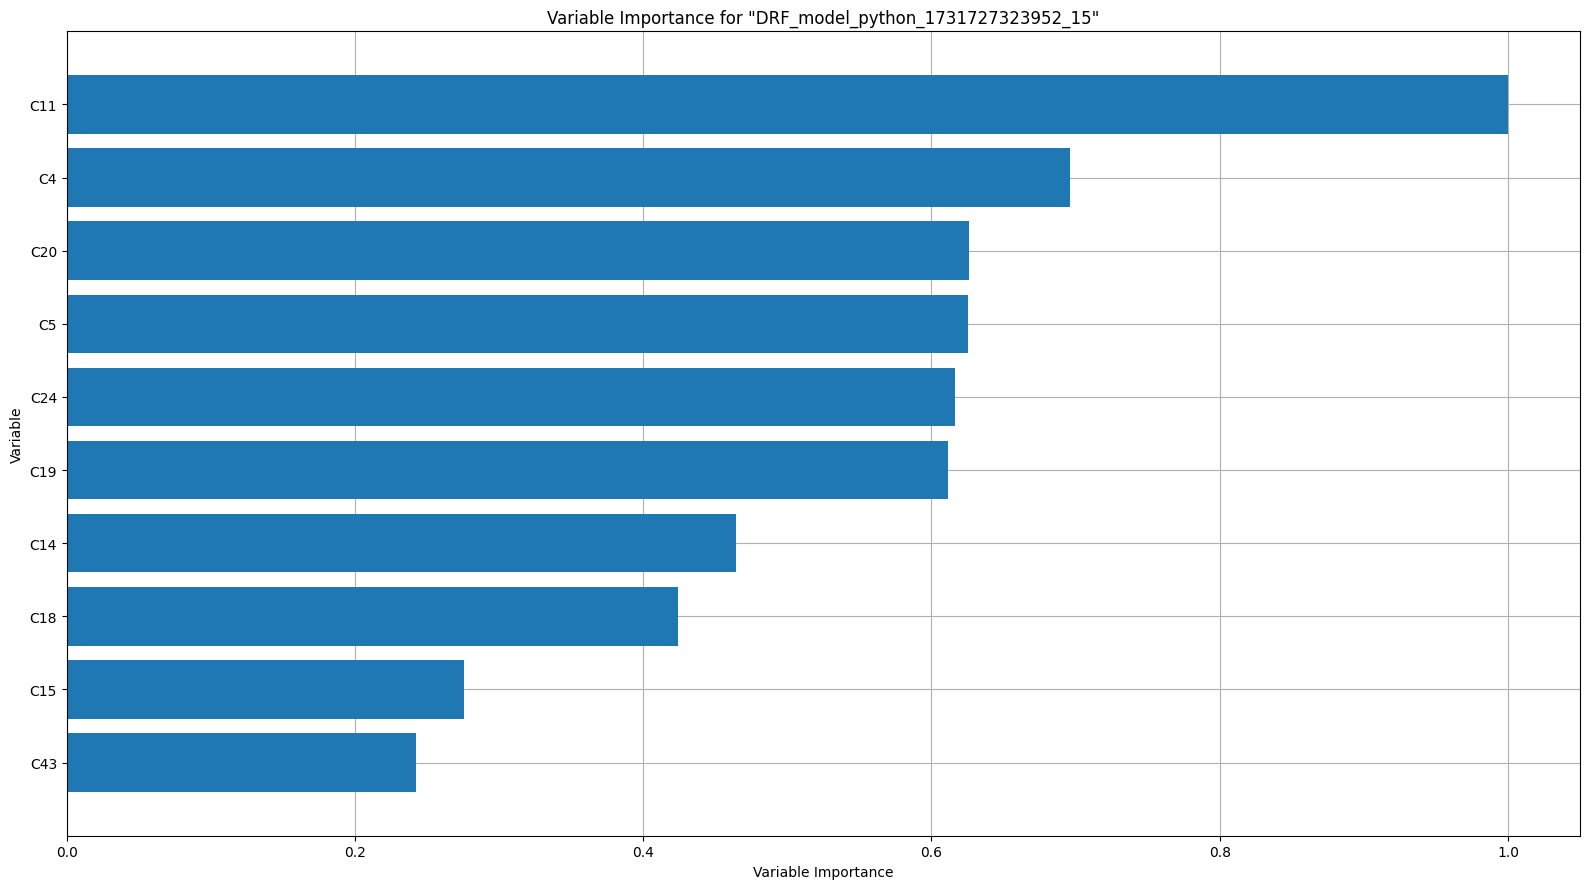

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

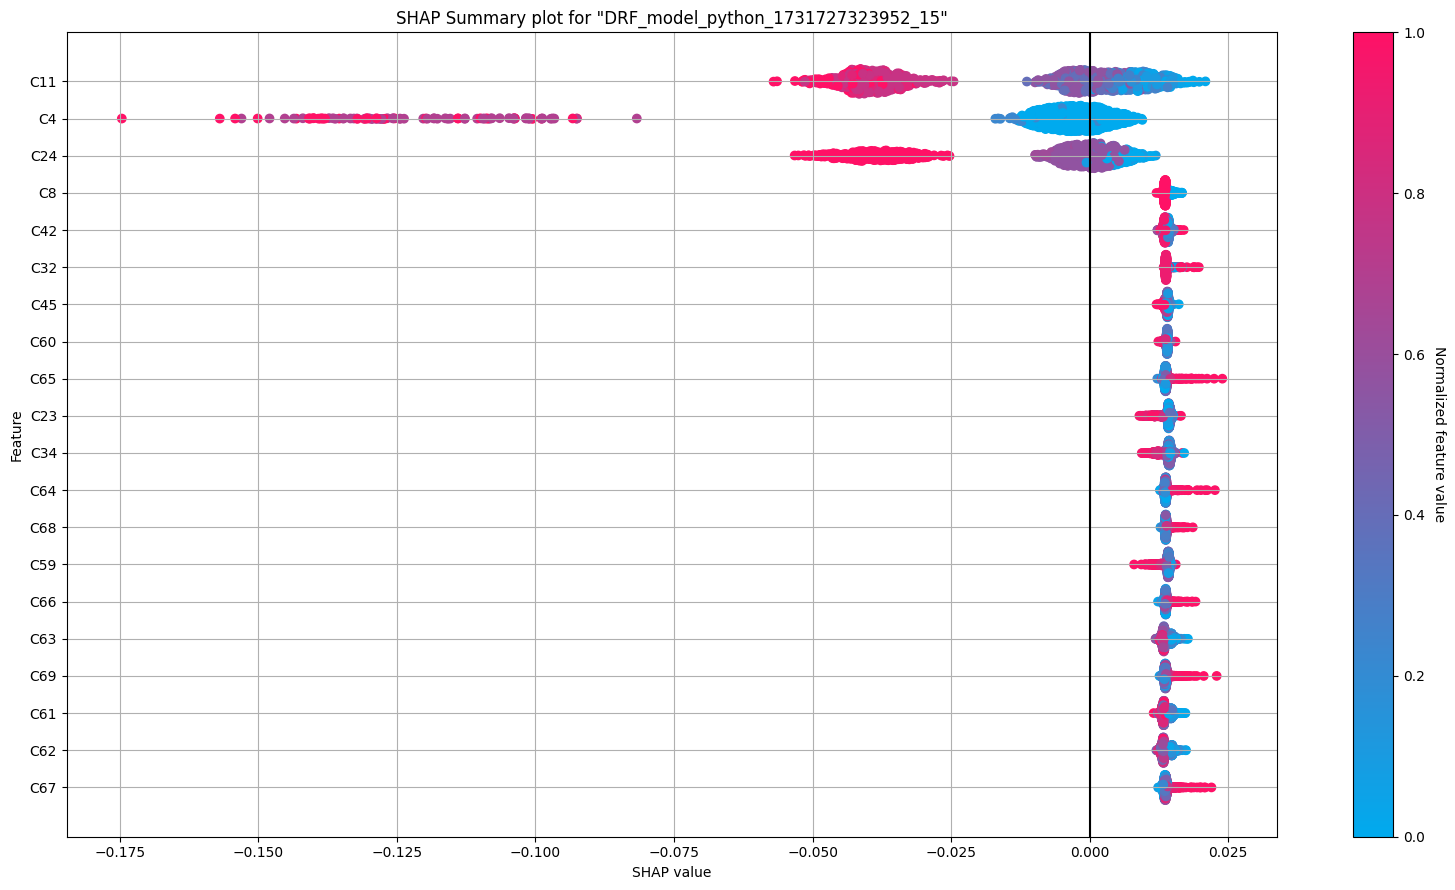

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

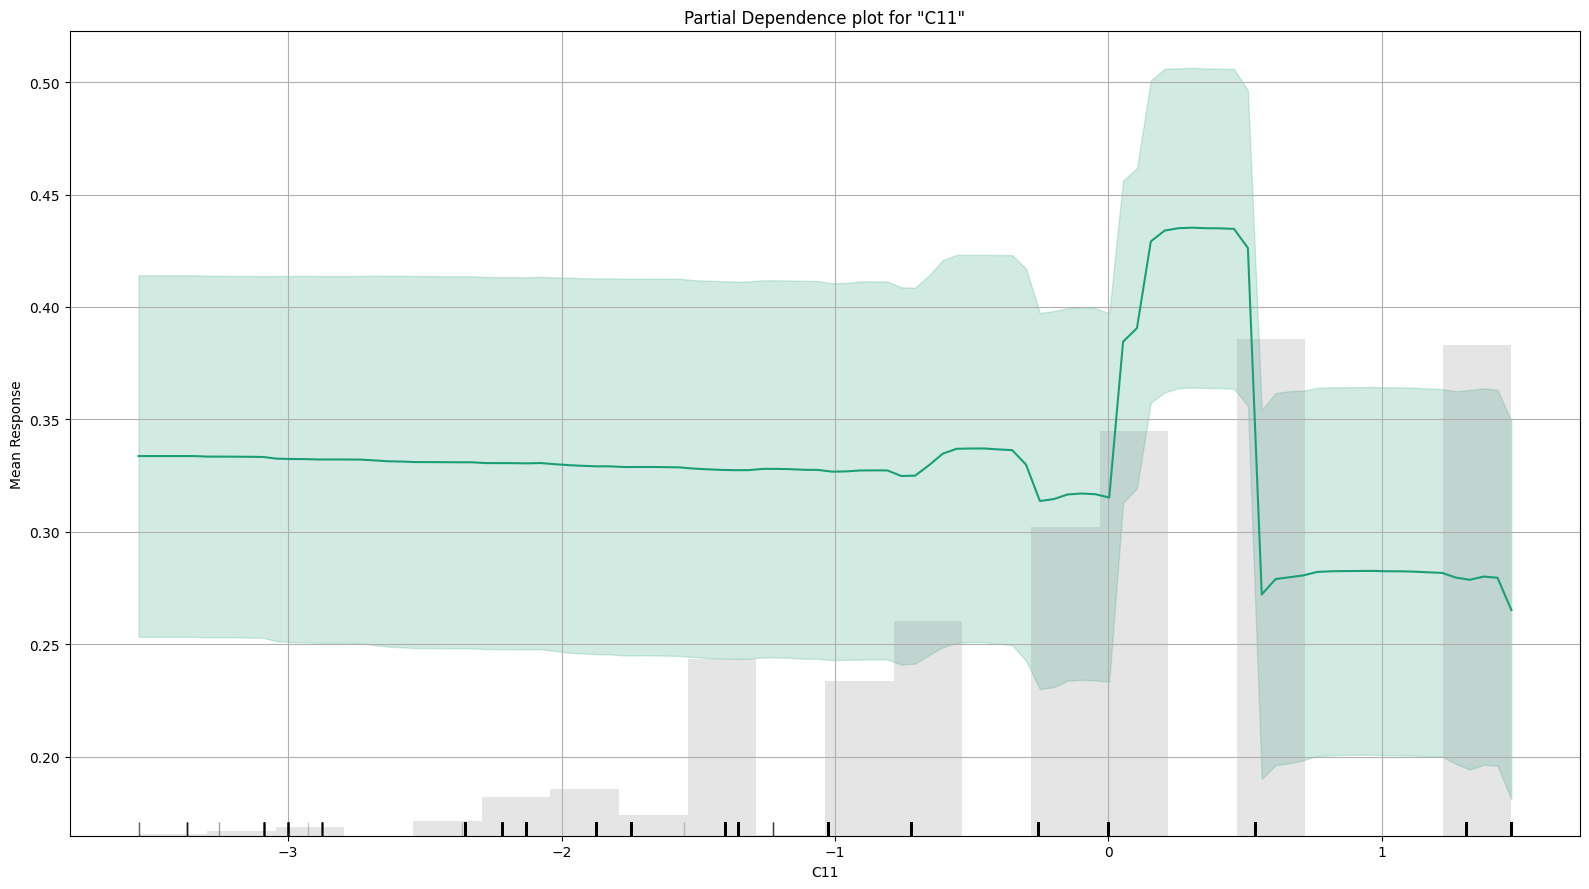

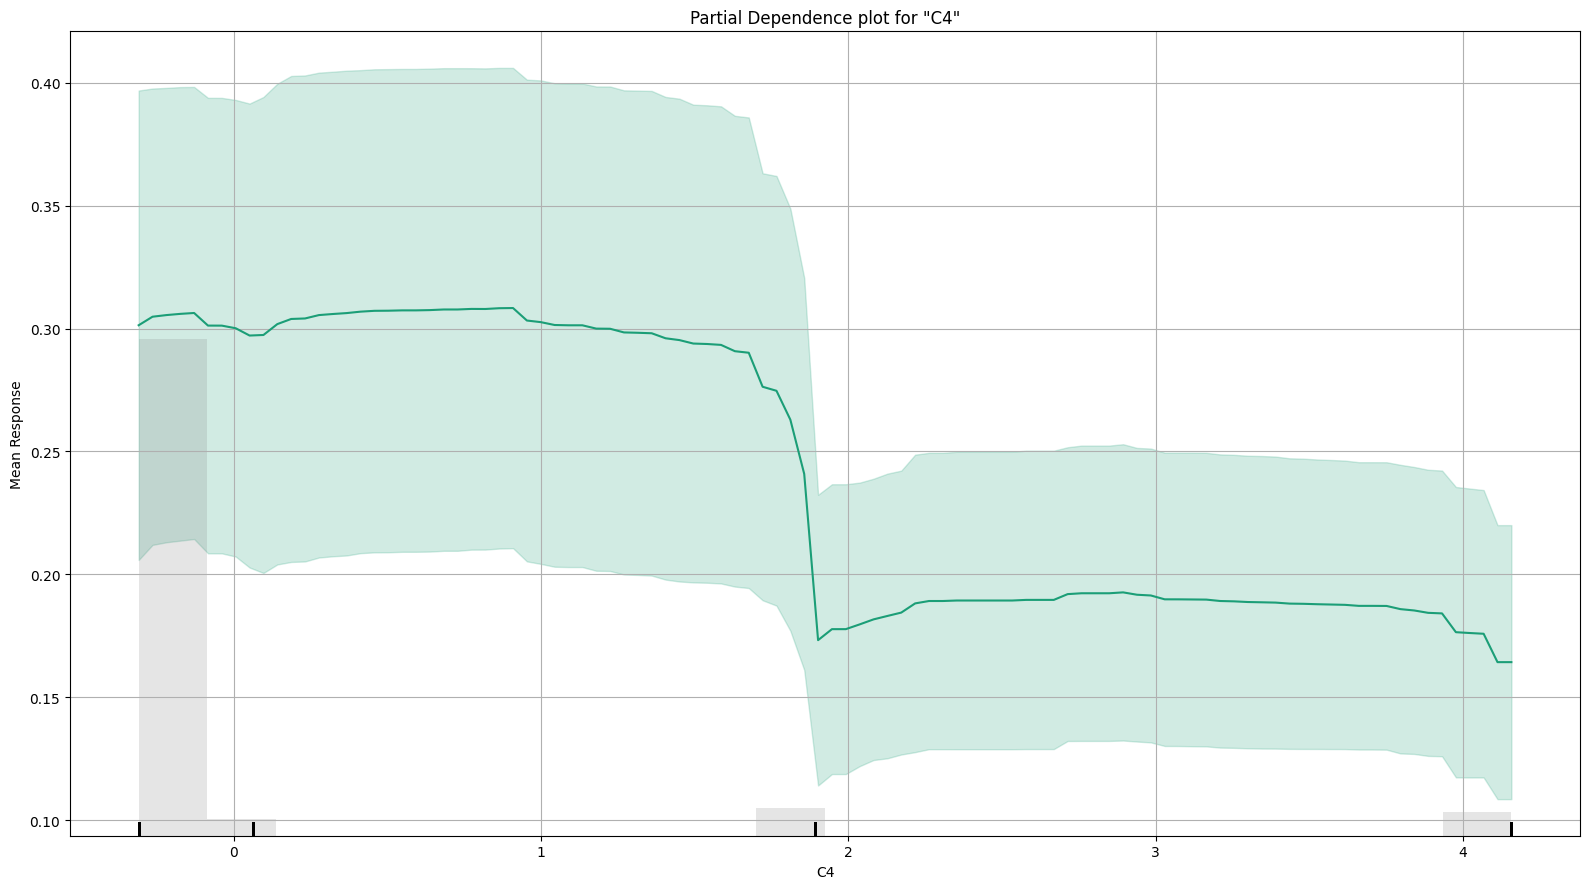

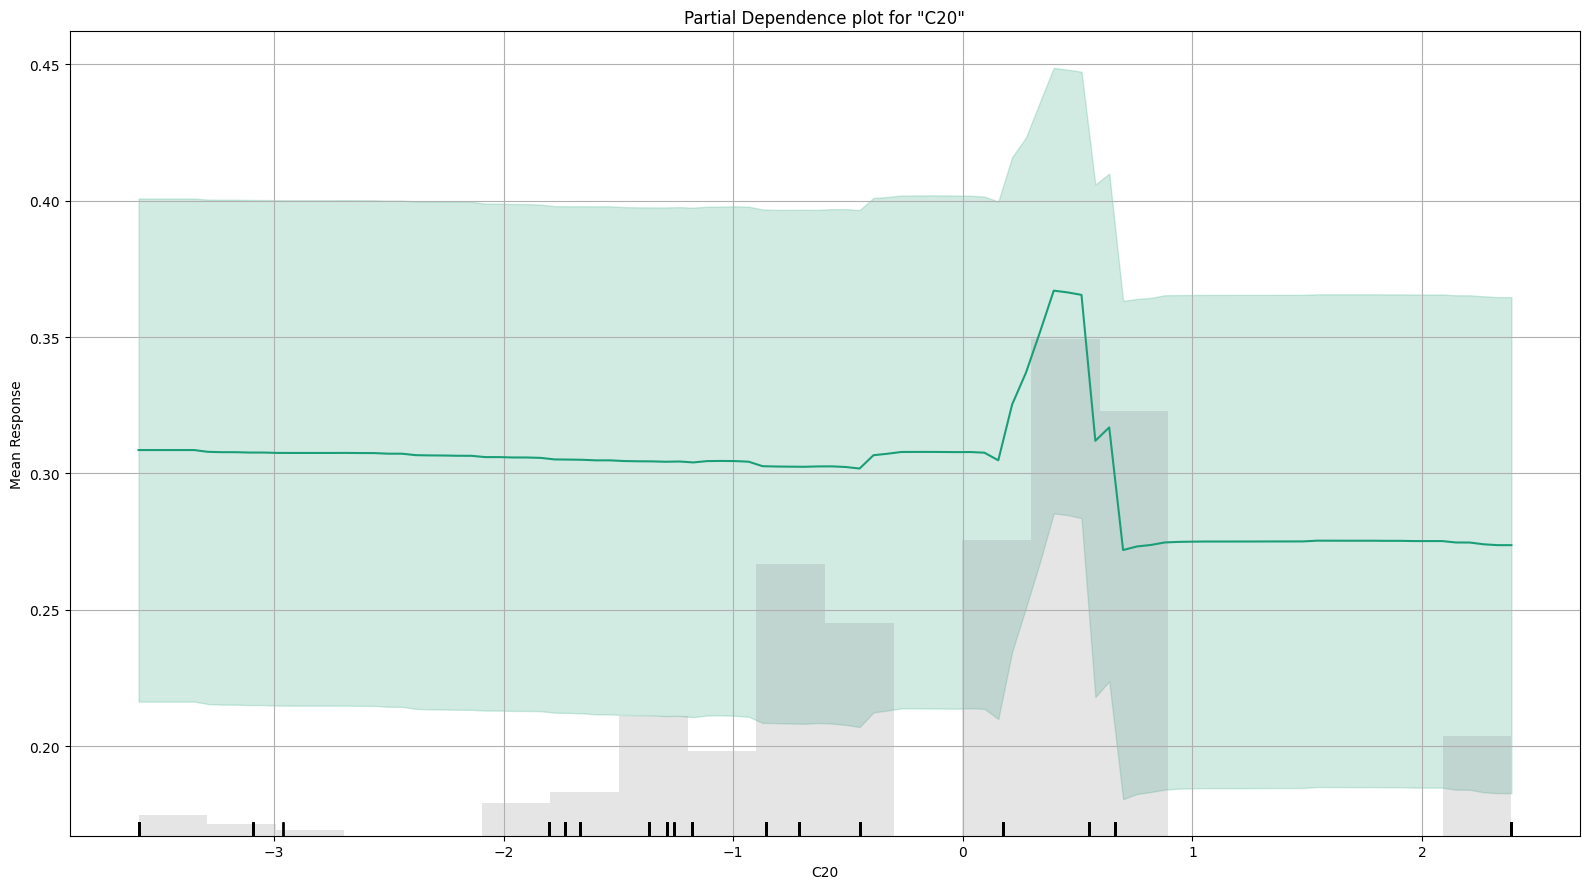

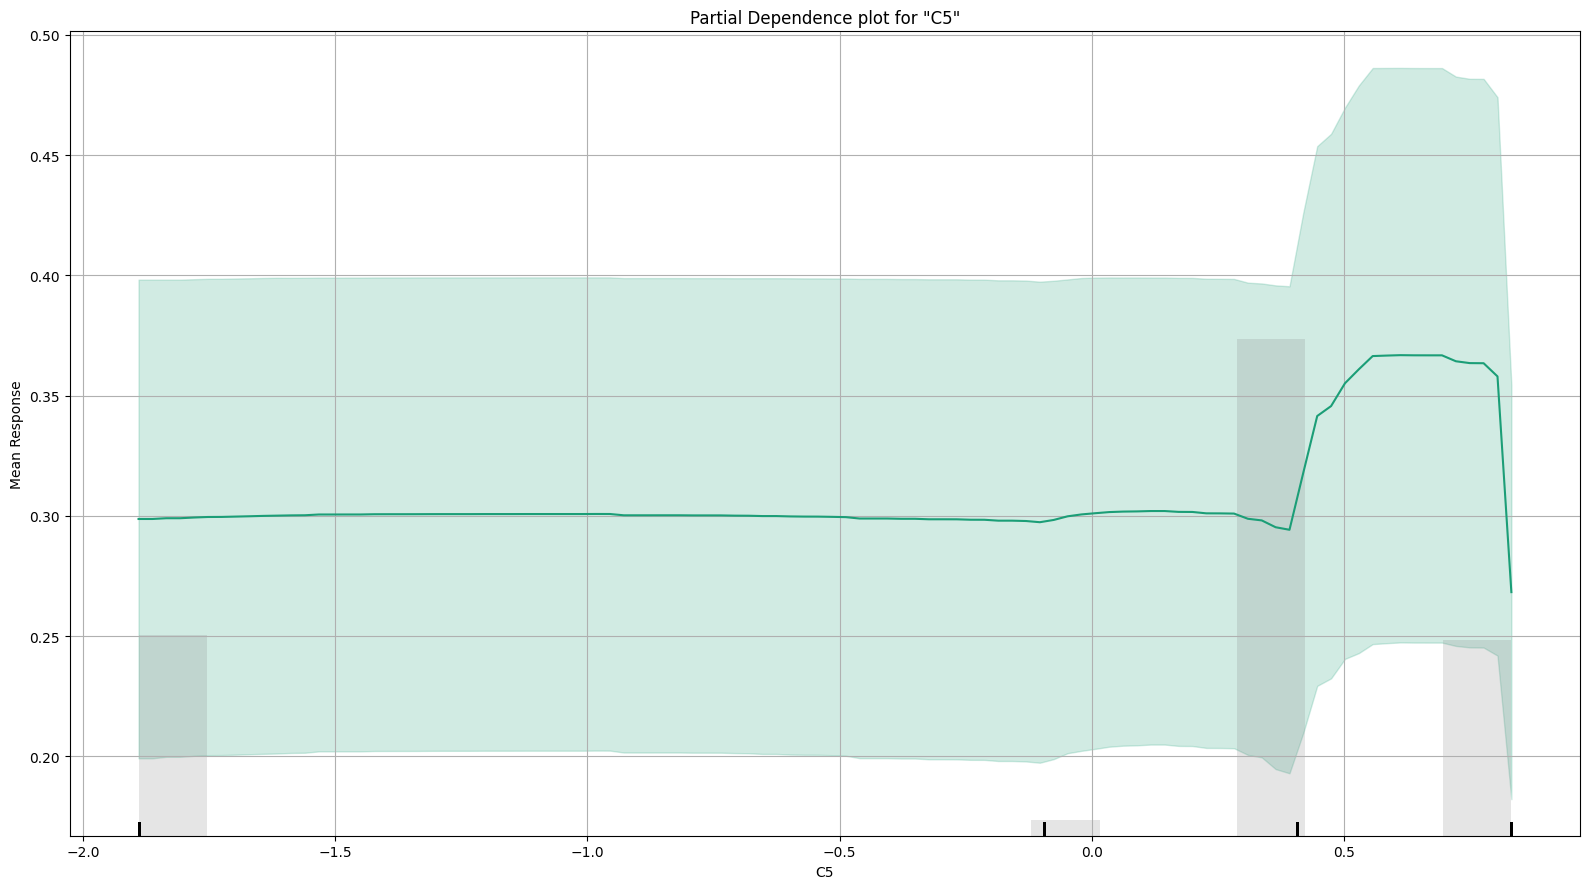

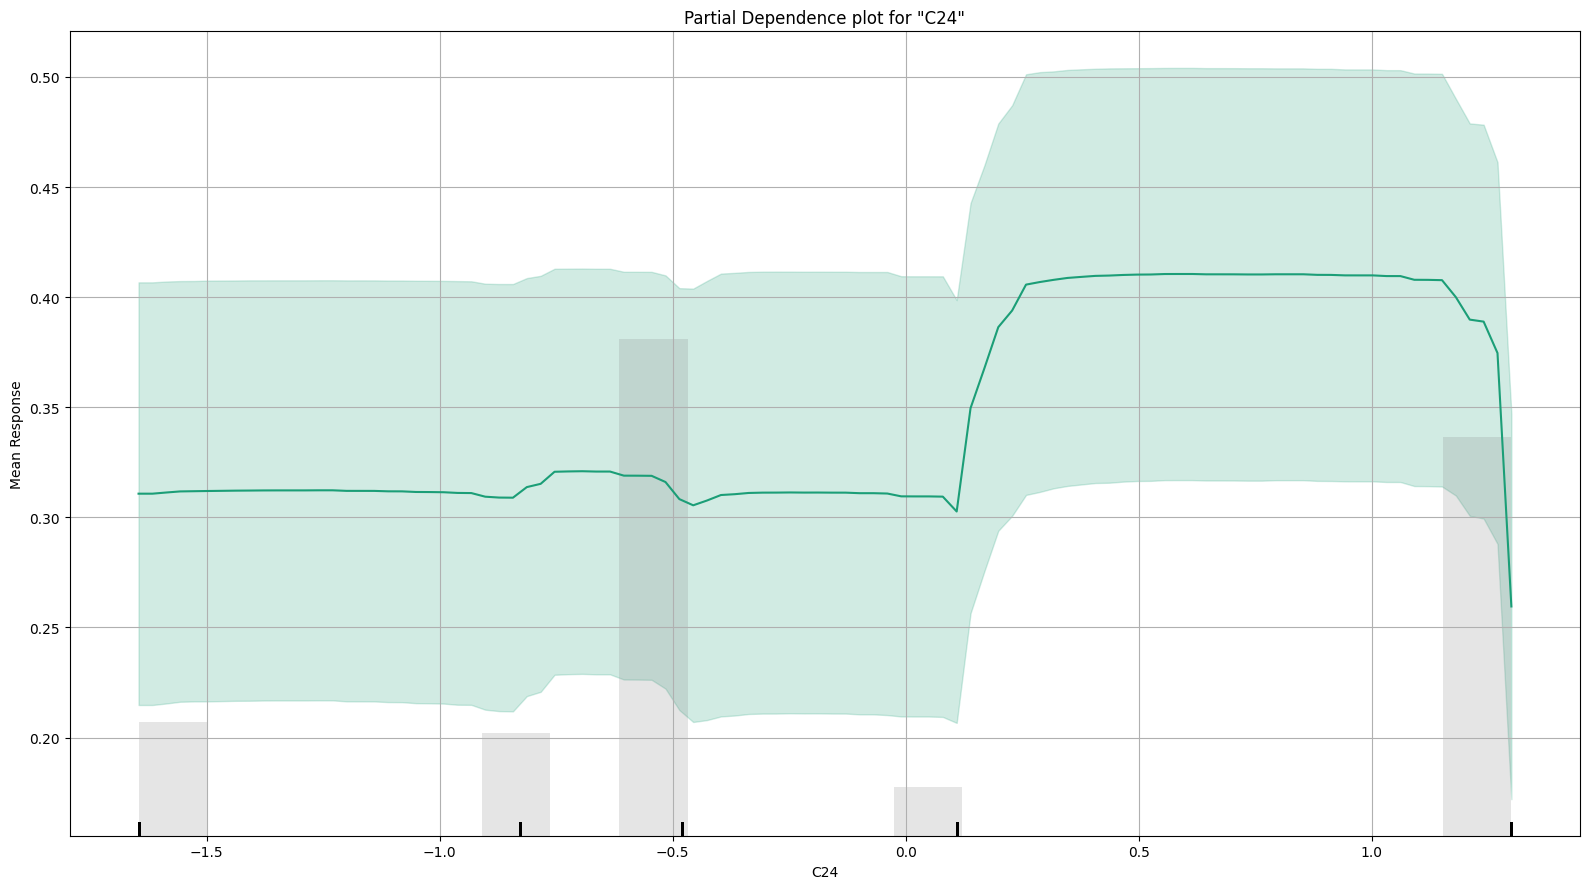

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1731727323952_15

,0,1,Error,Rate
0,8048.0,4854.0,0.3762,(4854.0/12902.0)
1,1064.0,2034.0,0.3434,(1064.0/3098.0)
Total,9112.0,6888.0,0.3699,(5918.0/16000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

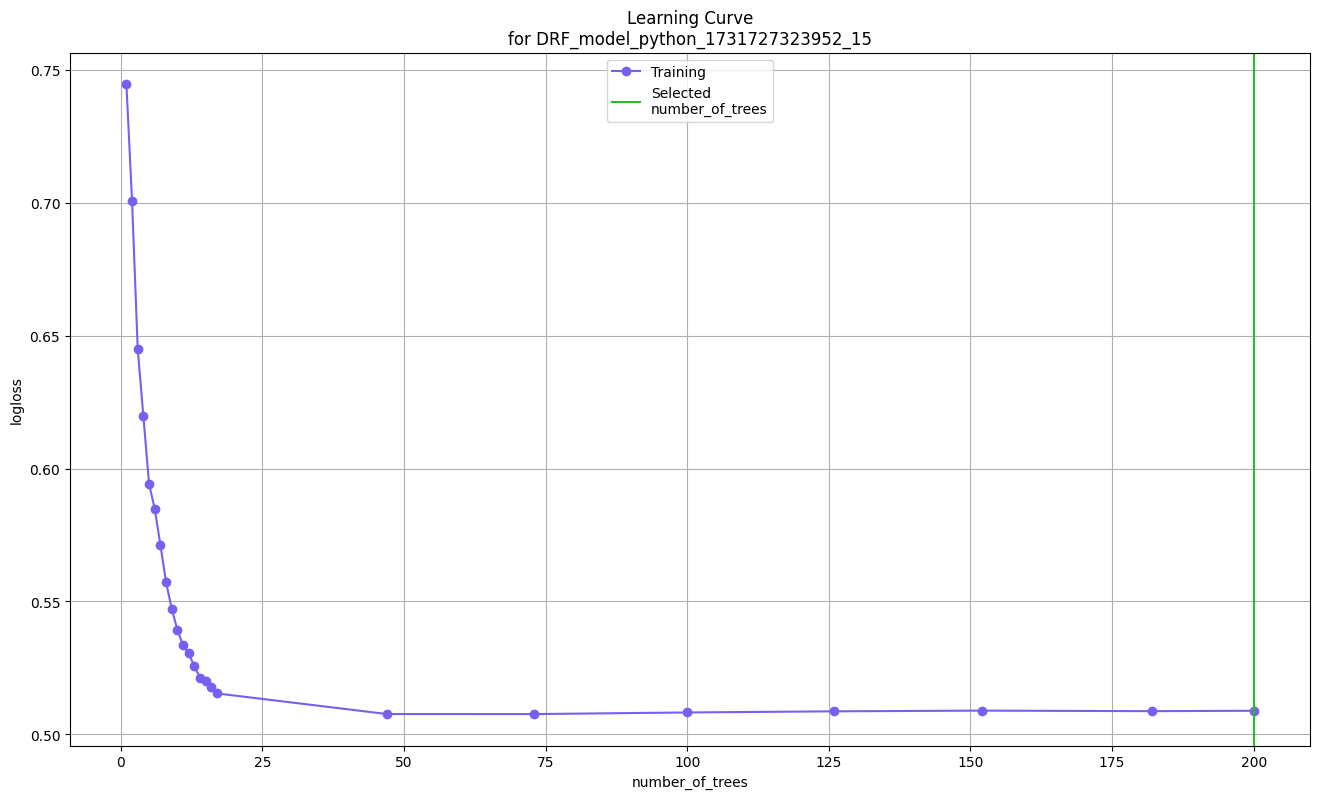

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

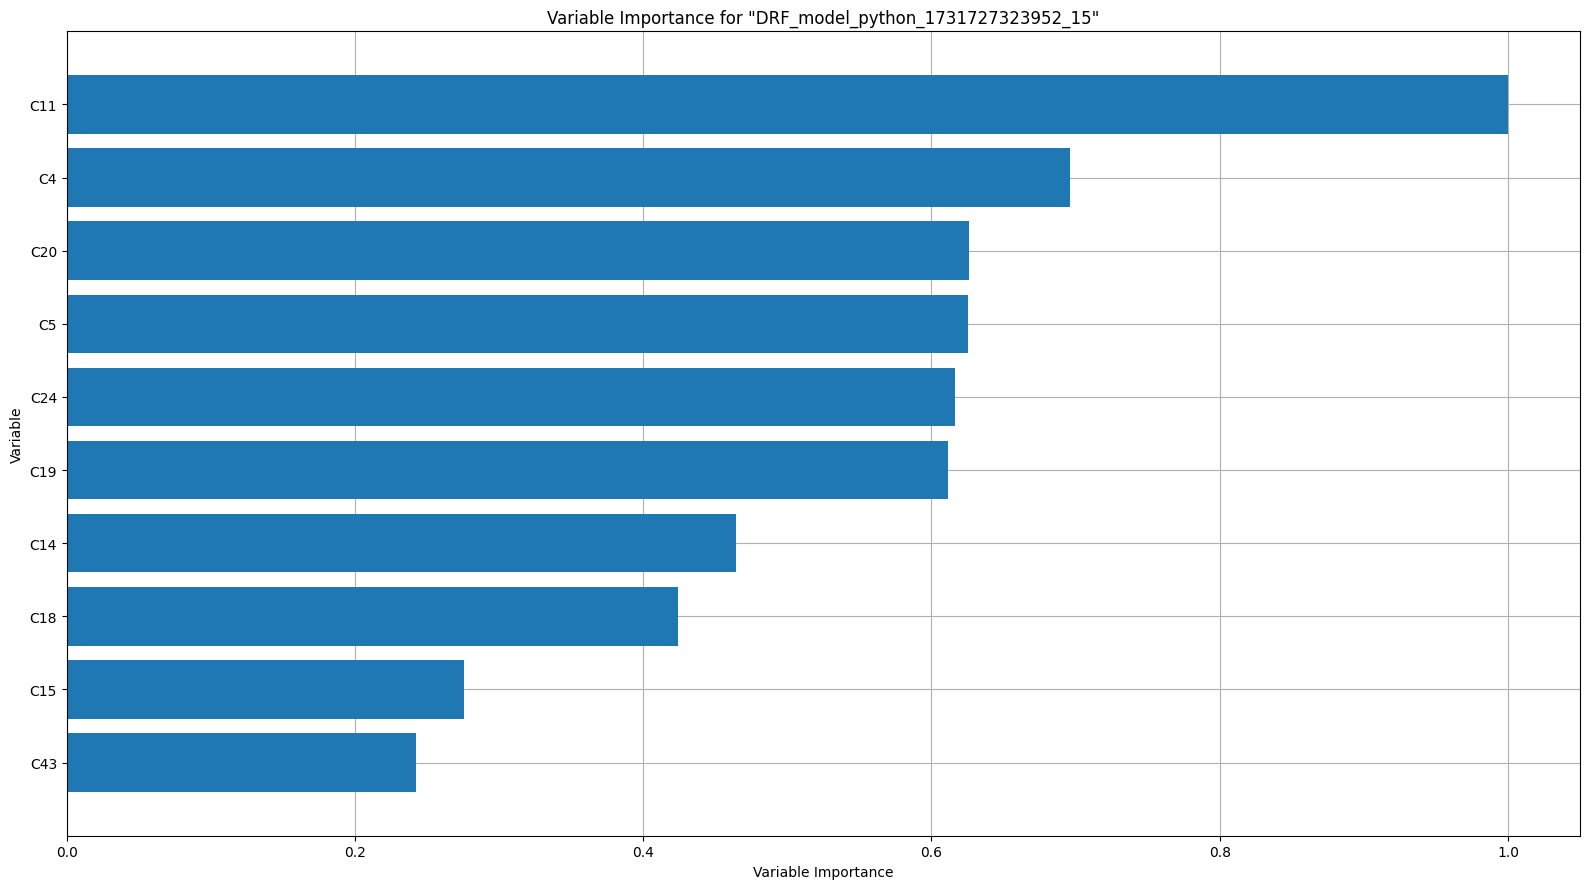

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

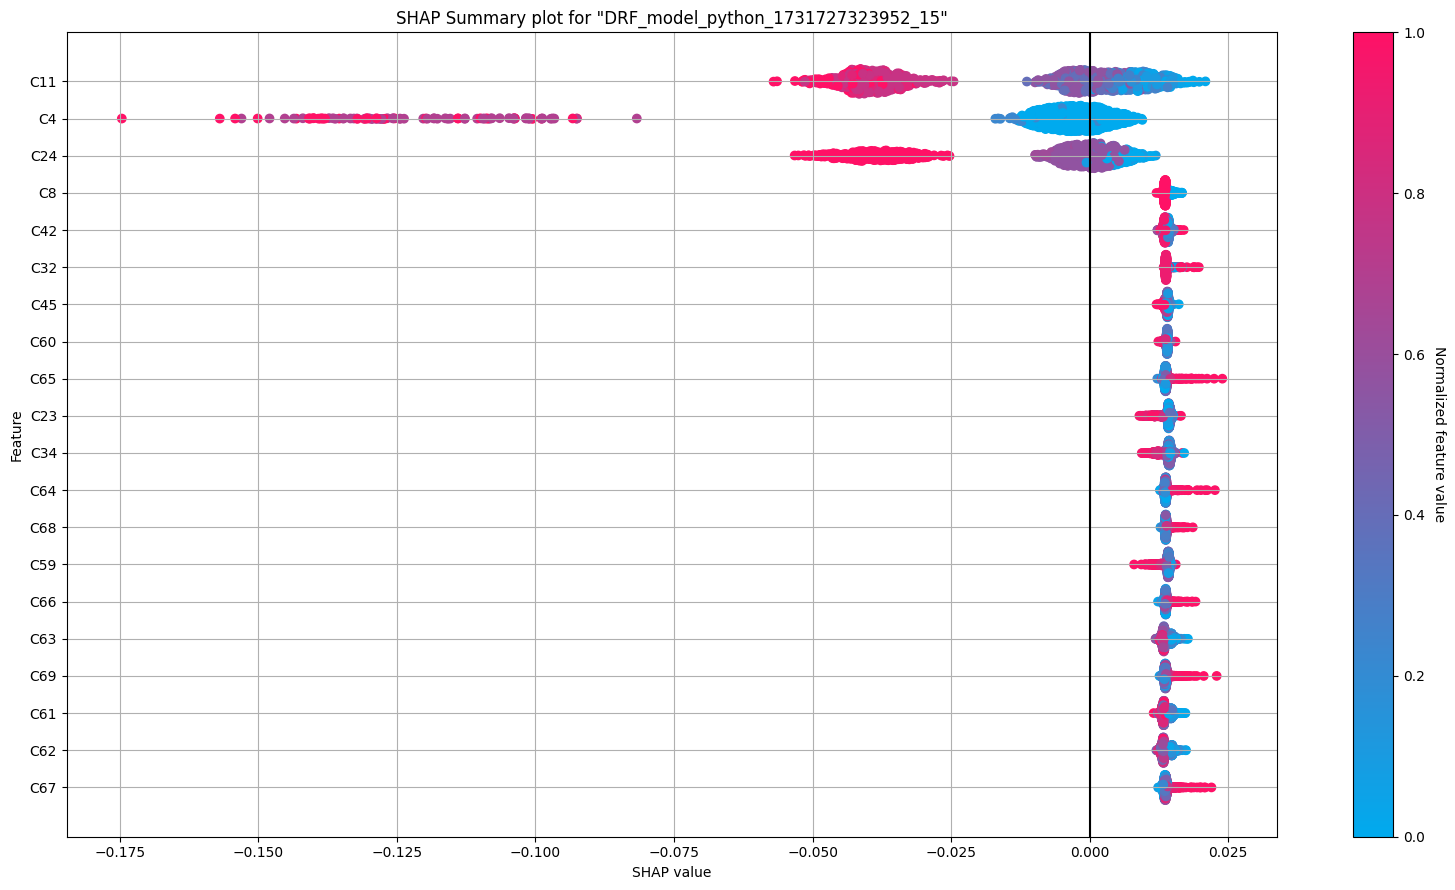

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

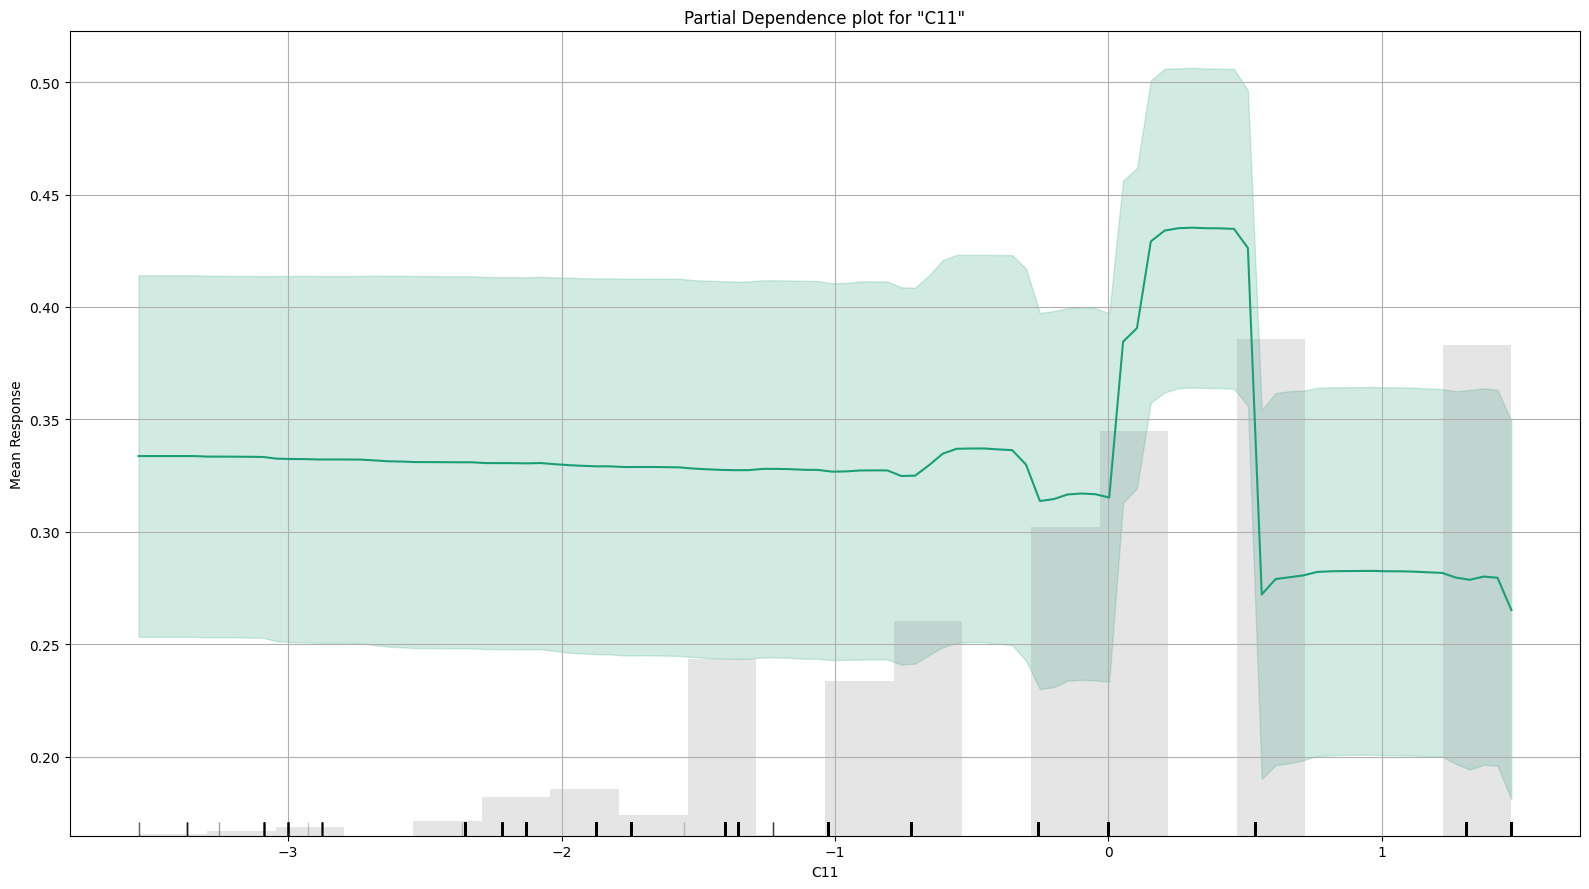

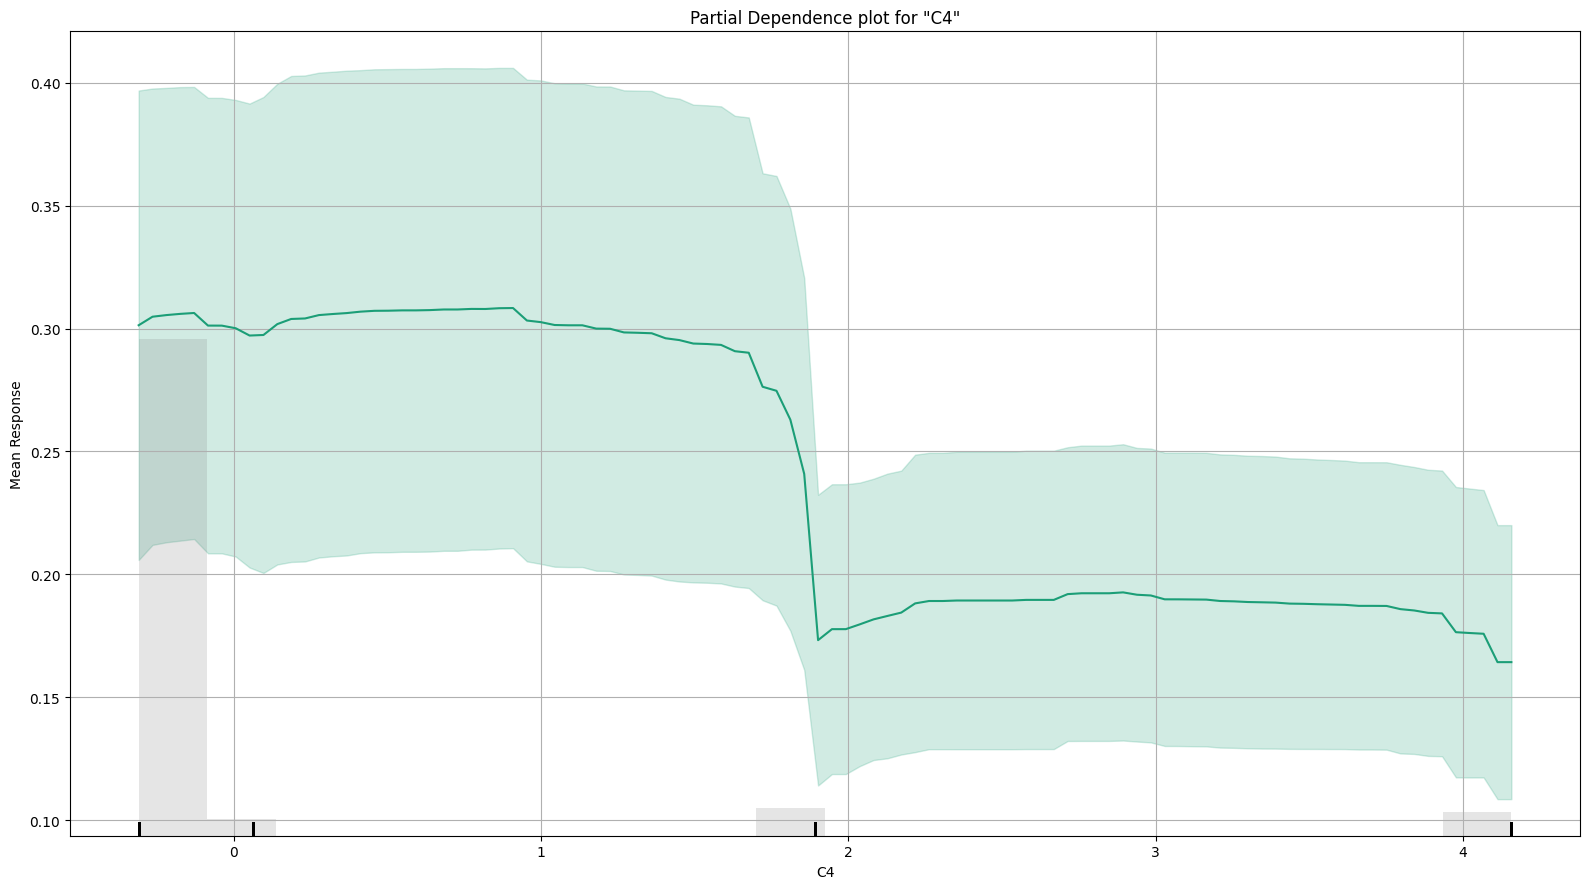

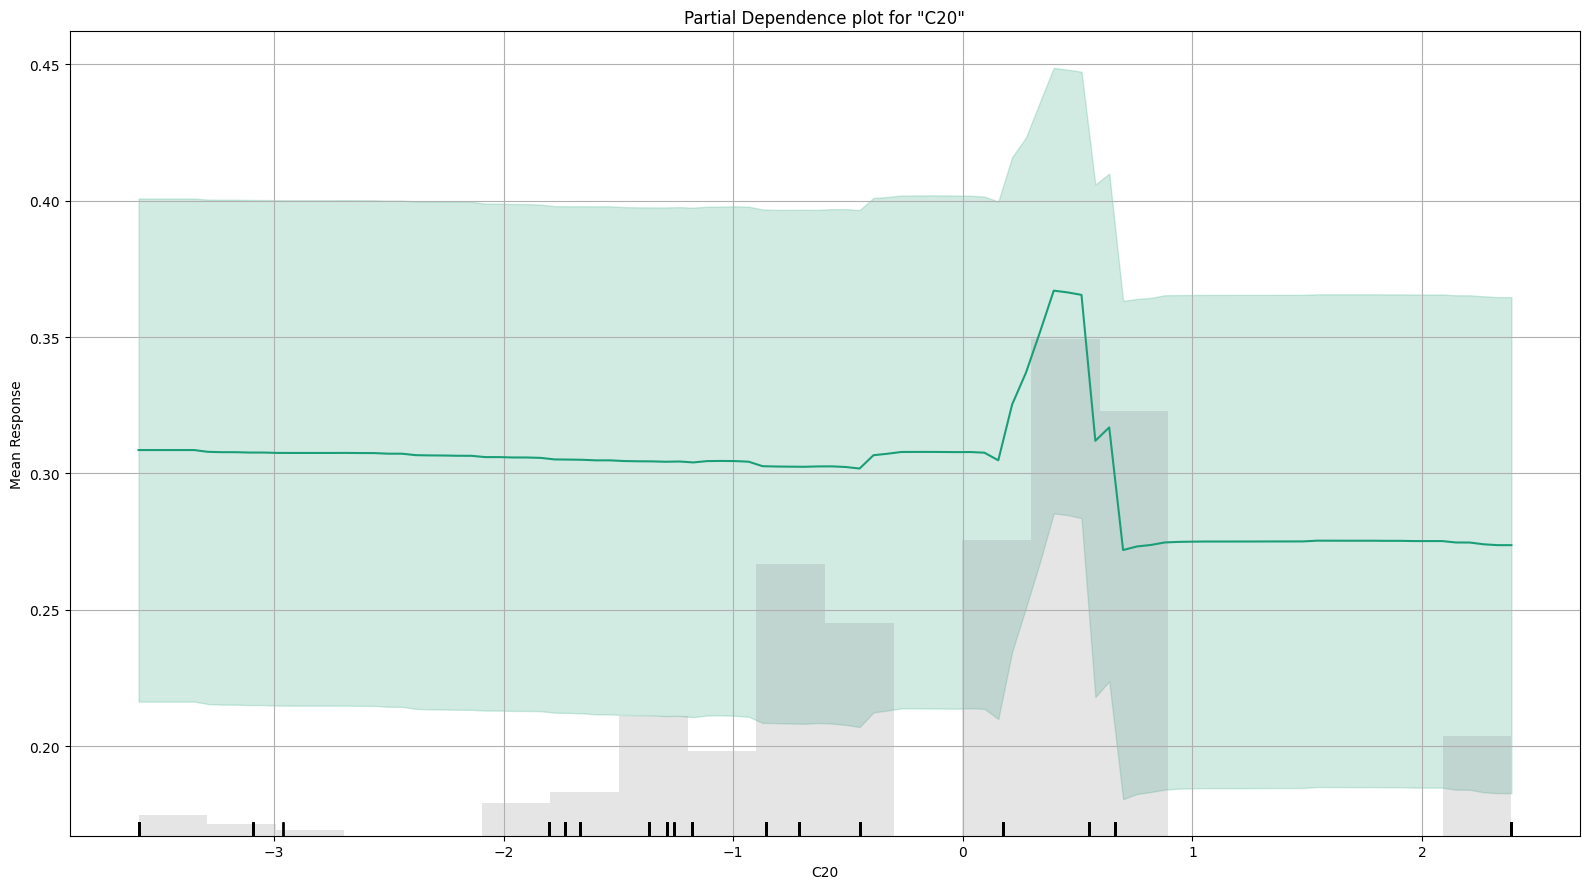

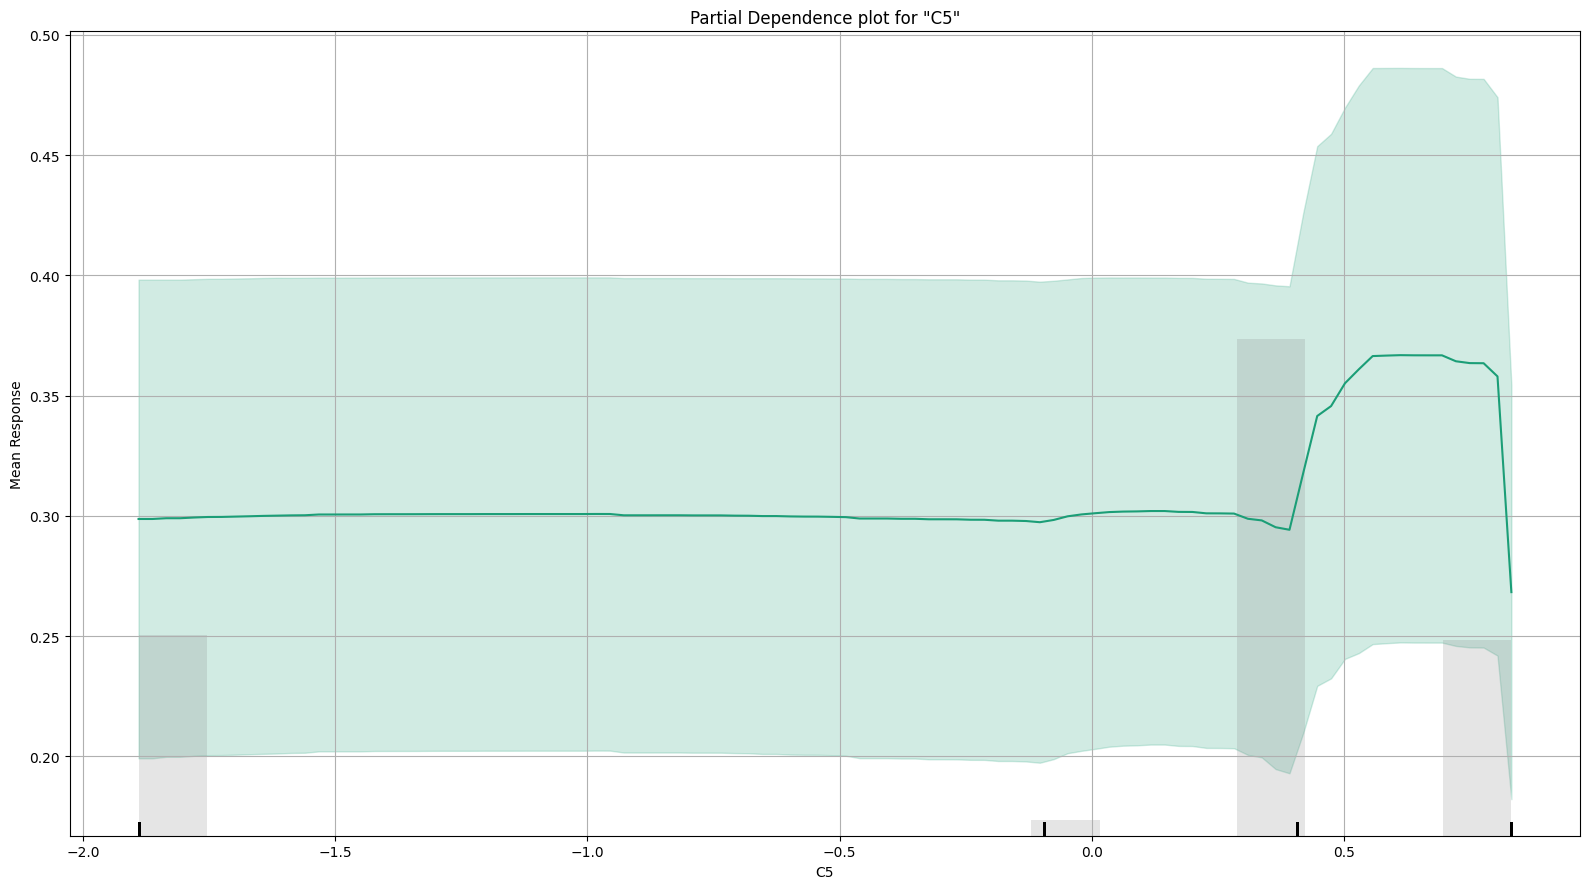

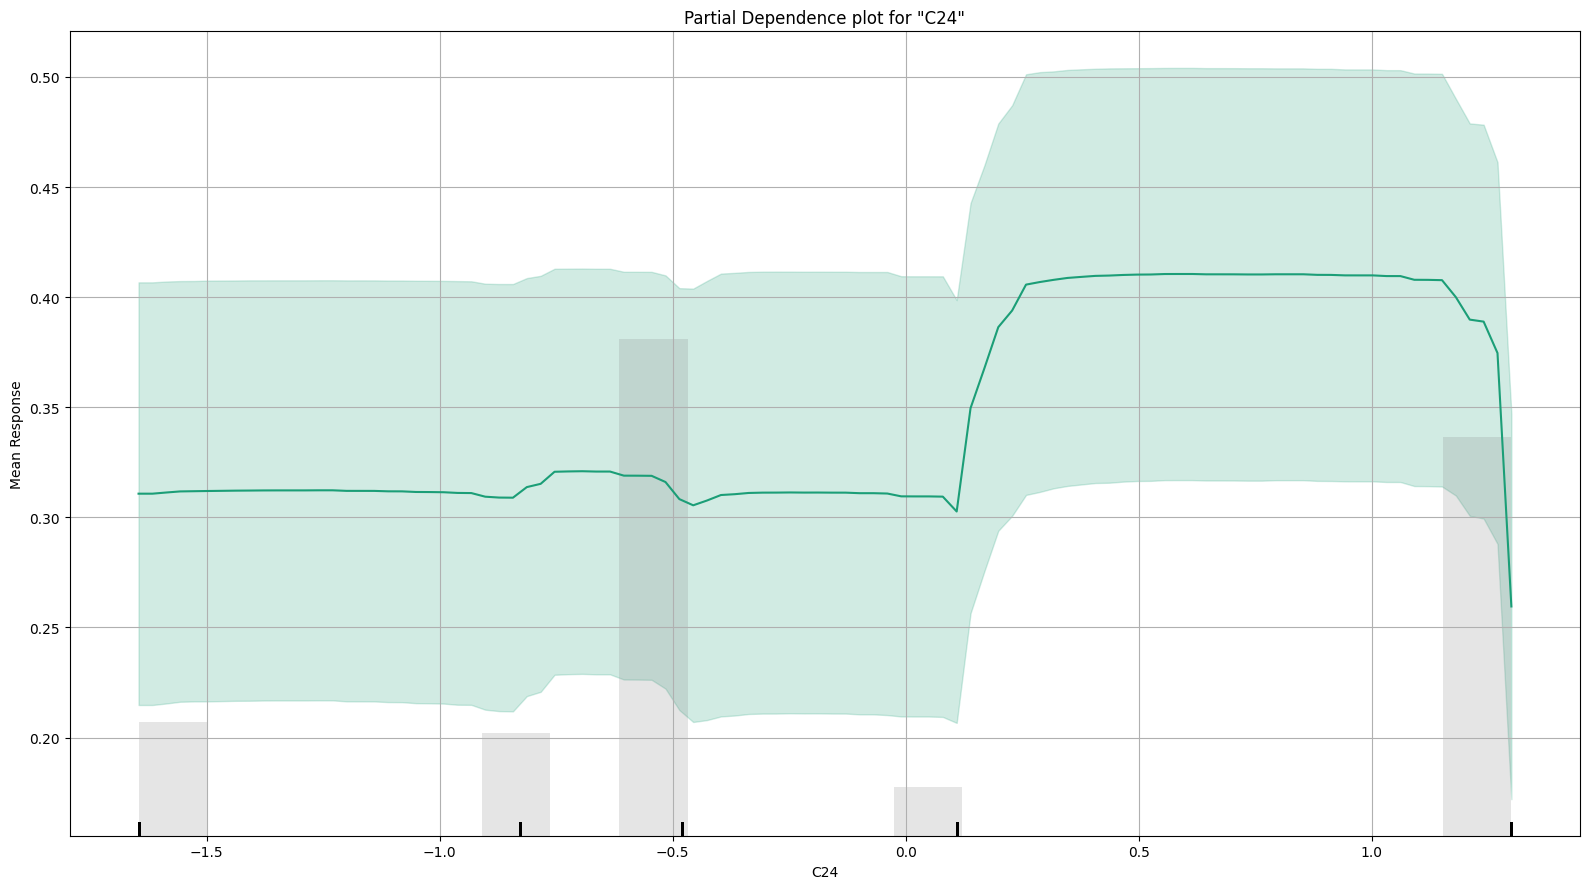

In [38]:
rf_model_smote.explain(test_h2o)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1731727323952_40

,0,1,Error,Rate
0,8785.0,4117.0,0.3191,(4117.0/12902.0)
1,1184.0,1914.0,0.3822,(1184.0/3098.0)
Total,9969.0,6031.0,0.3313,(5301.0/16000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

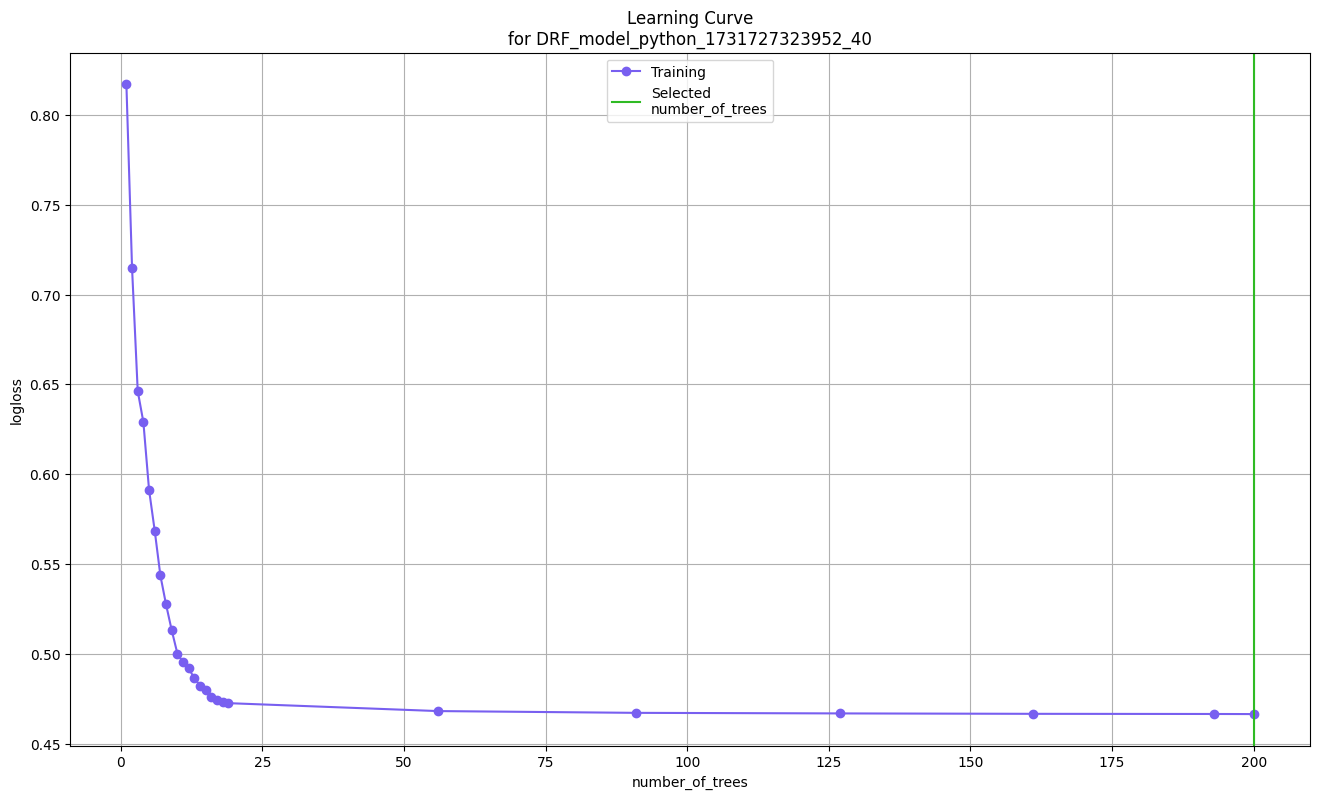

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

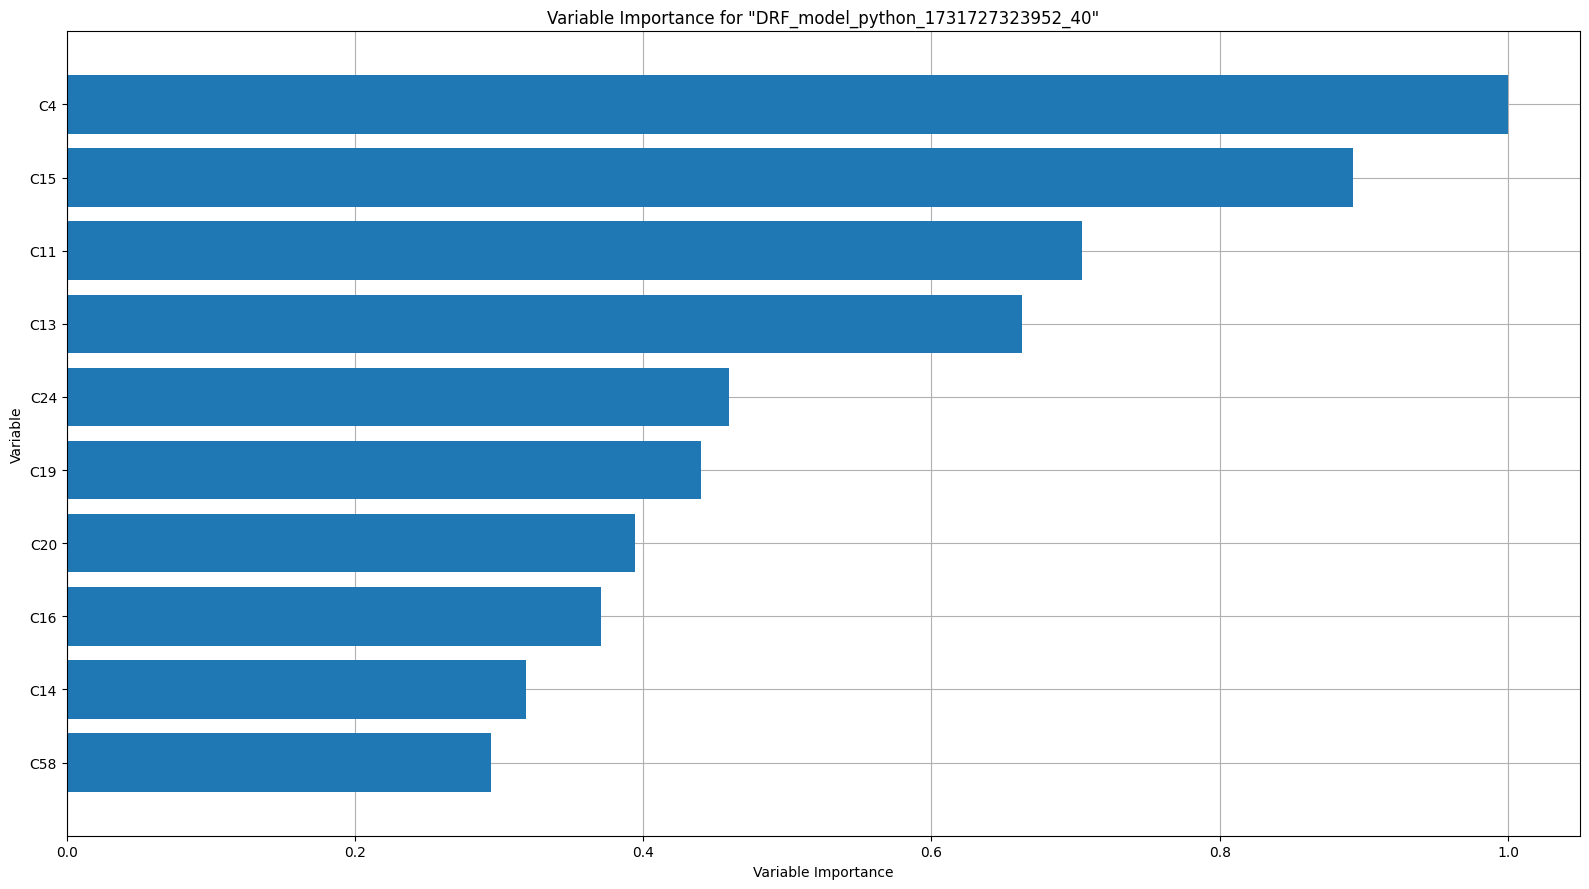

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

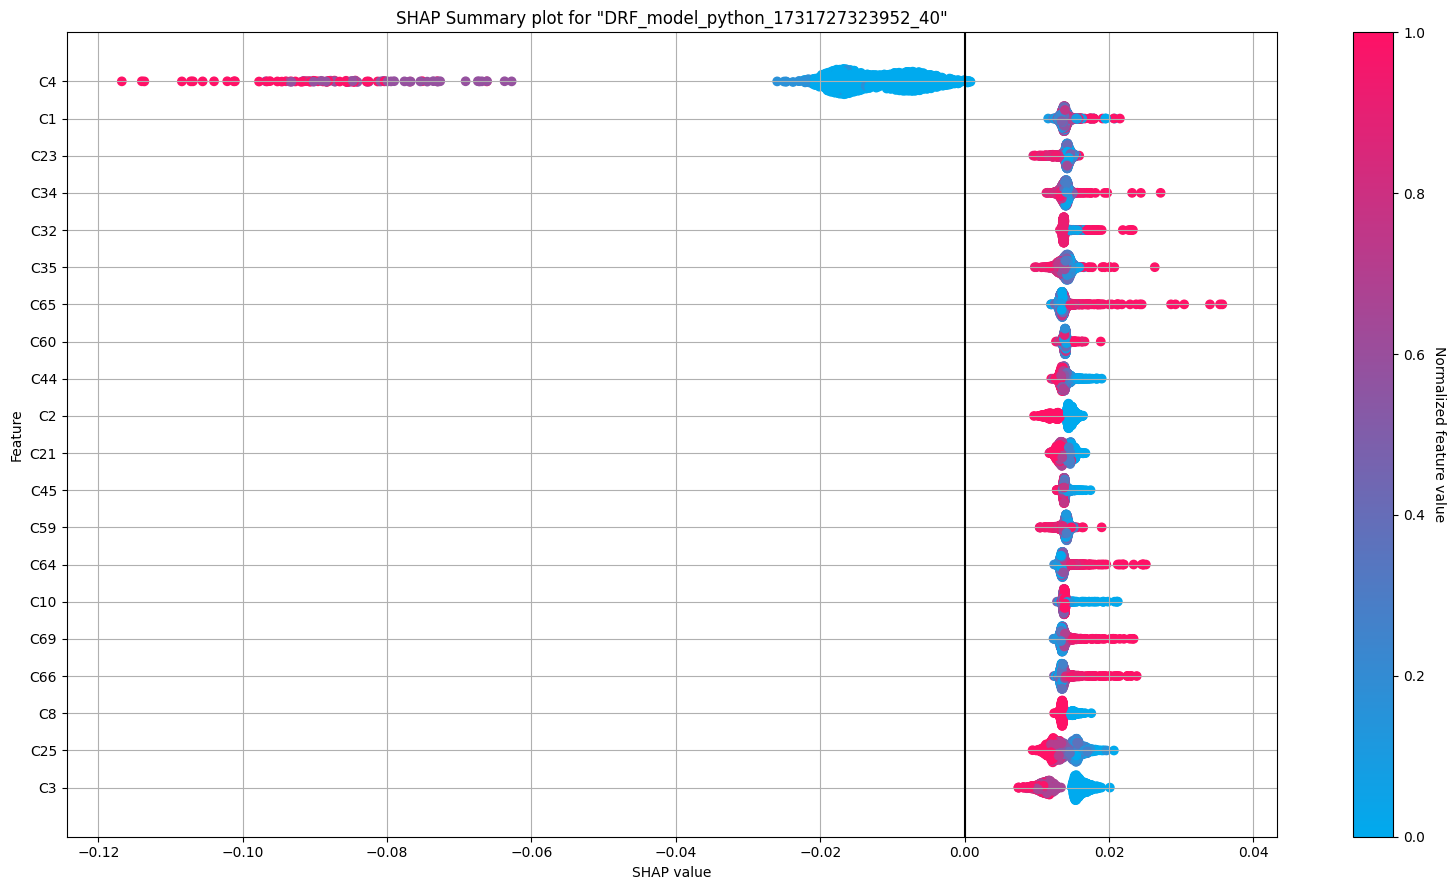

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

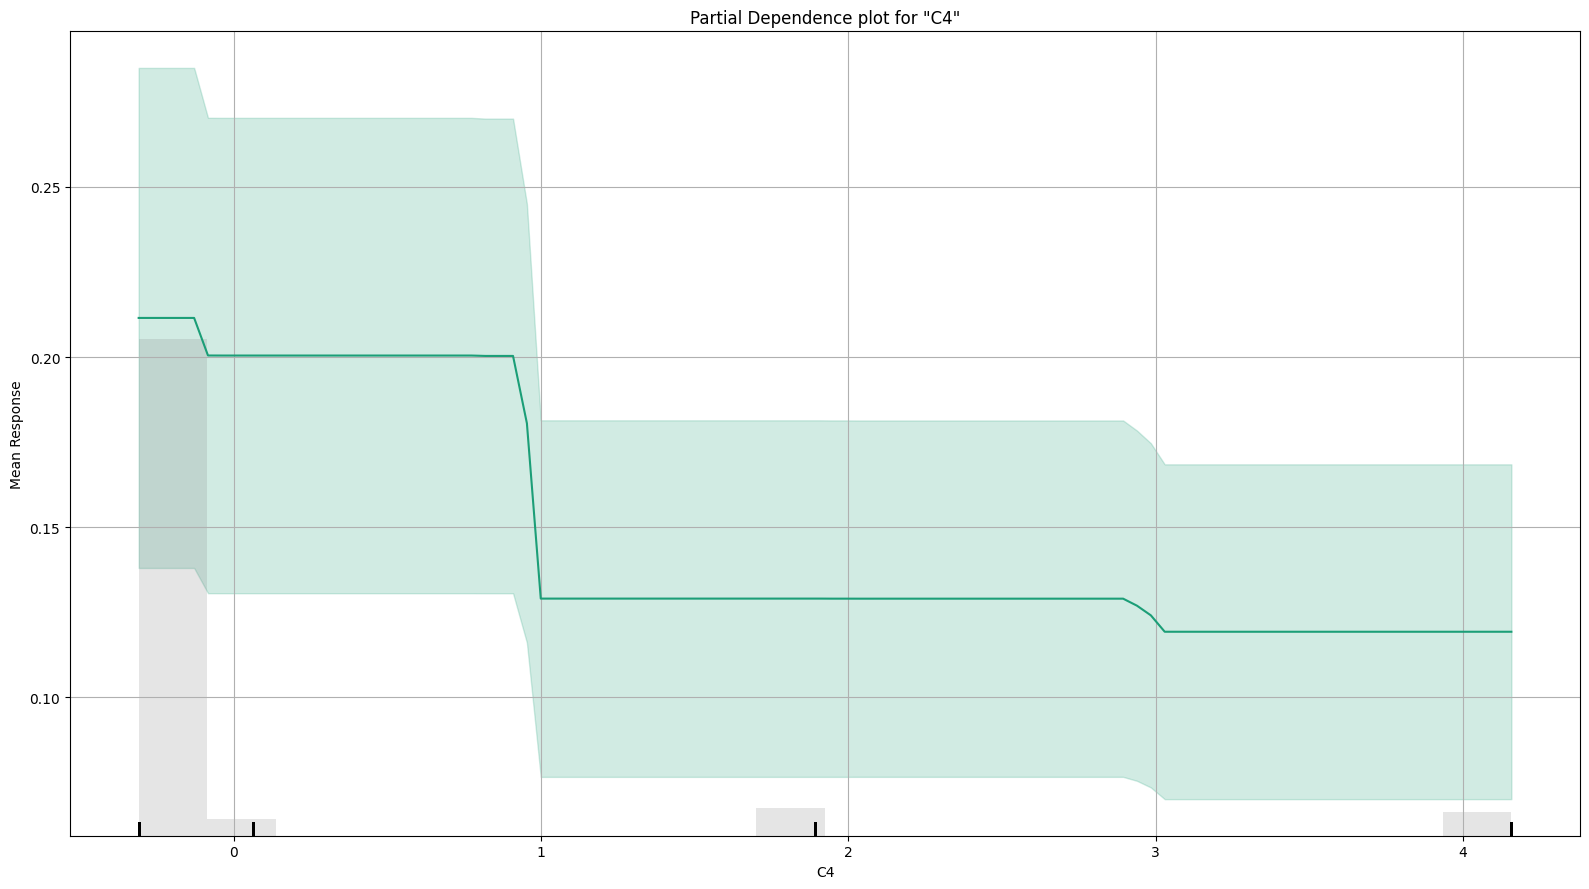

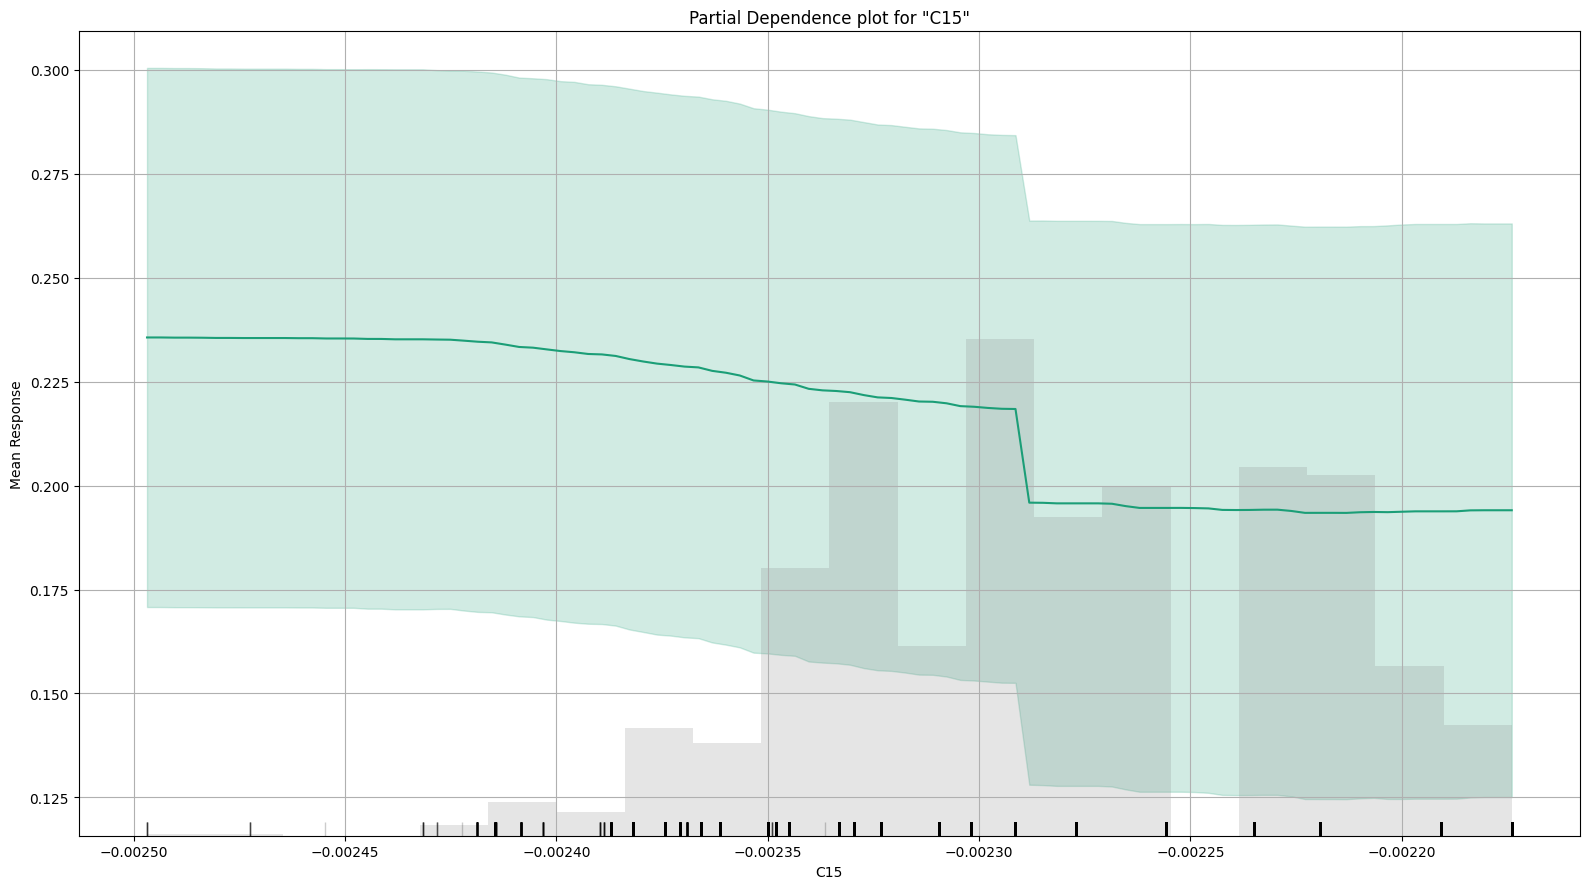

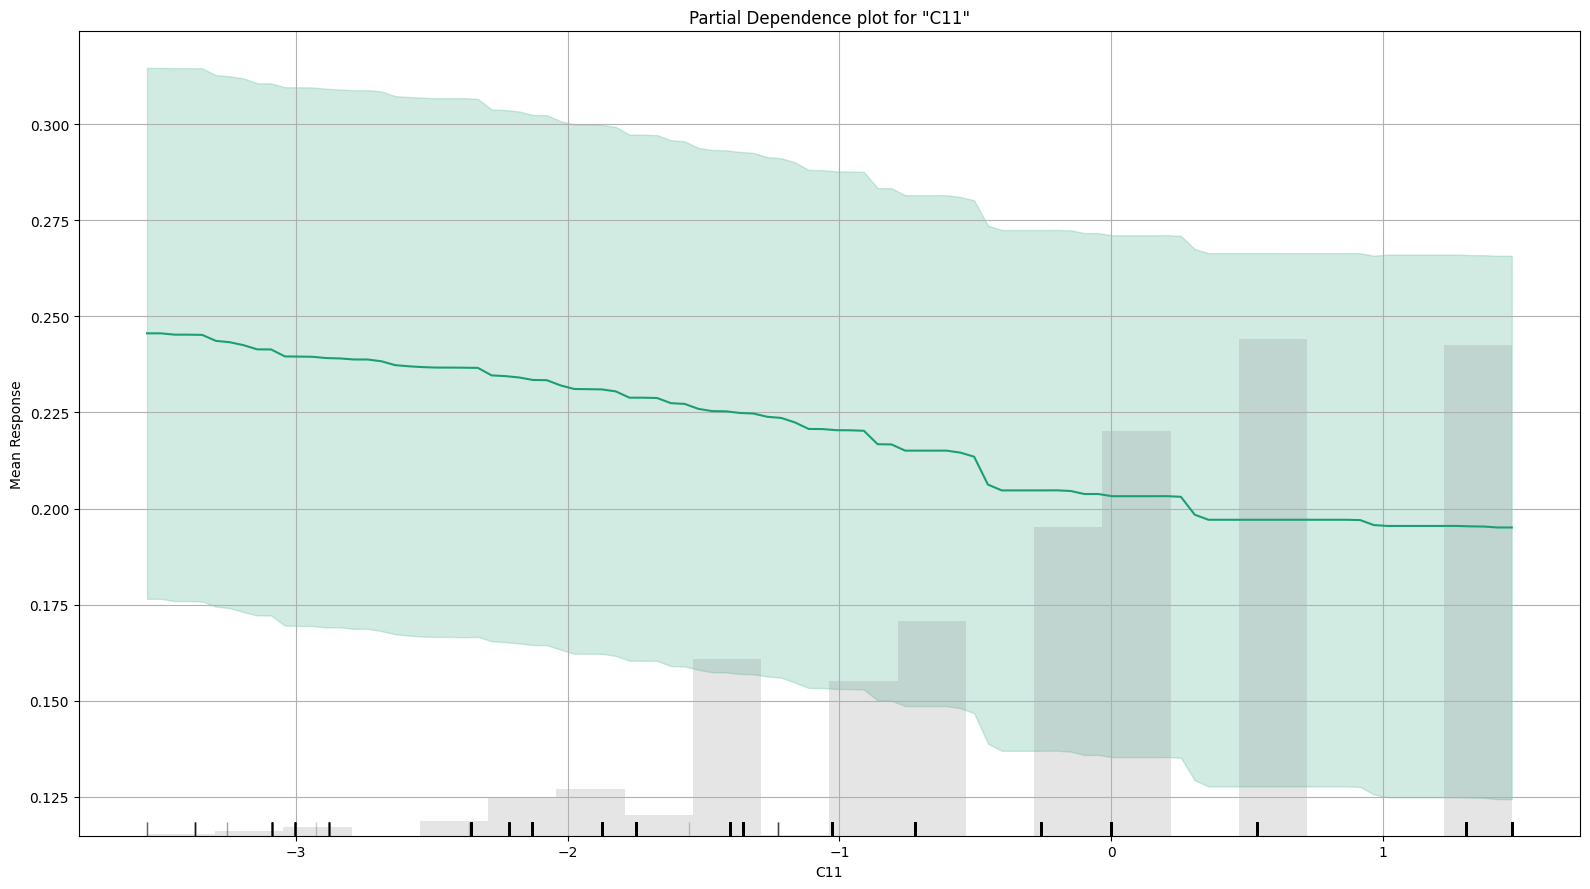

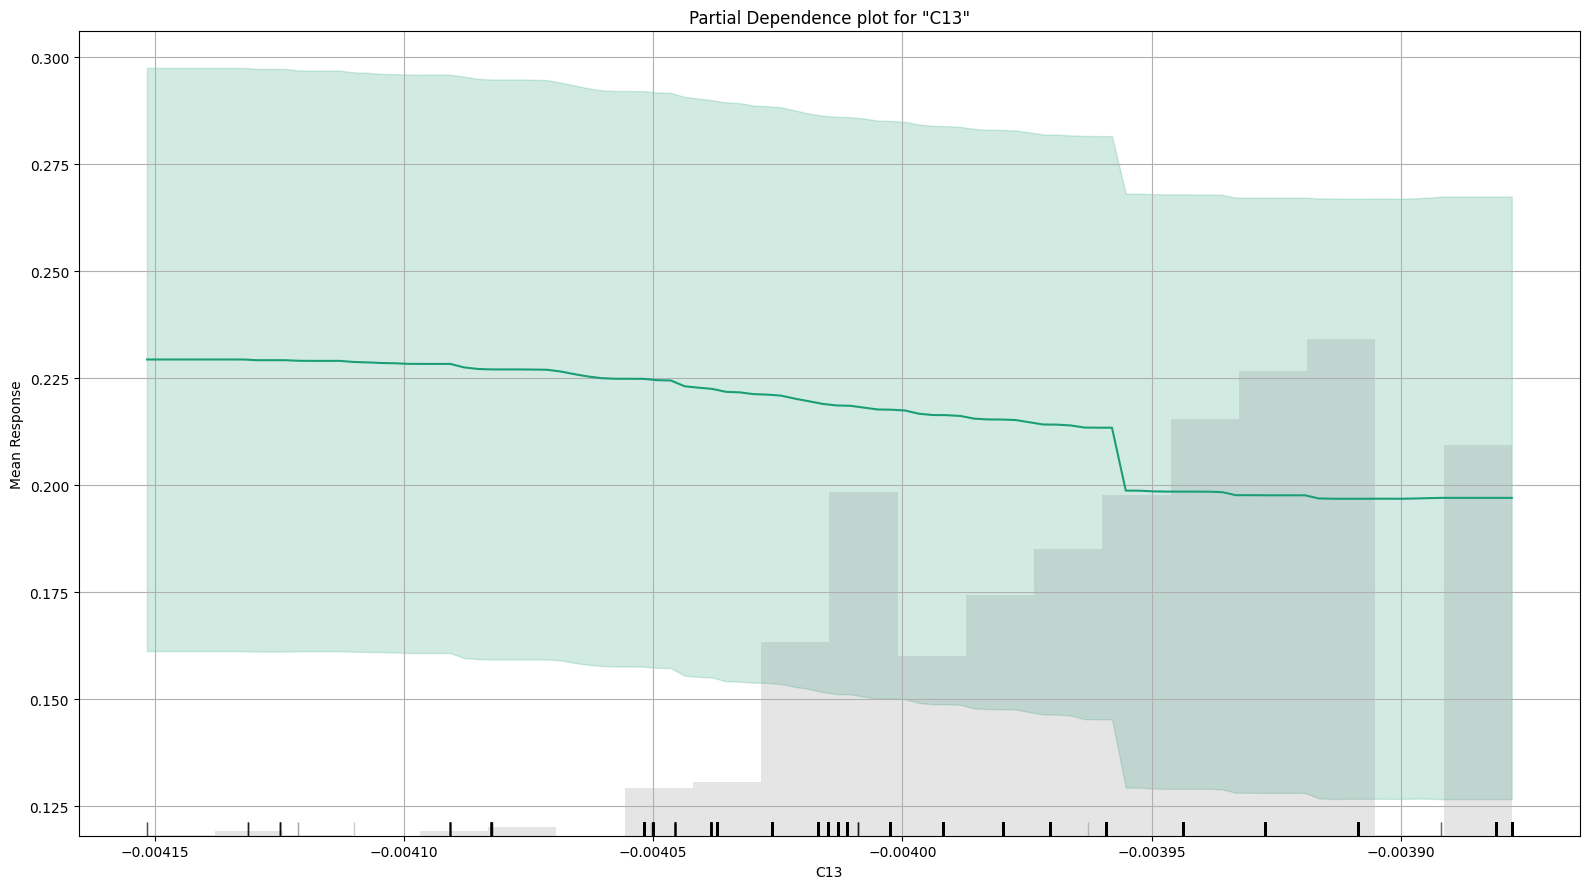

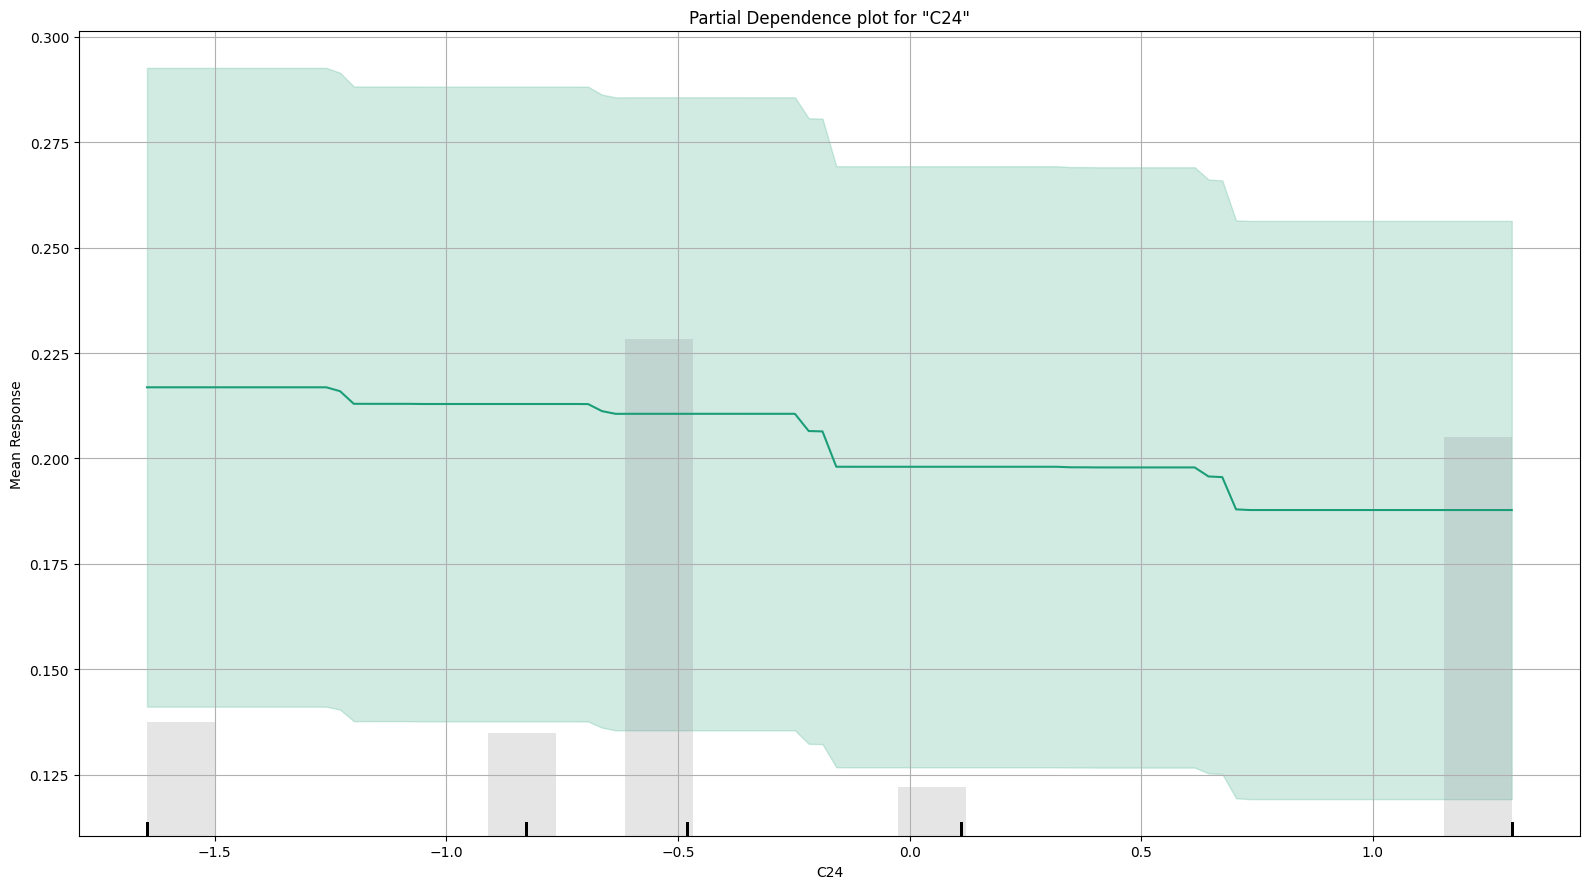

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1731727323952_40

,0,1,Error,Rate
0,8785.0,4117.0,0.3191,(4117.0/12902.0)
1,1184.0,1914.0,0.3822,(1184.0/3098.0)
Total,9969.0,6031.0,0.3313,(5301.0/16000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

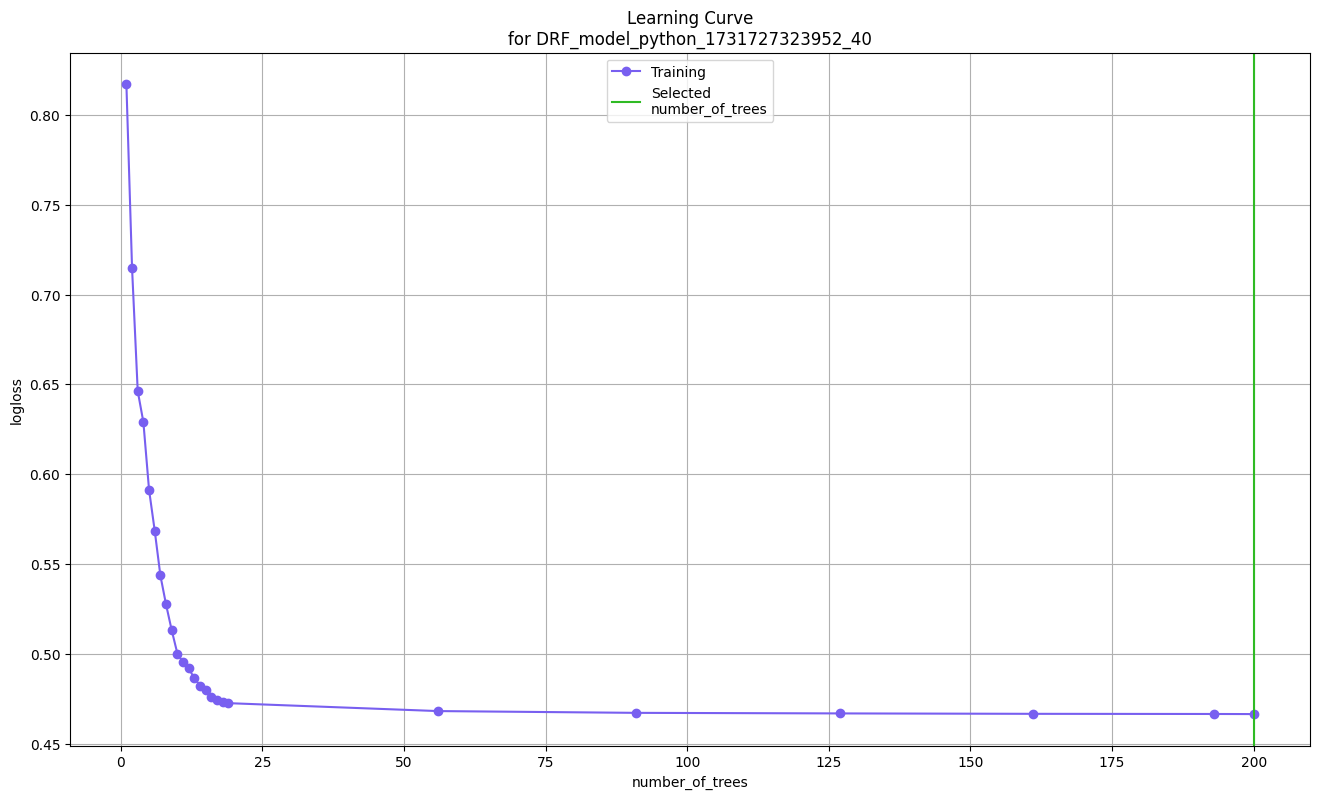

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

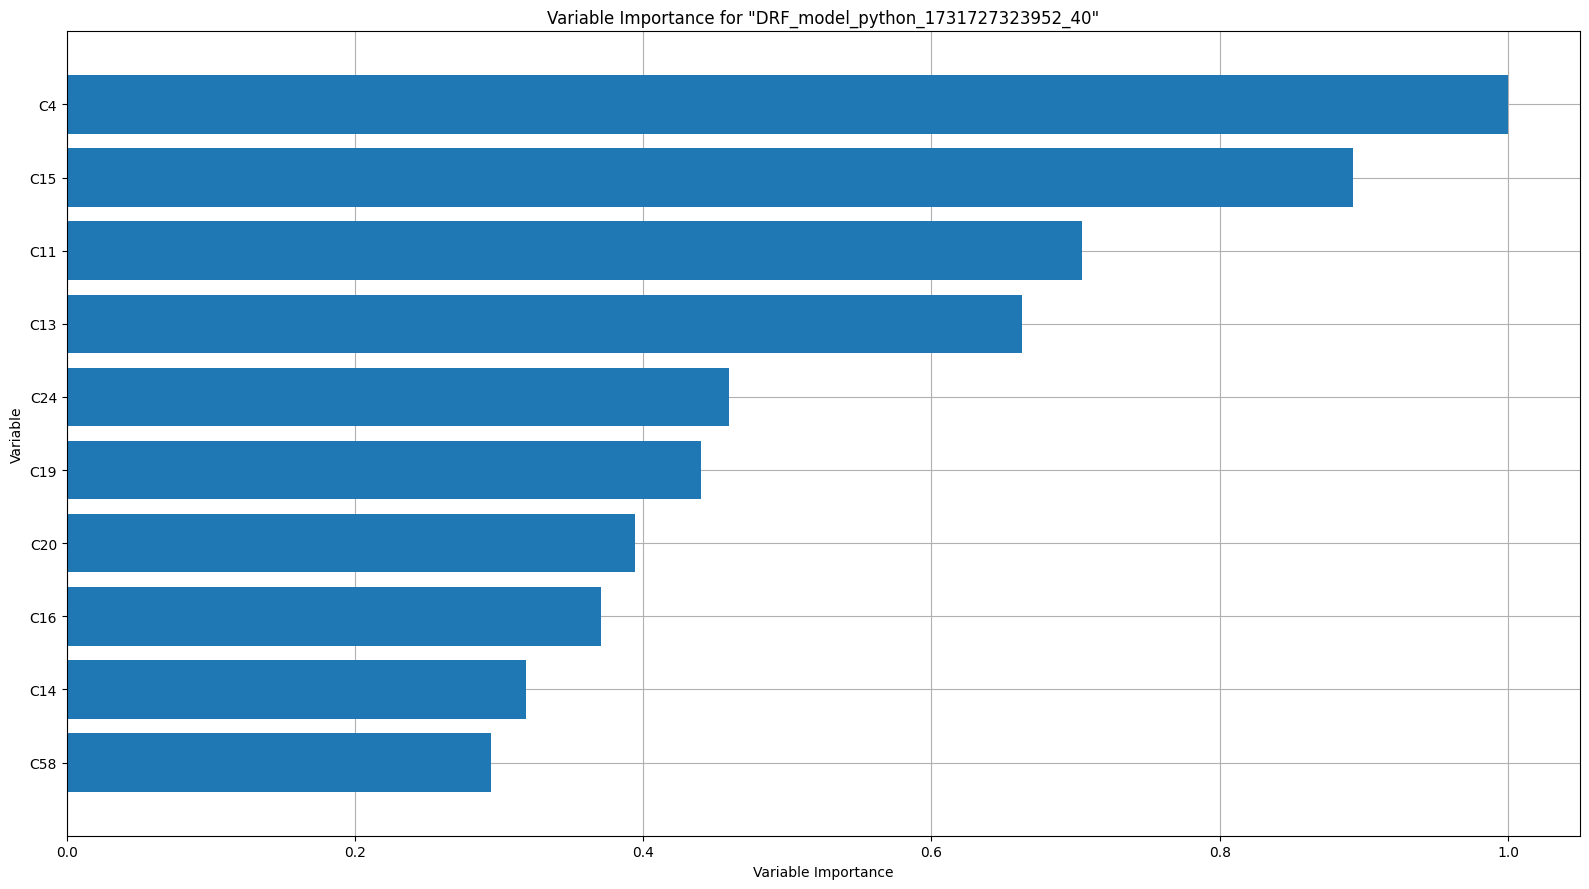

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

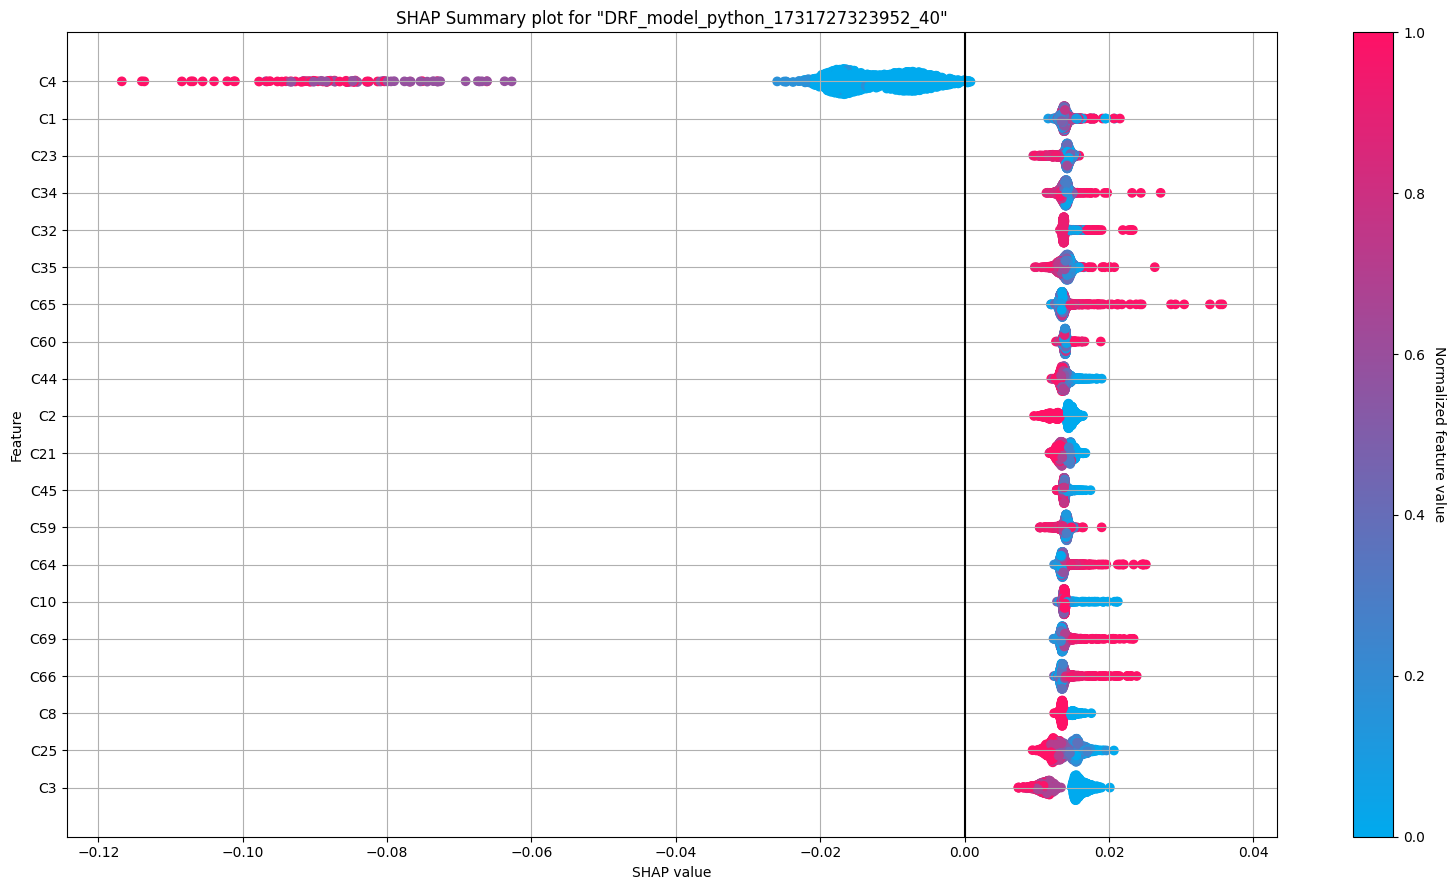

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

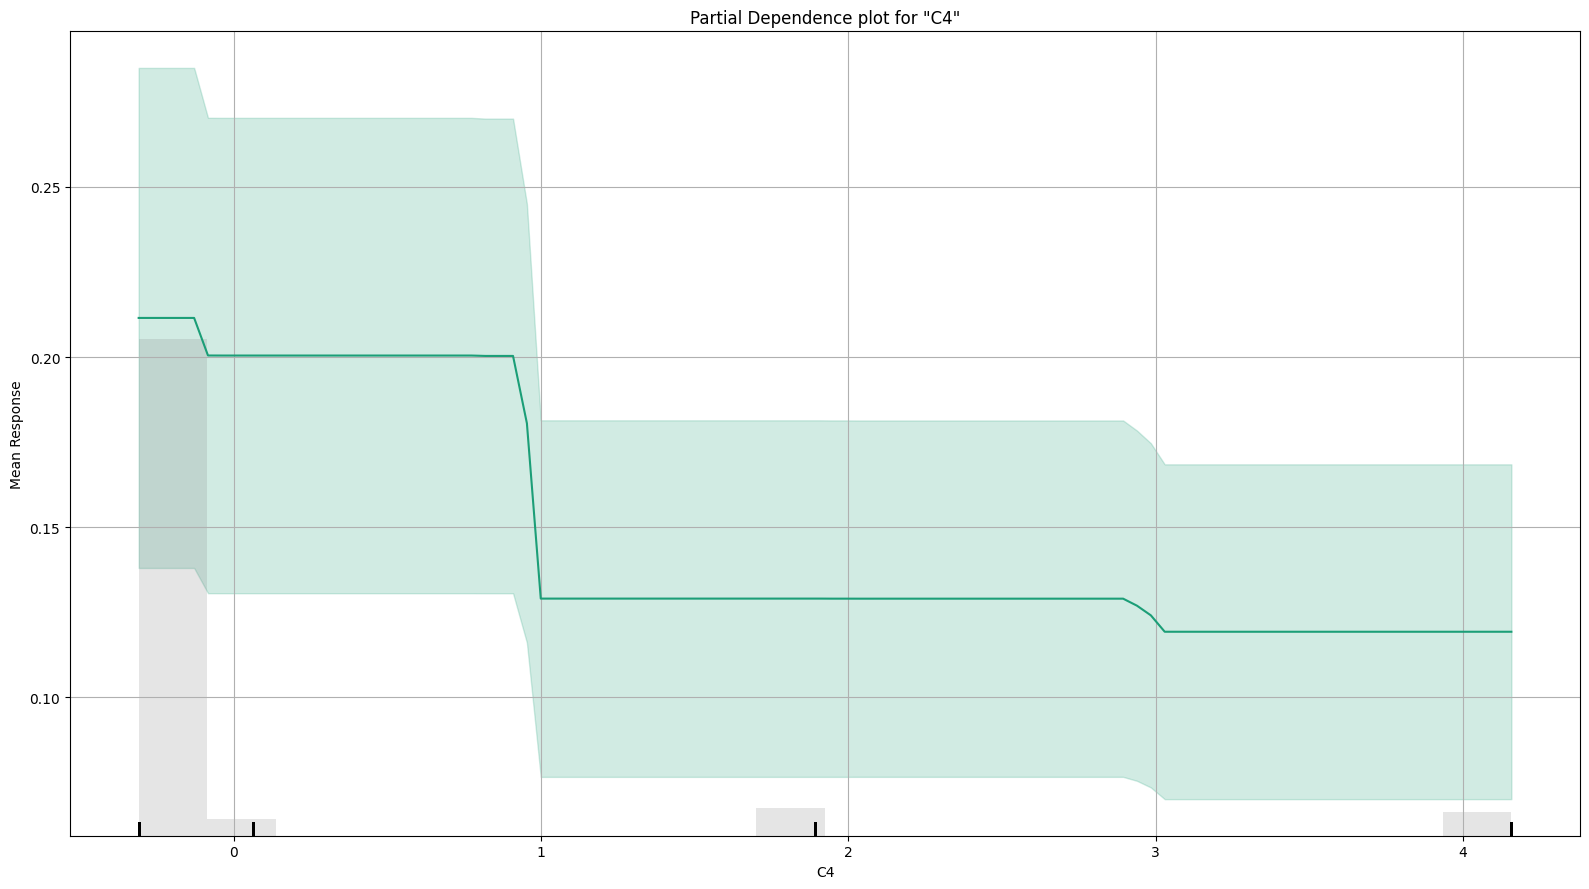

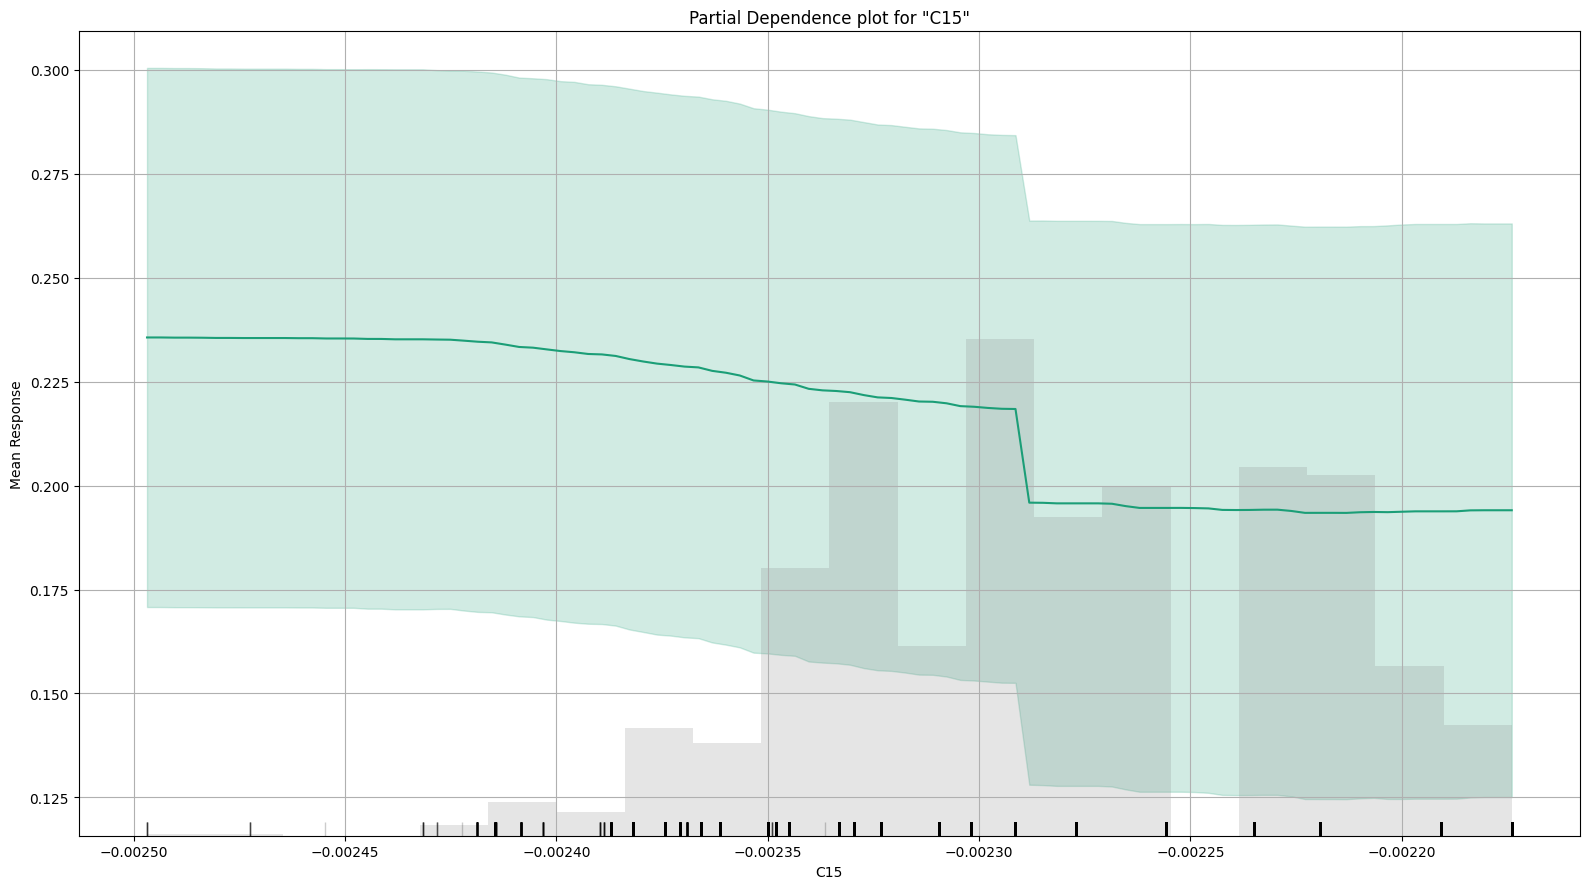

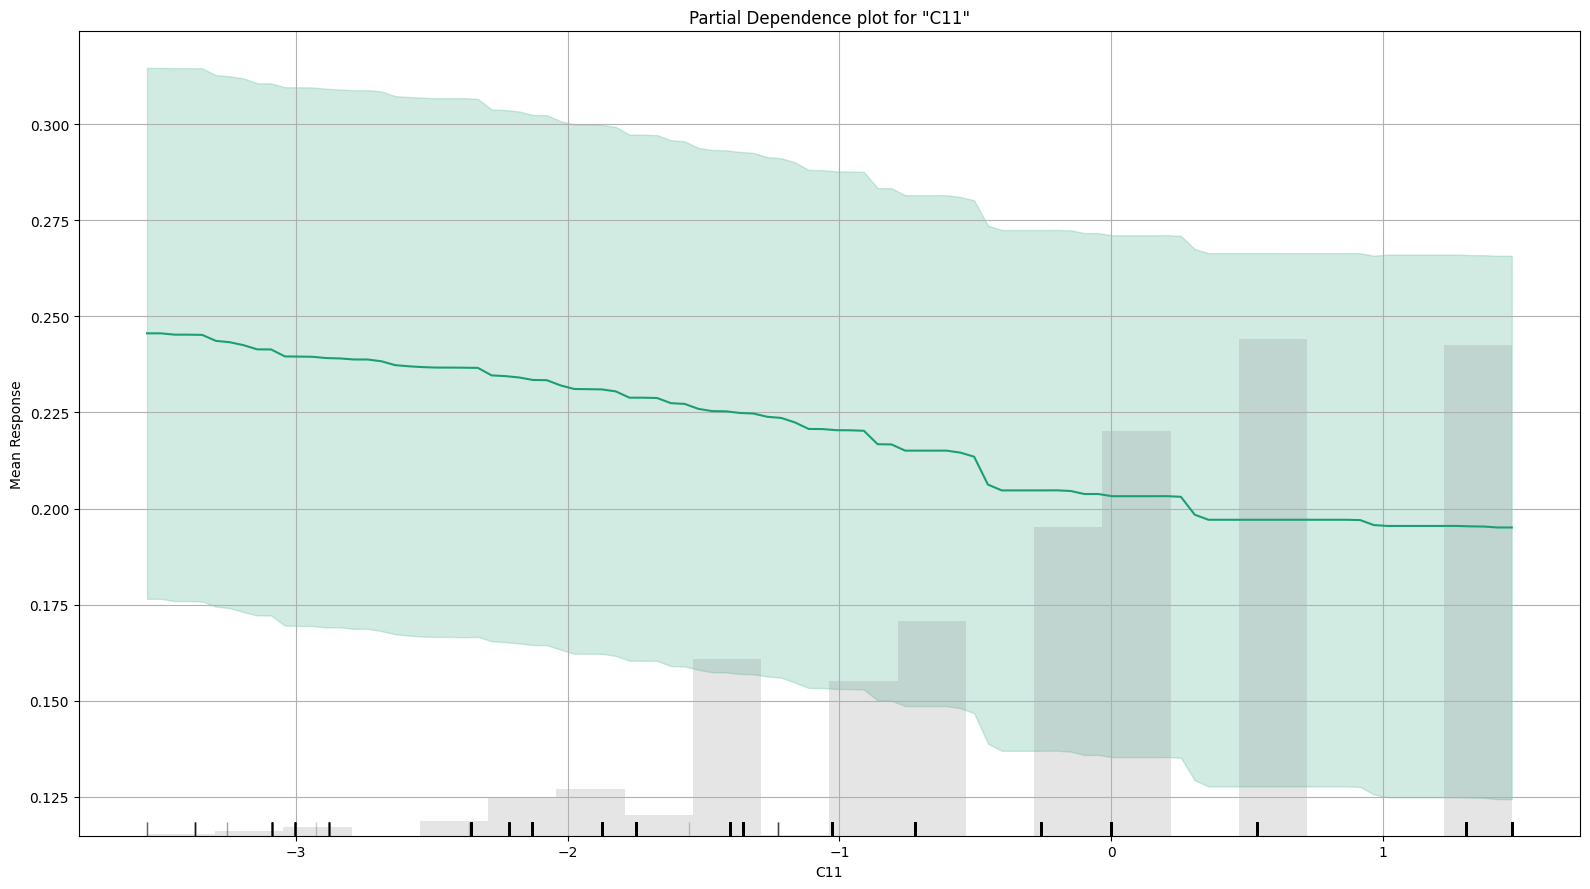

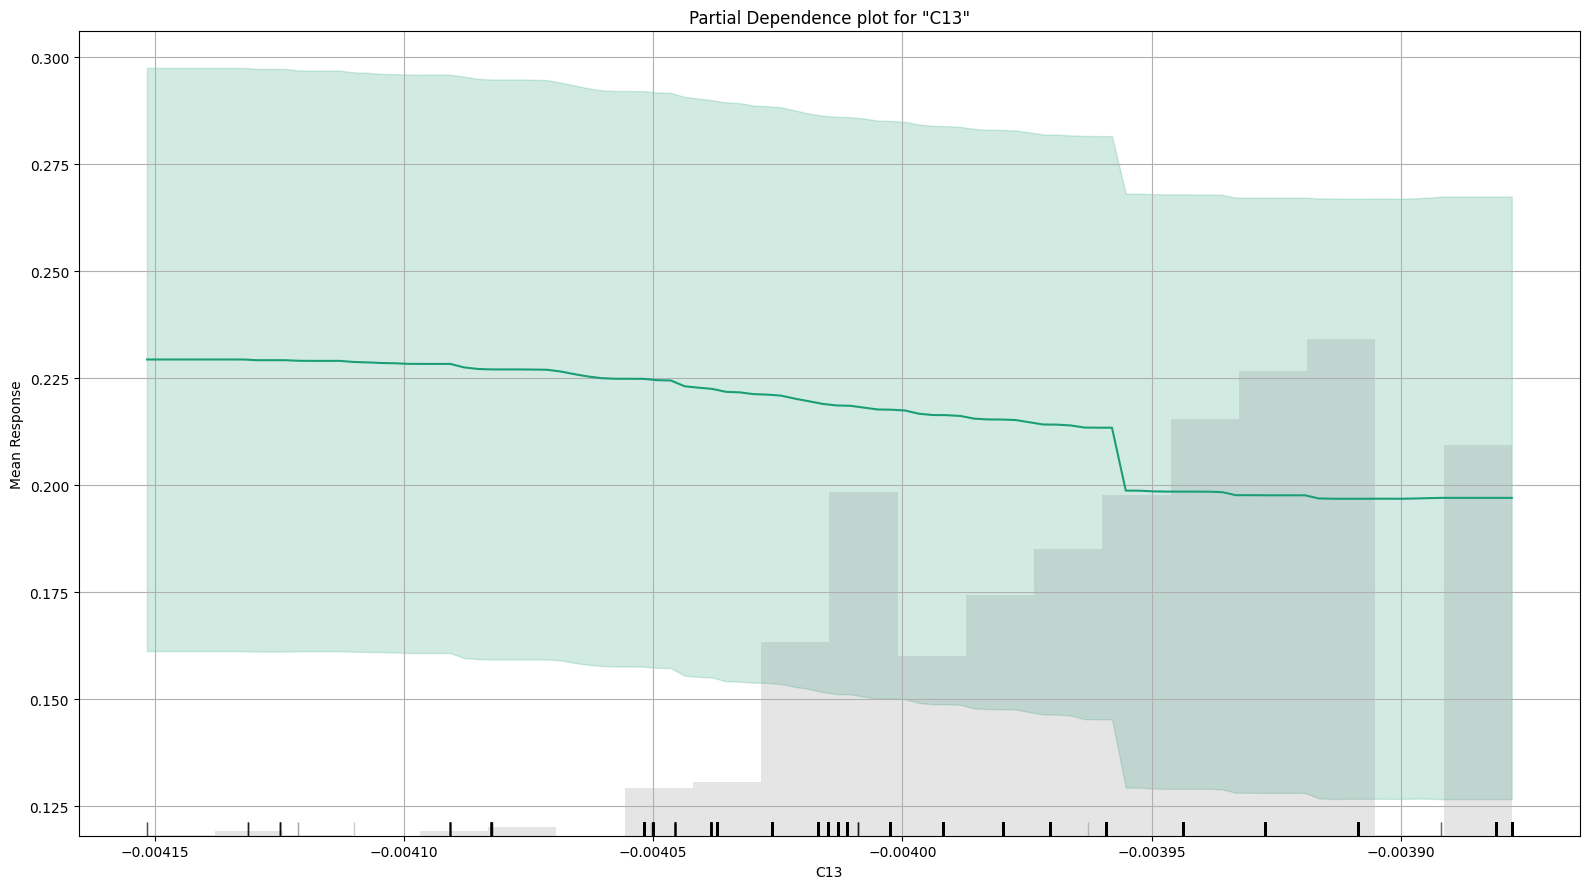

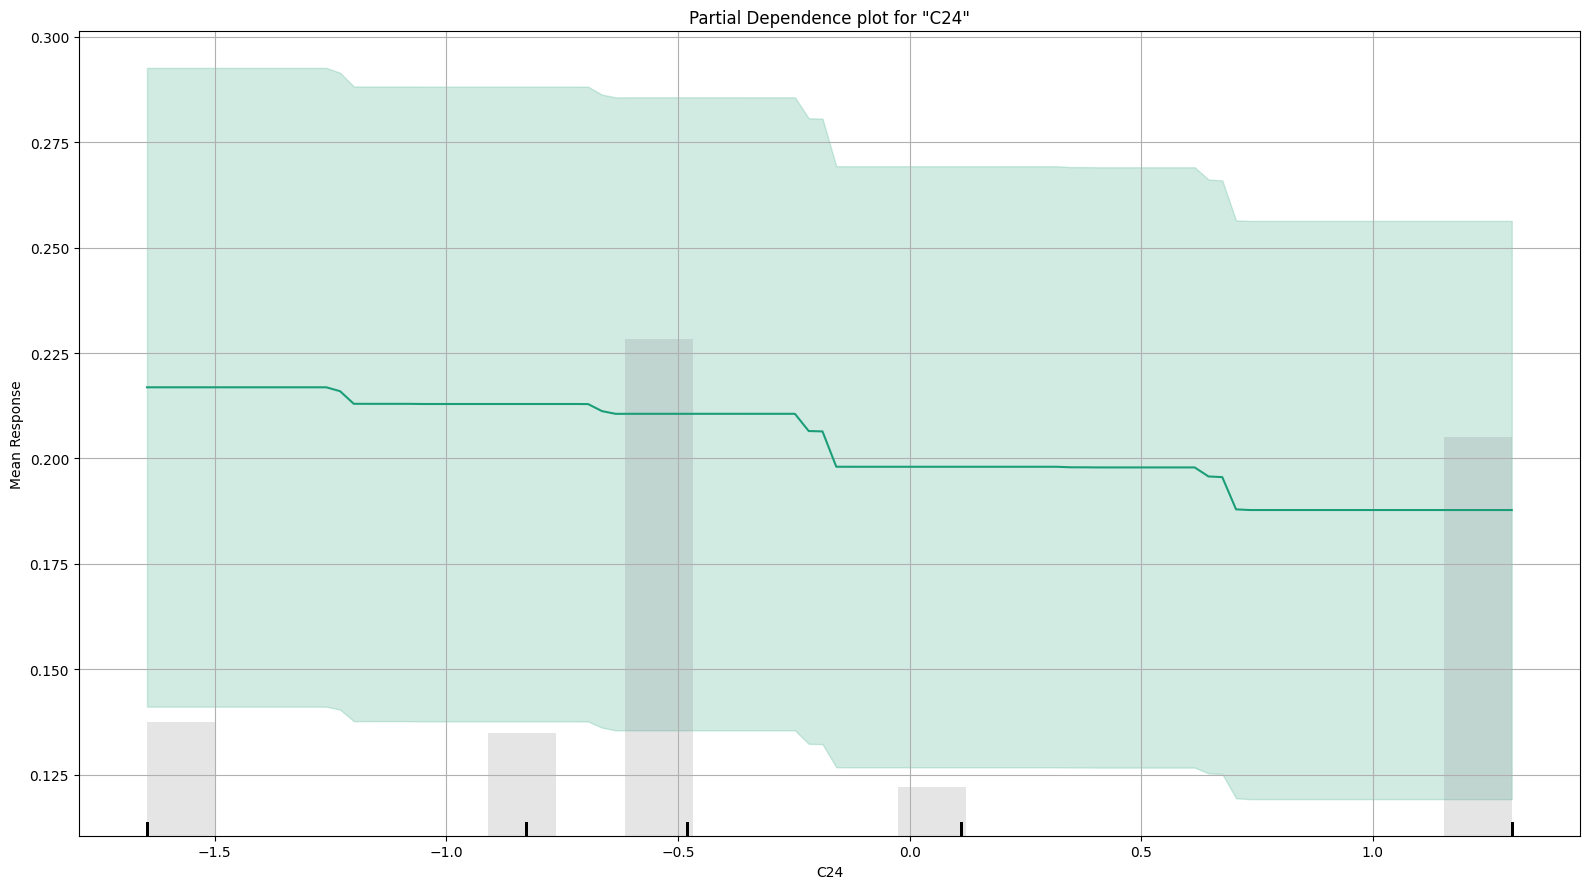

In [39]:
rf_model_tomek.explain(test_h2o)